In [54]:
import shapefile
import os
import earthpy as et
import pandas as pd
import fiona
import pyproj
from pyproj import CRS
import numpy as np

In [10]:
os.chdir(os.path.join(et.io.HOME, 'Documents', 'UEA', 'Urban_Heat', 'CUSSH', 'City_Area'))

In [ ]:
sf = shapefile.Reader('Morphological_Urban_Area.shp')

In [18]:
import geopandas as gpd
shapefile = gpd.read_file("Morphological_Urban_Area.shp")
print(shapefile)

      OBJECTID  FID_1                         Aggname        Area     X2016  \
0            1    1.0                        Winnipeg  476.219088   765.850   
1            2    2.0                         Calabar  141.186185   487.705   
2            3    3.0                           Anqiu  142.614875   522.101   
3            4    4.0                         Maracay  337.575116  1186.158   
4            6    6.0  Tel Aviv-Yafo (Tel Aviv-Jaffa)  783.070329  3661.189   
...        ...    ...                             ...         ...       ...   
1564      1566  361.0                  FlorianÃ³polis  270.565359  1212.376   
1565      1567  357.0                            FÃ¨s  161.723642  1196.538   
1566      1568  959.0                San Luis PotosÃ­  302.613824  1167.758   
1567      1569  585.0                 KÃ¶ln (Cologne)  103.709743  1041.936   
1568      1570  652.0                           LomÃ©  333.072800   984.904   

      Cntry_C                                 Cntry

In [156]:
os.chdir(os.path.join(et.io.HOME, 'Documents', 'UEA', 'Urban_Heat', 'CUSSH', 'City_Area','Administrative', 'China' ))
ch_sf = gpd.read_file("gadm36_CHN_3.shp")
print(ch_sf)

     GID_0 NAME_0     GID_1    NAME_1 NL_NAME_1        GID_2    NAME_2  \
0      CHN  China   CHN.1_1     Anhui     安徽|安徽    CHN.1.1_1    Anqing   
1      CHN  China   CHN.1_1     Anhui     安徽|安徽    CHN.1.1_1    Anqing   
2      CHN  China   CHN.1_1     Anhui     安徽|安徽    CHN.1.1_1    Anqing   
3      CHN  China   CHN.1_1     Anhui     安徽|安徽    CHN.1.1_1    Anqing   
4      CHN  China   CHN.1_1     Anhui     安徽|安徽    CHN.1.1_1    Anqing   
...    ...    ...       ...       ...       ...          ...       ...   
2403   CHN  China  CHN.31_1  Zhejiang        浙江  CHN.31.10_1   Wenzhou   
2404   CHN  China  CHN.31_1  Zhejiang        浙江  CHN.31.10_1   Wenzhou   
2405   CHN  China  CHN.31_1  Zhejiang        浙江  CHN.31.11_1  Zhoushan   
2406   CHN  China  CHN.31_1  Zhejiang        浙江  CHN.31.11_1  Zhoushan   
2407   CHN  China  CHN.31_1  Zhejiang        浙江  CHN.31.11_1  Zhoushan   

     NL_NAME_2          GID_3    NAME_3  VARNAME_3 NL_NAME_3     TYPE_3  \
0          安庆市    CHN.1.1.1_1    Anq

In [190]:
ch_sf[ch_sf["NAME_2"] == 'Beijing']

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
77,CHN,China,CHN.2_1,Beijing,北京|北京,CHN.2.1_1,Beijing,北京|北京,CHN.2.1.1_1,Beijing,Běijīng,北京|北京,Zhíxiáshì,Municipality,None,None,"POLYGON ((116.59245 40.02933, 116.59881 40.021..."
78,CHN,China,CHN.2_1,Beijing,北京|北京,CHN.2.1_1,Beijing,北京|北京,CHN.2.1.2_1,Changping,Chāngpíng,昌平区,Shìxiáqū,District,None,None,"POLYGON ((116.49032 40.25365, 116.49221 40.251..."
79,CHN,China,CHN.2_1,Beijing,北京|北京,CHN.2.1_1,Beijing,北京|北京,CHN.2.1.3_1,Daxing,Dàxīng,大兴区,Shìxiáqū,District,None,None,"POLYGON ((116.23775 39.51794, 116.23721 39.522..."
80,CHN,China,CHN.2_1,Beijing,北京|北京,CHN.2.1_1,Beijing,北京|北京,CHN.2.1.4_1,Fangshan,Fángshān,房山区,Shìxiáqū,District,None,None,"POLYGON ((115.75011 39.51173, 115.74478 39.517..."
81,CHN,China,CHN.2_1,Beijing,北京|北京,CHN.2.1_1,Beijing,北京|北京,CHN.2.1.5_1,Huairou,Huáiróu,怀柔区,Shìxiáqū,District,None,None,"POLYGON ((116.88258 40.79685, 116.87634 40.795..."
82,CHN,China,CHN.2_1,Beijing,北京|北京,CHN.2.1_1,Beijing,北京|北京,CHN.2.1.6_1,Mentougou,Méntóugōu,门头沟区,Shìxiáqū,District,None,None,"POLYGON ((116.06849 39.85844, 116.05526 39.850..."
83,CHN,China,CHN.2_1,Beijing,北京|北京,CHN.2.1_1,Beijing,北京|北京,CHN.2.1.7_1,Miyun,Mìyún,密云县,Xiàn,County,None,None,"POLYGON ((116.88258 40.79685, 116.88448 40.793..."
84,CHN,China,CHN.2_1,Beijing,北京|北京,CHN.2.1_1,Beijing,北京|北京,CHN.2.1.8_1,Pinggu,Pínggǔ,平谷区,Shìxiáqū,District,None,None,"POLYGON ((116.95786 40.04598, 116.95883 40.048..."
85,CHN,China,CHN.2_1,Beijing,北京|北京,CHN.2.1_1,Beijing,北京|北京,CHN.2.1.9_1,Shunyi,Shùnyì,顺义区,Shìxiáqū,District,None,None,"POLYGON ((116.46198 40.09152, 116.46235 40.092..."
86,CHN,China,CHN.2_1,Beijing,北京|北京,CHN.2.1_1,Beijing,北京|北京,CHN.2.1.10_1,Tongzhou,Tōngzhōu,通州区,Shìxiáqū,District,None,None,"POLYGON ((116.53358 39.82344, 116.55157 39.818..."


In [191]:
City_Lat = 39.9075
City_Lon = 116.39723
#function for finding the UTM projection
def utm_zoner(lon, lat):
    utm_lon = lon+180
    utm_zone = int(np.ceil(utm_lon/6))
    south_hem =''
    if lat<0:
        south_hem = ' +south'
    proj_str = f'+proj=utm +zone={utm_zone}{south_hem}'
    return proj_str

#Get the UTM of the city
local_utm = CRS.from_proj4(utm_zoner(City_Lon, City_Lat))
local_epsg = local_utm.to_epsg()

In [192]:
local_epsg

32650

In [210]:
#set the CRS 
ch_sf.to_crs({'init': 'epsg:3857'})

C:\Anaconda3\envs\project_environment\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,CHN.1.1.1_1,Anqing,None,None,Xiànjíshì,County City,None,None,"POLYGON ((13047669.936 3584534.016, 13048030.8..."
1,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,CHN.1.1.2_1,Huaining,Huáiníng,怀宁县,Xiàn,County,None,None,"POLYGON ((12967352.455 3552570.529, 12967356.7..."
2,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,CHN.1.1.3_1,Qianshan,Qiánshān,潜山县,Xiàn,County,None,None,"POLYGON ((12965565.527 3562379.572, 12965123.0..."
3,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,CHN.1.1.4_1,Susong,Sùsōng,宿松县,Xiàn,County,None,None,"POLYGON ((12977789.506 3509668.105, 12977509.2..."
4,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,CHN.1.1.5_1,Taihu,Tàihú,太湖县,Xiàn,County,None,None,"POLYGON ((12967352.455 3552570.529, 12966318.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,CHN,China,CHN.31_1,Zhejiang,浙江,CHN.31.10_1,Wenzhou,温州市,CHN.31.10.8_1,Yongjia,Yǒngjiā,永嘉县,Xiàn,County,None,None,"MULTIPOLYGON (((13424344.817 3256829.911, 1342..."
2404,CHN,China,CHN.31_1,Zhejiang,浙江,CHN.31.10_1,Wenzhou,温州市,CHN.31.10.9_1,Yueqing,\tYuèqīng,乐清市,Xiànjíshì,County City,None,None,"MULTIPOLYGON (((13471776.541 3265356.042, 1347..."
2405,CHN,China,CHN.31_1,Zhejiang,浙江,CHN.31.11_1,Zhoushan,舟山市,CHN.31.11.1_1,Daishan,Dàishān,岱山县,Xiàn,County,None,None,"MULTIPOLYGON (((13620419.383 3581287.478, 1362..."
2406,CHN,China,CHN.31_1,Zhejiang,浙江,CHN.31.11_1,Zhoushan,舟山市,CHN.31.11.2_1,Dinghai,Dìnghǎi,定海区,Shìxiáqū,District,None,None,"MULTIPOLYGON (((13569181.095 3531949.607, 1356..."


In [194]:
ch_sf2['geometry'].area/ 10**6

0        462.127834
1       1624.582455
2       1725.991685
3       2377.122272
4       2045.863563
           ...     
2403    2664.160919
2404    1358.738947
2405     307.380852
2406     525.266365
2407     398.470631
Length: 2408, dtype: float64

In [195]:
#change crs to local
ch_sf2 = ch_sf.to_crs(epsg=local_epsg).copy()

In [196]:
#calculate area
ch_sf2["area"] = ch_sf2['geometry'].area/ (10**6)

In [197]:
ch_sf2[ch_sf2["NAME_2"] == 'Beijing']['area'].sum()

16393.89929895516

In [79]:
uk_sf_3 = uk_sf['geometry'].to_crs({'init': 'epsg:32630'})\
               .map(lambda p: p.area / 10**6)

In [187]:
ningbo = ch_sf2[ch_sf2["NAME_2"] == 'Ningbo']

<AxesSubplot:>

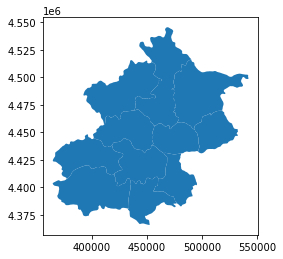

In [199]:
ch_sf2[ch_sf2["NAME_2"] == 'Beijing'].plot()

<AxesSubplot:>

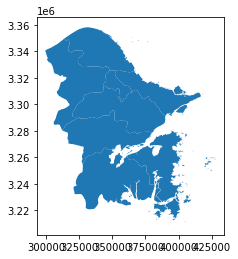

In [181]:
ningbo.plot()

In [203]:
os.chdir(os.path.join(et.io.HOME, 'Documents', 'UEA', 'Urban_Heat', 'CUSSH', 'City_Area', 'Administrative' ))
uk_sf = gpd.read_file("gadm36_GBR_3.shp")
print(uk_sf)

    GID_0          NAME_0    GID_1   NAME_1 NL_NAME_1       GID_2  \
0     GBR  United Kingdom  GBR.1_1  England      None   GBR.1.1_1   
1     GBR  United Kingdom  GBR.1_1  England      None   GBR.1.2_1   
2     GBR  United Kingdom  GBR.1_1  England      None   GBR.1.3_1   
3     GBR  United Kingdom  GBR.1_1  England      None   GBR.1.4_1   
4     GBR  United Kingdom  GBR.1_1  England      None   GBR.1.5_1   
..    ...             ...      ...      ...       ...         ...   
401   GBR  United Kingdom  GBR.4_1    Wales      None  GBR.4.18_1   
402   GBR  United Kingdom  GBR.4_1    Wales      None  GBR.4.19_1   
403   GBR  United Kingdom  GBR.4_1    Wales      None  GBR.4.20_1   
404   GBR  United Kingdom  GBR.4_1    Wales      None  GBR.4.21_1   
405   GBR  United Kingdom  GBR.4_1    Wales      None  GBR.4.22_1   

                           NAME_2 NL_NAME_2         GID_3  \
0                        Barnsley      None   GBR.1.1.1_1   
1    Bath and North East Somerset      None   GBR

In [205]:
uk_sf[uk_sf["NAME_2"] == 'Greater London']

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
87,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.36_1,Greater London,None,GBR.1.36.1_1,Barking and Dagenham,None,None,London borough,London borough,None,GB.GL.BA,"POLYGON ((0.15242 51.59898, 0.15128 51.59454, ..."
88,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.36_1,Greater London,None,GBR.1.36.2_1,Barnet,None,None,London borough,London borough,None,GB.GL.BQ,"POLYGON ((-0.14776 51.60020, -0.14841 51.59921..."
89,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.36_1,Greater London,None,GBR.1.36.3_1,Bexley,None,None,London borough,London borough,None,GB.GL.XB,"POLYGON ((0.08031 51.43162, 0.08072 51.43285, ..."
90,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.36_1,Greater London,None,GBR.1.36.4_1,Brent,None,None,London borough,London borough,None,GB.GL.BE,"POLYGON ((-0.23659 51.52651, -0.24321 51.52682..."
91,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.36_1,Greater London,None,GBR.1.36.5_1,Bromley,None,None,London borough,London borough,None,GB.GL.BZ,"POLYGON ((0.01317 51.32074, 0.00826 51.33042, ..."
92,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.36_1,Greater London,None,GBR.1.36.6_1,Camden,None,None,London borough,London borough,None,GB.GL.CN,"POLYGON ((-0.13092 51.56417, -0.12983 51.56247..."
93,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.36_1,Greater London,None,GBR.1.36.7_1,Croydon,None,None,London borough,London borough,None,GB.GL.CY,"POLYGON ((-0.16362 51.31964, -0.15282 51.31984..."
94,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.36_1,Greater London,None,GBR.1.36.8_1,Ealing,None,None,London borough,London borough,None,GB.GL.EG,"POLYGON ((-0.44312 51.49337, -0.43988 51.50639..."
95,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.36_1,Greater London,None,GBR.1.36.9_1,Enfield,None,None,London borough,London borough,None,GB.GL.EF,"POLYGON ((-0.00258 51.64665, -0.01239 51.63638..."
96,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.36_1,Greater London,None,GBR.1.36.10_1,Greenwich,None,None,London borough,London borough,None,GB.GL.GR,"POLYGON ((0.02549 51.43808, 0.02553 51.43829, ..."


In [206]:
City_Lat = 51.51279
City_Lon = -0.09184
#function for finding the UTM projection
def utm_zoner(lon, lat):
    utm_lon = lon+180
    utm_zone = int(np.ceil(utm_lon/6))
    south_hem =''
    if lat<0:
        south_hem = ' +south'
    proj_str = f'+proj=utm +zone={utm_zone}{south_hem}'
    return proj_str

#Get the UTM of the city
local_utm = CRS.from_proj4(utm_zoner(City_Lon, City_Lat))
local_epsg = local_utm.to_epsg()

In [213]:
#set the CRS 
uk_sf.set_crs(epsg=4326, inplace=True)

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.1_1,Barnsley,None,GBR.1.1.1_1,Barnsley,None,None,Metropolitan borough,Metropolitan borough,None,GB.BX.BX,"POLYGON ((-1.78997 53.47293, -1.79306 53.47778..."
1,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.2_1,Bath and North East Somerset,None,GBR.1.2.1_1,Bath and North East Somerset,None,None,Unitary authority,Unitary authority,None,GB.BN.BN,"POLYGON ((-2.68629 51.31516, -2.68066 51.32836..."
2,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.3_1,Bedfordshire,None,GBR.1.3.1_1,Bedford,None,None,Unitary authority,Unitary authority,None,GB.FO.FO,"POLYGON ((-0.58508 52.11364, -0.58806 52.11805..."
3,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.4_1,Birmingham,None,GBR.1.4.1_1,Birmingham,None,None,Metropolitan borough (city),Metropolitan borough (city),None,GB.BI.BI,"POLYGON ((-1.73417 52.51014, -1.73984 52.50894..."
4,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.5_1,Blackburn with Darwen,None,GBR.1.5.1_1,Blackburn with Darwen,None,None,Unitary authority,Unitary authority,None,GB.BW.BW,"POLYGON ((-2.51111 53.63377, -2.51317 53.63582..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,GBR,United Kingdom,GBR.4_1,Wales,None,GBR.4.18_1,"Rhondda, Cynon, Taff",None,GBR.4.18.1_1,"Rhondda, Cynon, Taff",None,None,Unitary authority (Wales),Unitary authority (Wales),None,GB.RT.RT,"POLYGON ((-3.57142 51.68555, -3.57222 51.69083..."
402,GBR,United Kingdom,GBR.4_1,Wales,None,GBR.4.19_1,Swansea,None,GBR.4.19.1_1,Swansea,None,None,Unitary authority (Wales),Unitary authority (Wales),None,GB.SW.SW,"MULTIPOLYGON (((-3.88931 51.61792, -3.89194 51..."
403,GBR,United Kingdom,GBR.4_1,Wales,None,GBR.4.20_1,Torfaen,None,GBR.4.20.1_1,Torfaen,None,None,Unitary authority (Wales),Unitary authority (Wales),None,GB.TF.TF,"POLYGON ((-3.13107 51.70694, -3.13223 51.71112..."
404,GBR,United Kingdom,GBR.4_1,Wales,None,GBR.4.21_1,Vale of Glamorgan,None,GBR.4.21.1_1,Vale of Glamorgan,None,None,Unitary authority (Wales),Unitary authority (Wales),None,GB.VG.VG,"MULTIPOLYGON (((-3.17972 51.45880, -3.17972 51..."


In [214]:
#change crs to local
uk_sf2 = uk_sf.to_crs(epsg=local_epsg).copy()

In [216]:
#calculate area
uk_sf2["area"] = uk_sf2['geometry'].area/ (10**6)

In [218]:
uk_sf2[uk_sf2["NAME_2"] == 'Greater London']['area'].sum()

1612.0585610480625

In [220]:
uk_sf2[uk_sf2["NAME_2"] == 'Greater London']['NAME_3']

87       Barking and Dagenham
88                     Barnet
89                     Bexley
90                      Brent
91                    Bromley
92                     Camden
93                    Croydon
94                     Ealing
95                    Enfield
96                  Greenwich
97                    Hackney
98     Hammersmith and Fulham
99                   Haringey
100                    Harrow
101                  Havering
102                Hillingdon
103                  Hounslow
104                 Islington
105    Kensington and Chelsea
106      Kingston upon Thames
107                   Lambeth
108                  Lewisham
109                    London
110                    Merton
111                    Newham
112                 Redbridge
113      Richmond upon Thames
114                 Southwark
115                    Sutton
116             Tower Hamlets
117            Waltham Forest
118                Wandsworth
119               Westminster
Name: NAME

<AxesSubplot:>

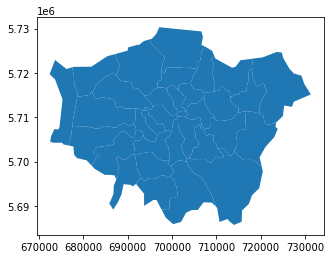

In [221]:
uk_sf2[uk_sf2["NAME_2"] == 'Greater London'].plot()

In [242]:
os.chdir(os.path.join(et.io.HOME, 'Documents', 'UEA', 'Urban_Heat', 'CUSSH', 'City_Area', 'Administrative' ,'Kenya'))
sf = gpd.read_file("gadm36_KEN_3.shp")
print(sf)

     GID_0 NAME_0     GID_1      NAME_1 NL_NAME_1       GID_2  \
0      KEN  Kenya   KEN.1_1     Baringo      None   KEN.1.1_1   
1      KEN  Kenya   KEN.1_1     Baringo      None   KEN.1.2_1   
2      KEN  Kenya   KEN.1_1     Baringo      None   KEN.1.2_1   
3      KEN  Kenya   KEN.1_1     Baringo      None   KEN.1.2_1   
4      KEN  Kenya   KEN.1_1     Baringo      None   KEN.1.2_1   
...    ...    ...       ...         ...       ...         ...   
1441   KEN  Kenya  KEN.47_1  West Pokot      None  KEN.47.4_1   
1442   KEN  Kenya  KEN.47_1  West Pokot      None  KEN.47.4_1   
1443   KEN  Kenya  KEN.47_1  West Pokot      None  KEN.47.4_1   
1444   KEN  Kenya  KEN.47_1  West Pokot      None  KEN.47.5_1   
1445   KEN  Kenya  KEN.47_1  West Pokot      None  KEN.47.6_1   

               NAME_2 NL_NAME_2         GID_3           NAME_3 VARNAME_3  \
0                 805      None   KEN.1.1.1_1           Lembus      None   
1     Baringo Central      None   KEN.1.2.1_1  Ewalel/Chapchap     

In [245]:
sf[sf["NAME_1"] == 'Kisumu']

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
524,KEN,Kenya,KEN.17_1,Kisumu,None,KEN.17.1_1,Kisumu Central,None,KEN.17.1.1_1,Kondele,None,None,Ward,Ward,1200,None,"POLYGON ((34.77490 -0.09449, 34.77517 -0.08381..."
525,KEN,Kenya,KEN.17_1,Kisumu,None,KEN.17.1_1,Kisumu Central,None,KEN.17.1.2_1,Market Milimani,None,None,Ward,Ward,1199,None,"POLYGON ((34.75993 -0.10998, 34.74566 -0.12081..."
526,KEN,Kenya,KEN.17_1,Kisumu,None,KEN.17.1_1,Kisumu Central,None,KEN.17.1.3_1,Migosi,None,None,Ward,Ward,1197,None,"POLYGON ((34.77343 -0.07709, 34.77406 -0.07621..."
527,KEN,Kenya,KEN.17_1,Kisumu,None,KEN.17.1_1,Kisumu Central,None,KEN.17.1.4_1,Nyalenda 'A',None,None,Ward,Ward,1189,None,"POLYGON ((34.78562 -0.10820, 34.78596 -0.10874..."
528,KEN,Kenya,KEN.17_1,Kisumu,None,KEN.17.1_1,Kisumu Central,None,KEN.17.1.5_1,Nyalenda B,None,None,Ward,Ward,1201,None,"POLYGON ((34.75993 -0.10998, 34.76245 -0.11329..."
529,KEN,Kenya,KEN.17_1,Kisumu,None,KEN.17.1_1,Kisumu Central,None,KEN.17.1.6_1,Railways,None,None,Ward,Ward,1196,None,"POLYGON ((34.73820 -0.08384, 34.72275 -0.08054..."
530,KEN,Kenya,KEN.17_1,Kisumu,None,KEN.17.1_1,Kisumu Central,None,KEN.17.1.7_1,Shaurimoyo Kaloleni,None,None,Ward,Ward,1198,None,"POLYGON ((34.77490 -0.09449, 34.77475 -0.10334..."
531,KEN,Kenya,KEN.17_1,Kisumu,None,KEN.17.2_1,Kisumu East,None,KEN.17.2.1_1,Kajulu,None,None,Ward,Ward,1186,None,"POLYGON ((34.78839 -0.06317, 34.78343 -0.06310..."
532,KEN,Kenya,KEN.17_1,Kisumu,None,KEN.17.2_1,Kisumu East,None,KEN.17.2.2_1,Kolwa Central,None,None,Ward,Ward,1190,None,"POLYGON ((34.81404 -0.06366, 34.81409 -0.06399..."
533,KEN,Kenya,KEN.17_1,Kisumu,None,KEN.17.2_1,Kisumu East,None,KEN.17.2.3_1,Kolwa East,None,None,Ward,Ward,1187,None,"POLYGON ((34.76957 -0.16109, 34.77002 -0.16055..."


In [246]:
City_Lat = -0.10221
City_Lon = 34.76171
#function for finding the UTM projection
def utm_zoner(lon, lat):
    utm_lon = lon+180
    utm_zone = int(np.ceil(utm_lon/6))
    south_hem =''
    if lat<0:
        south_hem = ' +south'
    proj_str = f'+proj=utm +zone={utm_zone}{south_hem}'
    return proj_str

#Get the UTM of the city
local_utm = CRS.from_proj4(utm_zoner(City_Lon, City_Lat))
local_epsg = local_utm.to_epsg()

#set the CRS 
sf.set_crs(epsg=4326, inplace=True)

#change crs to local
sf2 = sf.to_crs(epsg=local_epsg).copy()

#calculate area
sf2["area"] = sf2['geometry'].area/(10**6)

In [280]:
central_kisumu = sf2[sf2["NAME_2"] == 'Kisumu Central']
east_kisumu = sf2[sf2["NAME_2"] =='Kisumu East'] 
west_kisumu = sf2[sf2["NAME_2"] =='Kisumu West']

In [282]:
kisumu_city = central_kisumu.append([east_kisumu, west_kisumu])

<AxesSubplot:>

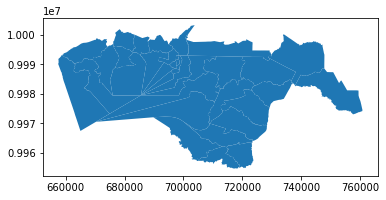

In [252]:
sf2[sf2["NAME_1"] == 'Kisumu'].plot()

<AxesSubplot:>

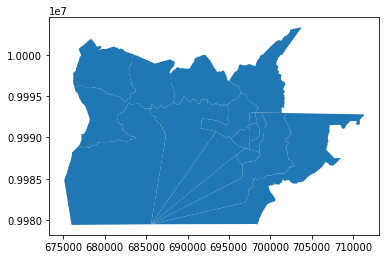

In [284]:
kisumu_city.plot()

In [285]:
kisumu_city['area'].sum()

545.914087864781

In [287]:
kisumu_city['NAME_3'].values

array(['Kondele', 'Market Milimani', 'Migosi', "Nyalenda 'A'",
       'Nyalenda B', 'Railways', 'Shaurimoyo Kaloleni', 'Kajulu',
       'Kolwa Central', 'Kolwa East', "Manyatta 'B'", 'Central Kisumu',
       'Kisumu North', 'North West Kisumu', 'South West Kisumu',
       'West Kisumu'], dtype=object)

In [288]:
os.chdir(os.path.join(et.io.HOME, 'Documents', 'UEA', 'Urban_Heat', 'CUSSH', 'City_Area', 'Administrative' ,'Kenya'))
sf = gpd.read_file("gadm36_KEN_3.shp")
print(sf)

     GID_0 NAME_0     GID_1      NAME_1 NL_NAME_1       GID_2  \
0      KEN  Kenya   KEN.1_1     Baringo      None   KEN.1.1_1   
1      KEN  Kenya   KEN.1_1     Baringo      None   KEN.1.2_1   
2      KEN  Kenya   KEN.1_1     Baringo      None   KEN.1.2_1   
3      KEN  Kenya   KEN.1_1     Baringo      None   KEN.1.2_1   
4      KEN  Kenya   KEN.1_1     Baringo      None   KEN.1.2_1   
...    ...    ...       ...         ...       ...         ...   
1441   KEN  Kenya  KEN.47_1  West Pokot      None  KEN.47.4_1   
1442   KEN  Kenya  KEN.47_1  West Pokot      None  KEN.47.4_1   
1443   KEN  Kenya  KEN.47_1  West Pokot      None  KEN.47.4_1   
1444   KEN  Kenya  KEN.47_1  West Pokot      None  KEN.47.5_1   
1445   KEN  Kenya  KEN.47_1  West Pokot      None  KEN.47.6_1   

               NAME_2 NL_NAME_2         GID_3           NAME_3 VARNAME_3  \
0                 805      None   KEN.1.1.1_1           Lembus      None   
1     Baringo Central      None   KEN.1.2.1_1  Ewalel/Chapchap     

In [289]:
City_Lat = -1.28333 
City_Lon = 36.81667
#function for finding the UTM projection
def utm_zoner(lon, lat):
    utm_lon = lon+180
    utm_zone = int(np.ceil(utm_lon/6))
    south_hem =''
    if lat<0:
        south_hem = ' +south'
    proj_str = f'+proj=utm +zone={utm_zone}{south_hem}'
    return proj_str

#Get the UTM of the city
local_utm = CRS.from_proj4(utm_zoner(City_Lon, City_Lat))
local_epsg = local_utm.to_epsg()

#set the CRS 
sf.set_crs(epsg=4326, inplace=True)

#change crs to local
sf2 = sf.to_crs(epsg=local_epsg).copy()

#calculate area
sf2["area"] = sf2['geometry'].area/(10**6)

<AxesSubplot:>

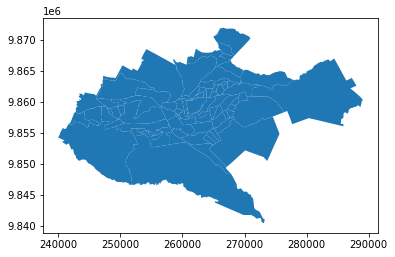

In [340]:
sf2[sf2["NAME_1"] == 'Nairobi'].plot()

In [357]:
rennes_coords = [[-1.751605,48.081862],[-1.7513621,48.0817729],[-1.7483977,48.0811307],[-1.7453801,48.0810388],[-1.7450416,48.0810746],[-1.7440022,48.0810711],[-1.7415481,48.0799292],[-1.7402929,48.0806062],[-1.7392815,48.0810141],[-1.7380971,48.0815433],[-1.7374459,48.0817599],[-1.7369319,48.0819426],[-1.7366002,48.0820945],[-1.7363868,48.0822119],[-1.736044,48.0823599],[-1.7357482,48.0824729],[-1.73518,48.0826842],[-1.7349192,48.0827693],[-1.7346149,48.0828509],[-1.7343035,48.082929],[-1.7340043,48.083012],[-1.7335496,48.0831822],[-1.7333836,48.0832346],[-1.7331302,48.0833124],[-1.7329302,48.0833767],[-1.7325674,48.0834776],[-1.731895,48.0836364],[-1.731543,48.0837205],[-1.7314082,48.0837505],[-1.7313,48.0837764],[-1.731091,48.0838319],[-1.7312081,48.083889],[-1.7311546,48.0839147],[-1.73078,48.0840504],[-1.7304404,48.0841377],[-1.7302638,48.0841945],[-1.7302817,48.0842406],[-1.7301024,48.0842838],[-1.7300935,48.0842739],[-1.7299114,48.0843111],[-1.7297078,48.0843964],[-1.7296131,48.084317],[-1.7291357,48.0845405],[-1.7288054,48.0846634],[-1.7286709,48.0847161],[-1.7285273,48.0847722],[-1.7282711,48.0848668],[-1.728136,48.0849137],[-1.7281575,48.0849451],[-1.728193,48.0850003],[-1.7282123,48.0850239],[-1.7284293,48.0853104],[-1.7287534,48.0856988],[-1.7289886,48.0859598],[-1.7289473,48.0859776],[-1.7289071,48.0859945],[-1.7285862,48.0861253],[-1.7283937,48.0861993],[-1.7281703,48.0862863],[-1.7281458,48.0862973],[-1.7278944,48.0864105],[-1.7277804,48.0864618],[-1.7277569,48.0864724],[-1.7276661,48.0865133],[-1.7276412,48.0865367],[-1.7274965,48.0866726],[-1.7274691,48.0866978],[-1.727382,48.0867774],[-1.727232,48.0869148],[-1.7272253,48.0869209],[-1.7272149,48.0869317],[-1.7271133,48.0868523],[-1.7269067,48.0867523],[-1.7266453,48.0866839],[-1.7265289,48.0866805],[-1.7261759,48.08667],[-1.7260422,48.0866334],[-1.7258909,48.086587],[-1.7257189,48.0865172],[-1.7256658,48.0864744],[-1.7256287,48.0864609],[-1.7256149,48.0864785],[-1.7256344,48.0864877],[-1.7255906,48.086647],[-1.7255511,48.086793],[-1.7255291,48.0868694],[-1.724755,48.087787],[-1.7245132,48.0880254],[-1.7243428,48.08816],[-1.7237012,48.0885601],[-1.7234368,48.0887617],[-1.7234561,48.0887701],[-1.7234455,48.0887748],[-1.7234353,48.0887741],[-1.7234118,48.0887641],[-1.7234015,48.0887656],[-1.7233917,48.0887767],[-1.7233758,48.0887931],[-1.723358,48.0888102],[-1.7233244,48.0888328],[-1.7232641,48.0888602],[-1.7231901,48.0888932],[-1.7231015,48.0889491],[-1.7229725,48.0890291],[-1.7228648,48.0890932],[-1.7227668,48.0891581],[-1.7226771,48.0892169],[-1.722559,48.0893],[-1.7224426,48.0893779],[-1.7223044,48.0894697],[-1.7221305,48.0895799],[-1.721984,48.0896836],[-1.7220124,48.0897326],[-1.7218707,48.0898159],[-1.7217774,48.0898706],[-1.7215413,48.0900155],[-1.7214618,48.0900653],[-1.7214001,48.0901054],[-1.7212743,48.0901814],[-1.7212008,48.0902274],[-1.7210875,48.090303],[-1.7209822,48.0903738],[-1.7208811,48.0904419],[-1.7207913,48.0905009],[-1.7207109,48.0905514],[-1.7205945,48.0906233],[-1.7204715,48.0907002],[-1.7203742,48.0907585],[-1.7202605,48.0908244],[-1.7201402,48.0908952],[-1.7200482,48.090948],[-1.7199359,48.0910083],[-1.7198285,48.0910655],[-1.7197382,48.0911159],[-1.7196664,48.0911528],[-1.7195386,48.0912174],[-1.7194204,48.0912763],[-1.7193069,48.0913343],[-1.7192789,48.0913475],[-1.7192294,48.091369],[-1.719167,48.0913945],[-1.7191234,48.0914129],[-1.718982,48.0914661],[-1.7189095,48.0914883],[-1.7188934,48.0914931],[-1.7187703,48.091531],[-1.7187037,48.0915515],[-1.7186249,48.0915789],[-1.7185737,48.0915983],[-1.7185032,48.0916232],[-1.7184413,48.0916482],[-1.7183112,48.0916891],[-1.718199,48.0917253],[-1.7181061,48.0917573],[-1.7178992,48.0918287],[-1.7178003,48.0918624],[-1.7177606,48.0918753],[-1.717652,48.0919107],[-1.7175055,48.091957],[-1.717371,48.0919992],[-1.7172465,48.092038],[-1.7171253,48.0920762],[-1.7170358,48.0921039],[-1.716951,48.0921299],[-1.7168596,48.0921596],[-1.7167781,48.092185],[-1.7167061,48.0922073],[-1.7165913,48.0922439],[-1.7164828,48.0922792],[-1.7163618,48.0923188],[-1.716248,48.0923547],[-1.7161467,48.092388],[-1.7160684,48.0924131],[-1.7160018,48.0924355],[-1.7158686,48.0924847],[-1.7157475,48.0925281],[-1.715622,48.0925724],[-1.715443,48.0926375],[-1.7153483,48.0926699],[-1.7152717,48.0926968],[-1.7152382,48.0927072],[-1.7150939,48.0927652],[-1.7150159,48.0927945],[-1.7149758,48.0928152],[-1.7149063,48.0928411],[-1.7146976,48.0929179],[-1.7146543,48.0929327],[-1.7145565,48.0929662],[-1.7143751,48.0930297],[-1.7141142,48.0931207],[-1.7140292,48.0931504],[-1.7139775,48.0931683],[-1.7139268,48.0931861],[-1.7137457,48.0932493],[-1.713685,48.0932704],[-1.7132489,48.0934248],[-1.7129748,48.0936192],[-1.7126649,48.0938351],[-1.7125042,48.0939505],[-1.7124544,48.0939728],[-1.7122689,48.0940538],[-1.7119143,48.0942065],[-1.7115746,48.0943549],[-1.711338,48.094458],[-1.7109544,48.0946247],[-1.7108959,48.0946482],[-1.7108787,48.0946556],[-1.7105998,48.0947768],[-1.7105727,48.0947886],[-1.7101195,48.0948586],[-1.7101093,48.0948601],[-1.7098473,48.0949052],[-1.7095151,48.0949617],[-1.7092102,48.0950138],[-1.70879,48.0950845],[-1.7081664,48.0951884],[-1.70795,48.0952263],[-1.7076105,48.0952856],[-1.7073596,48.0953275],[-1.7072891,48.0953392],[-1.7071284,48.0953659],[-1.7069904,48.0953895],[-1.7068683,48.0954104],[-1.7062097,48.0955247],[-1.7047637,48.0957754],[-1.703317,48.0960261],[-1.7023211,48.0962008],[-1.7022301,48.0962167],[-1.7017034,48.0962408],[-1.701655,48.0962481],[-1.701097,48.096331],[-1.7008418,48.0963691],[-1.6990198,48.096777],[-1.6985239,48.0968873],[-1.6984625,48.0970054],[-1.6981713,48.0970432],[-1.6978433,48.0970867],[-1.6977413,48.0971018],[-1.6977357,48.0970899],[-1.6976987,48.0969787],[-1.6975193,48.0969956],[-1.6974051,48.0970054],[-1.697381,48.0970076],[-1.6972012,48.0970241],[-1.6970319,48.0970398],[-1.6968284,48.0970576],[-1.6966414,48.0970717],[-1.6964491,48.0970872],[-1.6962838,48.0971003],[-1.6962022,48.0971067],[-1.6960549,48.0971215],[-1.6958672,48.097143],[-1.6956908,48.0971619],[-1.6955703,48.0971741],[-1.6953068,48.0972031],[-1.6952006,48.0972133],[-1.6950922,48.0972286],[-1.6950549,48.0972338],[-1.6949181,48.0972533],[-1.6947682,48.0972745],[-1.6946311,48.0972939],[-1.6945631,48.0973039],[-1.6944521,48.0973201],[-1.6943163,48.0972961],[-1.6942829,48.0972899],[-1.69417,48.0972693],[-1.6940866,48.097254],[-1.6940541,48.0972482],[-1.6940034,48.0972393],[-1.6939721,48.097234],[-1.6938852,48.0972194],[-1.6938205,48.0972865],[-1.6937559,48.0972757],[-1.6935876,48.097247],[-1.6935279,48.0972358],[-1.6935006,48.0972278],[-1.6934823,48.0972184],[-1.6933714,48.097152],[-1.6933433,48.0971337],[-1.6932456,48.0970552],[-1.6931438,48.0970104],[-1.6931617,48.0969867],[-1.6930045,48.0969368],[-1.6928414,48.0968892],[-1.692805,48.0968586],[-1.6926997,48.096854],[-1.6925361,48.0968458],[-1.6923206,48.0968372],[-1.6922652,48.0967565],[-1.6921222,48.096804],[-1.6920451,48.0967945],[-1.6919743,48.0968158],[-1.6919109,48.0968361],[-1.6919037,48.0968267],[-1.6918648,48.0968172],[-1.6917939,48.09684],[-1.6917869,48.0968306],[-1.6917122,48.0968552],[-1.6917076,48.0968506],[-1.6917033,48.096845],[-1.6916792,48.0968127],[-1.6915888,48.0966862],[-1.691435,48.0967329],[-1.6914316,48.096734],[-1.6912798,48.0967861],[-1.6912682,48.0967898],[-1.6910091,48.0967962],[-1.6908654,48.096772],[-1.6908307,48.0967665],[-1.6908023,48.0967621],[-1.6906072,48.0967316],[-1.6905699,48.0967264],[-1.6904765,48.0967158],[-1.6903726,48.0967055],[-1.6903125,48.0966997],[-1.6902776,48.0966963],[-1.6902558,48.0966941],[-1.6902109,48.0966892],[-1.6901192,48.0966832],[-1.6900934,48.0966818],[-1.6900193,48.0966773],[-1.6899557,48.0966735],[-1.6899264,48.0966717],[-1.6898401,48.0966631],[-1.6898214,48.0966612],[-1.6897579,48.0966553],[-1.6897502,48.0966513],[-1.6897043,48.0966286],[-1.6897252,48.096533],[-1.6895887,48.0965198],[-1.6894175,48.0964946],[-1.6893265,48.0964781],[-1.6894015,48.0963303],[-1.6894524,48.0962476],[-1.6895306,48.0961115],[-1.6897673,48.0956334],[-1.6898142,48.0955449],[-1.689862,48.0954508],[-1.6898764,48.0954188],[-1.690041,48.0950838],[-1.6901395,48.0948829],[-1.6901707,48.0948207],[-1.6902224,48.0947185],[-1.6902799,48.094598],[-1.6902895,48.0945778],[-1.6903174,48.0945192],[-1.6903735,48.0944017],[-1.6904562,48.0942527],[-1.6905346,48.0941014],[-1.6907396,48.0937057],[-1.6908495,48.0935134],[-1.6910358,48.0931855],[-1.6911959,48.0929121],[-1.6913631,48.0926334],[-1.691399,48.0925739],[-1.6914292,48.0925229],[-1.6914594,48.0924722],[-1.6915103,48.0923868],[-1.6916137,48.0922132],[-1.6916865,48.0920901],[-1.6917691,48.0919529],[-1.6922159,48.0912037],[-1.6922433,48.0911689],[-1.6923623,48.0909601],[-1.6925362,48.0906685],[-1.6926327,48.0905048],[-1.692648,48.0904789],[-1.6926948,48.0903995],[-1.6926954,48.0903651],[-1.6926862,48.090324],[-1.692683,48.0903096],[-1.6926786,48.0902891],[-1.6926655,48.0902149],[-1.6926521,48.0901384],[-1.6926393,48.0900709],[-1.6926465,48.0900535],[-1.6926357,48.0900501],[-1.6926276,48.0899977],[-1.6926266,48.0898548],[-1.6926353,48.0897076],[-1.6927039,48.0894636],[-1.692695,48.0894585],[-1.6928149,48.0892179],[-1.6928769,48.0889637],[-1.6929367,48.0887191],[-1.6929307,48.0887151],[-1.6929605,48.0885551],[-1.6929556,48.0884424],[-1.6930059,48.088189],[-1.6930071,48.0881188],[-1.6929448,48.0875729],[-1.6929114,48.0872831],[-1.6928905,48.0870757],[-1.6928738,48.0868805],[-1.6928825,48.0868569],[-1.6929004,48.0868365],[-1.6929346,48.0868123],[-1.6929778,48.0867926],[-1.6930199,48.0867826],[-1.6932847,48.0867227],[-1.6932683,48.0868154],[-1.6934054,48.0867322],[-1.6934855,48.0867957],[-1.6935084,48.0867843],[-1.6936174,48.0867763],[-1.6937486,48.0867868],[-1.6939559,48.0867565],[-1.6939882,48.0867417],[-1.6942636,48.0866787],[-1.6943518,48.0864909],[-1.6943636,48.0864312],[-1.6949325,48.0864542],[-1.6950119,48.0864588],[-1.6950337,48.0864209],[-1.6957956,48.0864657],[-1.695818,48.0866864],[-1.6960127,48.0868251],[-1.6962365,48.0868675],[-1.6965915,48.0869446],[-1.696679,48.0868877],[-1.6967847,48.0868666],[-1.6971664,48.0868175],[-1.6976655,48.0867513],[-1.6978707,48.0867158],[-1.6979908,48.086695],[-1.6981145,48.0866745],[-1.6981558,48.0866609],[-1.6982002,48.0866346],[-1.6982417,48.0865985],[-1.6982971,48.0865664],[-1.6990624,48.0861194],[-1.6998593,48.0856518],[-1.7000681,48.085597],[-1.701003,48.0852065],[-1.7024726,48.0845812],[-1.7025415,48.0845032],[-1.7028095,48.0842594],[-1.7030443,48.0839954],[-1.7032512,48.0837445],[-1.7033115,48.08365],[-1.7033675,48.083447],[-1.7036841,48.0828504],[-1.7037398,48.082712],[-1.7037741,48.0825839],[-1.7036602,48.0825031],[-1.7035216,48.0824466],[-1.7035702,48.082342],[-1.7036238,48.0822448],[-1.7037515,48.0820483],[-1.7038062,48.0819661],[-1.7038508,48.0819121],[-1.704006,48.0817605],[-1.7040095,48.0817491],[-1.7039999,48.0817339],[-1.7039641,48.0817155],[-1.7039065,48.081707],[-1.7038404,48.0817193],[-1.7038183,48.0817264],[-1.7037646,48.0817605],[-1.703704,48.0817855],[-1.7036011,48.0818186],[-1.7035481,48.0818228],[-1.7035085,48.0818215],[-1.7034493,48.0818097],[-1.7033258,48.0817382],[-1.7032617,48.0816897],[-1.7031463,48.081598],[-1.7029802,48.0814762],[-1.7029421,48.0814375],[-1.7029114,48.0814027],[-1.7028815,48.081378],[-1.702862,48.0813677],[-1.702845,48.0813609],[-1.7028298,48.0813571],[-1.7028119,48.0813547],[-1.7027765,48.0813577],[-1.7027421,48.0813657],[-1.7026777,48.0813887],[-1.7025963,48.0814271],[-1.7025292,48.0814486],[-1.7023629,48.0814889],[-1.7021763,48.0815332],[-1.7021025,48.0815399],[-1.701921,48.0815799],[-1.7018224,48.081611],[-1.7017588,48.0816267],[-1.7017042,48.0816346],[-1.7016691,48.0816305],[-1.7015454,48.0816001],[-1.7014626,48.0815632],[-1.7014016,48.0815157],[-1.7013777,48.0814861],[-1.7013675,48.0814528],[-1.7013657,48.0813663],[-1.7013767,48.08132],[-1.7013794,48.0813015],[-1.7013741,48.0812866],[-1.7013539,48.0812666],[-1.7013406,48.0812606],[-1.7013199,48.081253],[-1.7012868,48.081248],[-1.7011378,48.0812502],[-1.7010865,48.0812483],[-1.7010354,48.0812457],[-1.7009921,48.0812406],[-1.7009521,48.0812263],[-1.7009015,48.081199],[-1.7008214,48.0811401],[-1.7008002,48.0811287],[-1.7007575,48.0811151],[-1.7007211,48.0811107],[-1.700631,48.0811068],[-1.7004358,48.0810683],[-1.7003644,48.0810482],[-1.700211,48.0809968],[-1.7001568,48.0809815],[-1.700132,48.0809634],[-1.7001131,48.0809396],[-1.7001122,48.0809215],[-1.7001159,48.0808957],[-1.7001273,48.08086],[-1.700138,48.080826],[-1.7001406,48.0807917],[-1.7001327,48.0807568],[-1.7001176,48.0807384],[-1.7000479,48.080721],[-1.6999078,48.0807068],[-1.699842,48.0806874],[-1.6997173,48.0806418],[-1.6996847,48.0806172],[-1.6996662,48.0805945],[-1.6995884,48.0805531],[-1.6995698,48.080535],[-1.6995301,48.0804761],[-1.6995198,48.0804091],[-1.6994994,48.0803508],[-1.6994807,48.0803291],[-1.6994365,48.0802911],[-1.699327,48.0802166],[-1.6992742,48.0801999],[-1.6992319,48.0801909],[-1.6991479,48.0801808],[-1.6989911,48.0801513],[-1.6988916,48.0801385],[-1.6988052,48.0801338],[-1.6986748,48.0801141],[-1.6986276,48.080118],[-1.6986088,48.0801284],[-1.6985954,48.0801413],[-1.6985116,48.0802605],[-1.6984645,48.0803128],[-1.6984213,48.0803358],[-1.6983545,48.0803491],[-1.6983023,48.0803573],[-1.6982815,48.0803586],[-1.6980199,48.0803417],[-1.6978821,48.080362],[-1.697739,48.0804014],[-1.6976893,48.0804162],[-1.6976075,48.0804301],[-1.6975317,48.0804355],[-1.6974499,48.0804373],[-1.6972668,48.0804203],[-1.6972107,48.0804236],[-1.6971349,48.0804263],[-1.6965641,48.0804763],[-1.6946314,48.0806485],[-1.6945808,48.0806591],[-1.6945145,48.080664],[-1.6944205,48.0806698],[-1.6942356,48.0807014],[-1.6942153,48.0806999],[-1.6941233,48.0806835],[-1.6940919,48.0806835],[-1.694078,48.0806873],[-1.6940675,48.0806933],[-1.6940498,48.0807135],[-1.694041,48.0807361],[-1.6940342,48.0807594],[-1.6940161,48.0808232],[-1.6940041,48.0809],[-1.6939937,48.080949],[-1.6939704,48.081089],[-1.6939635,48.0811847],[-1.69396,48.0812808],[-1.6939684,48.0813161],[-1.6939737,48.0813538],[-1.693967,48.0813632],[-1.6939573,48.0813679],[-1.693898,48.0813721],[-1.6938721,48.0813715],[-1.6938461,48.081368],[-1.6938239,48.0813621],[-1.693798,48.0813545],[-1.6936427,48.081296],[-1.6935004,48.0812952],[-1.6933111,48.081297],[-1.6932226,48.0813039],[-1.693144,48.0813039],[-1.6931023,48.0813024],[-1.6929122,48.0812788],[-1.6928582,48.0812768],[-1.6926926,48.0812871],[-1.6926191,48.0812797],[-1.6925531,48.0812747],[-1.692473,48.0812638],[-1.6924187,48.0812515],[-1.6921595,48.0811812],[-1.6919909,48.0811385],[-1.6917848,48.081153],[-1.691629,48.0811679],[-1.6915568,48.0811789],[-1.6914951,48.0811978],[-1.6914396,48.0812317],[-1.6911997,48.081425],[-1.6910631,48.0813942],[-1.6909753,48.0813926],[-1.6909381,48.0813783],[-1.6908164,48.0813034],[-1.6906888,48.0812223],[-1.6903458,48.0810016],[-1.6902618,48.0809437],[-1.6901878,48.0808828],[-1.6901499,48.080849],[-1.689986,48.0806785],[-1.6897643,48.0804602],[-1.6896333,48.0804288],[-1.6894881,48.0804056],[-1.6893466,48.0804006],[-1.6892711,48.0804096],[-1.6890399,48.0804258],[-1.6889843,48.0804279],[-1.6888428,48.0804333],[-1.6887049,48.0804369],[-1.688625,48.0804291],[-1.6883561,48.0803893],[-1.6882498,48.0803821],[-1.6882283,48.0803839],[-1.6881972,48.080391],[-1.6878953,48.0805195],[-1.6878745,48.0805244],[-1.6878525,48.080526],[-1.6877581,48.0805235],[-1.6877105,48.0805146],[-1.6876789,48.0805063],[-1.687643,48.0804946],[-1.6876001,48.0804765],[-1.6875571,48.0804552],[-1.6875182,48.0804348],[-1.6874801,48.0804274],[-1.6872038,48.0804355],[-1.6869718,48.0804548],[-1.6867029,48.0804875],[-1.6860624,48.0805302],[-1.6860054,48.0805309],[-1.6859528,48.0805247],[-1.685876,48.0805014],[-1.6858054,48.0804754],[-1.6856415,48.0803831],[-1.6855784,48.0803567],[-1.6854475,48.0803086],[-1.6853131,48.0802657],[-1.6852387,48.0802453],[-1.6851938,48.0802375],[-1.6851483,48.0802325],[-1.6850815,48.0802291],[-1.6850247,48.0802287],[-1.6849546,48.0802337],[-1.684875,48.0802419],[-1.6846219,48.0802719],[-1.6845221,48.0802851],[-1.6844857,48.0802887],[-1.6844334,48.0802927],[-1.6843392,48.0802932],[-1.6842721,48.0802916],[-1.6841909,48.0802876],[-1.6841332,48.0802829],[-1.6841158,48.0802834],[-1.684088,48.0802945],[-1.6840438,48.0803223],[-1.6839963,48.0803559],[-1.6839036,48.0804334],[-1.6838645,48.0804777],[-1.6838237,48.0805288],[-1.6837564,48.0806137],[-1.6837391,48.0806304],[-1.6837039,48.0806557],[-1.6836503,48.0806884],[-1.6835947,48.0807186],[-1.6835151,48.0807426],[-1.6834337,48.080761],[-1.6833684,48.080772],[-1.6832181,48.0807945],[-1.6831268,48.0808077],[-1.6830755,48.0808157],[-1.6830103,48.0808307],[-1.6829708,48.0808375],[-1.6829159,48.0808431],[-1.6828563,48.0808471],[-1.682808,48.0808484],[-1.682734,48.0808464],[-1.6826281,48.0808459],[-1.6825517,48.0808456],[-1.6825522,48.0808573],[-1.6825273,48.0808582],[-1.6825136,48.080861],[-1.6824983,48.0808662],[-1.6824861,48.0808718],[-1.682473,48.080879],[-1.6824593,48.0808882],[-1.6824478,48.0808975],[-1.6824035,48.0809466],[-1.6823547,48.0810048],[-1.6823166,48.0810464],[-1.6823068,48.0810523],[-1.6822969,48.0810562],[-1.6822826,48.0810613],[-1.6822561,48.0810694],[-1.682224,48.0810766],[-1.6821967,48.0810838],[-1.6820539,48.0811042],[-1.682013,48.0811113],[-1.681989,48.0811163],[-1.6819642,48.0811236],[-1.6819389,48.0811326],[-1.6819192,48.0811412],[-1.6819024,48.0811511],[-1.6818906,48.081161],[-1.6818739,48.0811785],[-1.6818636,48.0811929],[-1.6818553,48.0812042],[-1.6818178,48.0813083],[-1.6817999,48.0813569],[-1.6817926,48.081367],[-1.6817837,48.0813772],[-1.6817749,48.0813848],[-1.6817629,48.081394],[-1.6817478,48.0814031],[-1.6817281,48.081414],[-1.6816822,48.0814388],[-1.6816467,48.0814582],[-1.6816141,48.0814775],[-1.6815949,48.0814892],[-1.681578,48.0814997],[-1.6815187,48.0815402],[-1.6814896,48.0815662],[-1.68147,48.0815841],[-1.6813596,48.0817483],[-1.6813249,48.0817855],[-1.6811647,48.0819089],[-1.6811388,48.0819258],[-1.6811024,48.0819377],[-1.6810761,48.0819426],[-1.6810245,48.0819426],[-1.6807515,48.0819359],[-1.6806934,48.0819408],[-1.680574,48.0819617],[-1.6804394,48.0819924],[-1.6801454,48.082073],[-1.6801227,48.0819845],[-1.6801026,48.0818965],[-1.6800657,48.081823],[-1.680028,48.0817632],[-1.6799791,48.0816924],[-1.6798788,48.0815549],[-1.6798128,48.0814355],[-1.6797925,48.0813992],[-1.6797564,48.0813423],[-1.6797222,48.0812971],[-1.6796934,48.0812577],[-1.6796364,48.0812021],[-1.6795338,48.0811358],[-1.6794795,48.0811063],[-1.6793883,48.0810664],[-1.6793315,48.0810444],[-1.6792689,48.0810248],[-1.679277,48.0809954],[-1.6793519,48.0809094],[-1.6793536,48.0808988],[-1.6793383,48.0808563],[-1.6792973,48.0807503],[-1.679283,48.0806619],[-1.679271,48.0805994],[-1.6792448,48.0804533],[-1.6791925,48.080255],[-1.6791708,48.0800424],[-1.6791606,48.0799811],[-1.6790859,48.0795628],[-1.6788693,48.0783276],[-1.678678,48.0772041],[-1.677812,48.0771509],[-1.6769503,48.0773128],[-1.6769241,48.077317],[-1.6768975,48.0772994],[-1.6766921,48.0773242],[-1.6765327,48.0773492],[-1.6764382,48.077363],[-1.6754574,48.0774959],[-1.6754653,48.0776152],[-1.6752946,48.0776317],[-1.6751778,48.077634],[-1.6750949,48.0776357],[-1.6750014,48.0776307],[-1.6748666,48.0776147],[-1.6748405,48.0776636],[-1.6748025,48.077718],[-1.6747568,48.0777658],[-1.6746473,48.0778218],[-1.6745966,48.0778422],[-1.6745233,48.0778594],[-1.6744801,48.0778622],[-1.6744331,48.0778632],[-1.6744193,48.077862],[-1.6744035,48.0778574],[-1.6743598,48.0778343],[-1.6742258,48.0777519],[-1.6741252,48.0776912],[-1.6740463,48.0776455],[-1.6739042,48.0775728],[-1.6738642,48.0775555],[-1.6738241,48.077538],[-1.6737563,48.0775134],[-1.6736815,48.0774883],[-1.6734595,48.0774308],[-1.6733279,48.0774077],[-1.6732429,48.0773899],[-1.6732164,48.0773858],[-1.6731278,48.0773849],[-1.6731051,48.0773247],[-1.6715302,48.0771615],[-1.6715617,48.0770638],[-1.671436,48.0770478],[-1.6713534,48.0770373],[-1.6713474,48.0770365],[-1.6713565,48.076919],[-1.6712516,48.0769154],[-1.6711369,48.0769195],[-1.6707547,48.0769329],[-1.6705845,48.0769401],[-1.6702869,48.076957],[-1.6699958,48.0769745],[-1.669983,48.0769752],[-1.6699394,48.0769776],[-1.6695506,48.0769988],[-1.6691169,48.0770237],[-1.6687485,48.0770444],[-1.6681958,48.077081],[-1.6676812,48.077112],[-1.6671714,48.0771383],[-1.6666258,48.0771701],[-1.6665392,48.0771747],[-1.6664237,48.077186],[-1.6661067,48.0772187],[-1.6658528,48.077257],[-1.6658182,48.0772621],[-1.665244,48.0773712],[-1.6649966,48.0774204],[-1.6649,48.077444],[-1.6648546,48.0774552],[-1.6647139,48.0774826],[-1.6647004,48.0774842],[-1.6646077,48.0774951],[-1.6645593,48.0775021],[-1.6643688,48.0775384],[-1.6640719,48.0775974],[-1.6638674,48.0776395],[-1.6634788,48.0777163],[-1.6630893,48.0777939],[-1.6628812,48.0778351],[-1.6627202,48.0778668],[-1.6626725,48.0778763],[-1.6625944,48.0778913],[-1.6622838,48.077951],[-1.6618906,48.0780286],[-1.6616164,48.078083],[-1.6612633,48.0781531],[-1.661162,48.0781718],[-1.661341,48.0784552],[-1.6615442,48.078734],[-1.6616747,48.0789112],[-1.661701,48.0789493],[-1.661768,48.0790834],[-1.661837,48.0792332],[-1.6619045,48.0793815],[-1.6619502,48.0795256],[-1.6620065,48.0797208],[-1.66206,48.079936],[-1.6621156,48.0801347],[-1.662173,48.0803485],[-1.6622036,48.0804678],[-1.6622509,48.080727],[-1.6622809,48.0809776],[-1.6623189,48.081169],[-1.6623672,48.0812719],[-1.6623908,48.0813443],[-1.6624108,48.0813913],[-1.6624342,48.0814476],[-1.6624505,48.0814789],[-1.6624563,48.0814926],[-1.6624683,48.0815185],[-1.6624931,48.0815629],[-1.6625189,48.0816114],[-1.6625392,48.081647],[-1.6625578,48.0816833],[-1.6625827,48.0817279],[-1.6626013,48.0817632],[-1.662619,48.0817963],[-1.6626341,48.0818202],[-1.6626453,48.081838],[-1.6626674,48.081874],[-1.662691,48.08191],[-1.6627123,48.0819432],[-1.6627315,48.0819724],[-1.6627461,48.0820008],[-1.662763,48.0820251],[-1.6627786,48.0820482],[-1.662803,48.0820823],[-1.6628227,48.0821117],[-1.6628491,48.0821509],[-1.6629109,48.0822578],[-1.6629402,48.0823112],[-1.6629655,48.0823573],[-1.6629771,48.0823845],[-1.6629844,48.0824077],[-1.6629874,48.0824198],[-1.6629878,48.0824307],[-1.6629868,48.0824464],[-1.6629824,48.0824606],[-1.6629765,48.0824741],[-1.662962,48.0824952],[-1.6629461,48.0825171],[-1.6628814,48.0826077],[-1.6628325,48.0826112],[-1.662798,48.0826146],[-1.6627758,48.0826174],[-1.6627628,48.0826212],[-1.6627563,48.0826242],[-1.6627495,48.0826287],[-1.6627407,48.0826353],[-1.6627167,48.0826533],[-1.662694,48.082672],[-1.6626619,48.0826983],[-1.6626324,48.0827228],[-1.6626034,48.0827439],[-1.662587,48.0827532],[-1.6625641,48.082765],[-1.6625426,48.0827741],[-1.6625217,48.0827798],[-1.6624974,48.0827846],[-1.6624672,48.0827876],[-1.6624255,48.0827902],[-1.6623637,48.0827914],[-1.6622844,48.0827947],[-1.6621891,48.0827992],[-1.6620069,48.0828112],[-1.6619494,48.0828166],[-1.6619167,48.0828197],[-1.6618814,48.0828251],[-1.6618498,48.0828322],[-1.6618135,48.0828408],[-1.6617637,48.0828515],[-1.6617176,48.0828619],[-1.6616698,48.0828682],[-1.6616178,48.0828739],[-1.6615673,48.0828791],[-1.6614917,48.082886],[-1.6614466,48.08289],[-1.6614198,48.0828911],[-1.6614006,48.0828911],[-1.661385,48.0828899],[-1.6613718,48.0828876],[-1.6613578,48.0828843],[-1.6613457,48.0828786],[-1.661335,48.0828705],[-1.6612977,48.0828444],[-1.661249,48.0828074],[-1.6611504,48.0827337],[-1.6610924,48.0826949],[-1.6610607,48.0826716],[-1.6610287,48.0826479],[-1.6609863,48.0827497],[-1.6609786,48.0826034],[-1.6609525,48.0825837],[-1.6609122,48.0825564],[-1.6608988,48.0825497],[-1.6608773,48.0825406],[-1.6608678,48.0825362],[-1.6608522,48.082529],[-1.6607799,48.0825386],[-1.6607314,48.0825447],[-1.6606793,48.0825507],[-1.6606394,48.0825554],[-1.6606232,48.0825561],[-1.6606146,48.082554],[-1.6605895,48.082531],[-1.6605757,48.0825195],[-1.6605633,48.0825162],[-1.6605479,48.0825135],[-1.6605248,48.082513],[-1.6605107,48.0825164],[-1.660495,48.082521],[-1.6604798,48.0825278],[-1.6604614,48.0825359],[-1.6604473,48.0825437],[-1.6604346,48.082556],[-1.6604185,48.082569],[-1.6604047,48.0825822],[-1.6603937,48.082597],[-1.6603823,48.0826136],[-1.6603706,48.0826323],[-1.6603638,48.0826468],[-1.6603591,48.0826602],[-1.6603581,48.0826716],[-1.6603588,48.0826889],[-1.6603638,48.0827173],[-1.6603742,48.082767],[-1.6603756,48.0827767],[-1.6603725,48.0827854],[-1.6603658,48.082791],[-1.6603548,48.0827986],[-1.6603351,48.0828036],[-1.6602954,48.0828119],[-1.6602274,48.0828249],[-1.6601767,48.0828337],[-1.6601405,48.082839],[-1.6600832,48.0828468],[-1.660045,48.0828536],[-1.6599927,48.0828641],[-1.6599011,48.0828806],[-1.6597898,48.0829026],[-1.6596822,48.0829232],[-1.6596386,48.0829309],[-1.6596168,48.0829349],[-1.6596048,48.0829345],[-1.6595867,48.0829313],[-1.6595709,48.0829272],[-1.6595588,48.0829201],[-1.6595464,48.0829092],[-1.6595303,48.0828901],[-1.6595219,48.0828724],[-1.6595139,48.08285],[-1.6595112,48.0828315],[-1.6595126,48.0828174],[-1.6595176,48.0828004],[-1.659525,48.0827778],[-1.6595303,48.0827607],[-1.6595313,48.0827386],[-1.6595313,48.0827258],[-1.6595201,48.0826726],[-1.6595126,48.082662],[-1.6595017,48.082649],[-1.6594872,48.0826375],[-1.6594713,48.0826286],[-1.6594525,48.0826231],[-1.6594351,48.0826191],[-1.6594157,48.0826189],[-1.659392,48.0826186],[-1.6593525,48.0826204],[-1.6592623,48.0826279],[-1.6592199,48.0826311],[-1.6592037,48.0826336],[-1.6591563,48.0826402],[-1.6591058,48.082649],[-1.6590783,48.082652],[-1.659021,48.0826572],[-1.6589992,48.0826578],[-1.6589852,48.0826571],[-1.658963,48.0826545],[-1.6589322,48.0826516],[-1.6589066,48.0826468],[-1.6588466,48.0826336],[-1.6587939,48.0826198],[-1.658744,48.0826065],[-1.6587266,48.0826014],[-1.6587002,48.0825916],[-1.658672,48.0825807],[-1.6586428,48.0825685],[-1.6586096,48.0825544],[-1.6585696,48.0825323],[-1.6585325,48.0825116],[-1.6585035,48.0824943],[-1.6584738,48.0824757],[-1.658454,48.082464],[-1.6584329,48.0824558],[-1.658416,48.0824501],[-1.658386,48.0824447],[-1.6583538,48.0824392],[-1.6583214,48.0824364],[-1.6582895,48.0824344],[-1.6582654,48.0824341],[-1.6582404,48.0824343],[-1.6581924,48.0824379],[-1.6581121,48.0824432],[-1.6580879,48.0824445],[-1.6580753,48.0824427],[-1.658064,48.0824385],[-1.6580567,48.0824285],[-1.6580468,48.0824109],[-1.6580355,48.0823868],[-1.6580216,48.0823487],[-1.658013,48.0823242],[-1.6580105,48.0823065],[-1.6580078,48.0822621],[-1.6580051,48.0822399],[-1.658001,48.0822275],[-1.6579963,48.0822203],[-1.6579789,48.0822059],[-1.6579488,48.0821816],[-1.6579357,48.0821704],[-1.6579299,48.0821627],[-1.6579276,48.0821529],[-1.6579306,48.0821464],[-1.6579411,48.0821426],[-1.6579513,48.0821393],[-1.6579911,48.0821359],[-1.6580686,48.0821281],[-1.6580944,48.0821232],[-1.6581088,48.0821196],[-1.6581238,48.0821032],[-1.6581241,48.0820884],[-1.6581201,48.0820583],[-1.6581191,48.0820282],[-1.6581197,48.0820021],[-1.6581215,48.0819728],[-1.6581233,48.0819473],[-1.6581213,48.0819334],[-1.658113,48.081925],[-1.658096,48.0819101],[-1.6579948,48.0818454],[-1.6579767,48.0818313],[-1.6579675,48.0818192],[-1.6579612,48.0818037],[-1.6579487,48.0817569],[-1.6579248,48.0816866],[-1.6579176,48.0816583],[-1.6579161,48.0816409],[-1.6579199,48.0816308],[-1.6579255,48.0816173],[-1.657935,48.0816005],[-1.6579426,48.0815839],[-1.6579811,48.0815358],[-1.6580443,48.0814737],[-1.6580927,48.08142],[-1.6581378,48.0813676],[-1.6581657,48.0813354],[-1.6581762,48.0813171],[-1.6581744,48.0813054],[-1.6581567,48.0812743],[-1.658134,48.0812411],[-1.6581176,48.0812248],[-1.6580971,48.0812117],[-1.6580752,48.0811943],[-1.6580617,48.0811855],[-1.6580395,48.0811787],[-1.6580147,48.0811722],[-1.6579836,48.081165],[-1.6579574,48.0811598],[-1.6579246,48.081155],[-1.6576922,48.0811082],[-1.6558766,48.0814045],[-1.6558751,48.0815335],[-1.655625,48.0815746],[-1.6555043,48.0816051],[-1.6554358,48.0816248],[-1.6553914,48.0816416],[-1.6553796,48.0816495],[-1.6553575,48.0816623],[-1.6553304,48.0816764],[-1.6553093,48.0816857],[-1.6552813,48.0816969],[-1.6552152,48.0817194],[-1.6551909,48.0817262],[-1.6551706,48.0817311],[-1.6551559,48.081733],[-1.6551352,48.0817345],[-1.6551069,48.0817346],[-1.6550503,48.0817358],[-1.6549712,48.0817373],[-1.6548992,48.0817359],[-1.6548425,48.0817335],[-1.6548177,48.0817315],[-1.6547732,48.0817255],[-1.654728,48.0817193],[-1.6547016,48.0817197],[-1.654665,48.0817209],[-1.654636,48.0817239],[-1.6545998,48.0817282],[-1.6545384,48.0817371],[-1.6544168,48.0817538],[-1.6542916,48.0817708],[-1.6542283,48.0817797],[-1.6541899,48.0817854],[-1.6541626,48.0817872],[-1.6541377,48.0817886],[-1.6540991,48.0817889],[-1.6540538,48.0817898],[-1.6540087,48.0817924],[-1.6539025,48.0817984],[-1.6538354,48.0818017],[-1.653774,48.0818068],[-1.6537451,48.0818102],[-1.6537268,48.0818155],[-1.6537106,48.081823],[-1.6536685,48.0818432],[-1.6536268,48.0818636],[-1.6536093,48.0818694],[-1.6535889,48.0818742],[-1.6535681,48.0818751],[-1.6535346,48.0818764],[-1.6534939,48.0818753],[-1.6534585,48.0818734],[-1.653413,48.0818713],[-1.65338,48.0818677],[-1.6533172,48.0818068],[-1.653263,48.0817487],[-1.6532151,48.0817306],[-1.6531908,48.0817215],[-1.6531711,48.081714],[-1.6531408,48.0817087],[-1.6531015,48.0817055],[-1.6530179,48.0816989],[-1.6529421,48.081692],[-1.6529072,48.0816907],[-1.652885,48.0816862],[-1.6528719,48.081678],[-1.6528595,48.0816594],[-1.6528449,48.0816424],[-1.6528385,48.0816194],[-1.6528352,48.0815995],[-1.6528251,48.0815651],[-1.6528173,48.081514],[-1.6527963,48.0814222],[-1.6527962,48.0814135],[-1.6528007,48.0814072],[-1.652826,48.0813984],[-1.652844,48.0813939],[-1.6528593,48.0813789],[-1.6528681,48.0813603],[-1.6528731,48.0813229],[-1.6529032,48.0812431],[-1.6529133,48.0811906],[-1.6529265,48.0810861],[-1.6529356,48.0810567],[-1.6529483,48.0810264],[-1.652994,48.0809349],[-1.653,48.0809224],[-1.6530001,48.0809095],[-1.6529982,48.0808966],[-1.6529981,48.0808763],[-1.6530043,48.0808605],[-1.6530137,48.0808464],[-1.6530314,48.0808357],[-1.6530475,48.0808262],[-1.6530698,48.0808197],[-1.6530848,48.0808094],[-1.6531005,48.0807922],[-1.6531087,48.0807798],[-1.6531044,48.0807716],[-1.6530856,48.0807502],[-1.6530635,48.0807344],[-1.6530339,48.0807203],[-1.6529953,48.0807042],[-1.6529297,48.0806783],[-1.6529007,48.0806638],[-1.6528592,48.0806413],[-1.6528231,48.0806189],[-1.6527654,48.0805829],[-1.652744,48.0805686],[-1.6527267,48.0805609],[-1.6527147,48.0805567],[-1.6526989,48.0805508],[-1.6526849,48.0805426],[-1.6526762,48.0805333],[-1.6526705,48.080522],[-1.6526729,48.0805045],[-1.6526696,48.0804933],[-1.6526618,48.0804861],[-1.6525733,48.0805454],[-1.6524989,48.0806025],[-1.6524229,48.0806627],[-1.6523575,48.0807107],[-1.652281,48.0807695],[-1.6522154,48.0808274],[-1.6521714,48.0808738],[-1.6521246,48.0809291],[-1.6520704,48.0809999],[-1.6520563,48.0810019],[-1.6519618,48.0809783],[-1.6519053,48.0809591],[-1.6518768,48.0809454],[-1.651878,48.0809315],[-1.6518822,48.0809101],[-1.6518874,48.080884],[-1.6518792,48.0808331],[-1.6518773,48.0807356],[-1.6518546,48.0807047],[-1.6518102,48.0806556],[-1.6517597,48.0806144],[-1.6517101,48.0805948],[-1.6516665,48.0805855],[-1.6516292,48.0805808],[-1.6515948,48.0805824],[-1.6515222,48.0805786],[-1.6514052,48.0805635],[-1.651305,48.0805498],[-1.6512792,48.0805309],[-1.6512553,48.0805096],[-1.6511829,48.0803824],[-1.6511029,48.0802066],[-1.6510632,48.0800805],[-1.6510489,48.0799597],[-1.6510594,48.0799034],[-1.6508686,48.0798924],[-1.6507934,48.0798921],[-1.6507021,48.0798859],[-1.6506023,48.0798784],[-1.6505297,48.0798763],[-1.650438,48.0798818],[-1.6503712,48.0798832],[-1.6503272,48.0798784],[-1.6501771,48.07986],[-1.650112,48.0798577],[-1.6500121,48.0798591],[-1.6499149,48.0798618],[-1.649831,48.0798726],[-1.6497669,48.0798863],[-1.6497416,48.0798953],[-1.6497168,48.0799039],[-1.6496901,48.0799084],[-1.6496588,48.0799133],[-1.6495674,48.0799187],[-1.649438,48.0799308],[-1.6491851,48.0799751],[-1.6489823,48.0800174],[-1.6489198,48.0800185],[-1.6488189,48.0800195],[-1.6487502,48.0800122],[-1.6486954,48.0800005],[-1.6486367,48.079986],[-1.6484834,48.0799389],[-1.6483687,48.0799201],[-1.6482472,48.0799059],[-1.6481646,48.0799058],[-1.648074,48.0799167],[-1.6478498,48.0799578],[-1.6477307,48.0799757],[-1.6476918,48.0799728],[-1.6474464,48.0799106],[-1.6473658,48.0798395],[-1.6473008,48.0797909],[-1.6472686,48.0797768],[-1.6472428,48.0797795],[-1.6471517,48.0797953],[-1.6470978,48.0798033],[-1.6469465,48.0798226],[-1.646877,48.0798672],[-1.6466032,48.079961],[-1.6465446,48.0799648],[-1.646429,48.079968],[-1.6462995,48.0799692],[-1.6462439,48.0799728],[-1.6462289,48.0799823],[-1.6462035,48.0800317],[-1.646194,48.0800387],[-1.6461816,48.0800393],[-1.6461452,48.0800358],[-1.646022,48.0800151],[-1.6458956,48.0799878],[-1.6457626,48.0799518],[-1.645742,48.0799469],[-1.6455711,48.0799526],[-1.6454257,48.0799611],[-1.6453757,48.0799723],[-1.6451765,48.0800565],[-1.645062,48.0801154],[-1.6449962,48.0801393],[-1.6448572,48.0801856],[-1.6446807,48.08025],[-1.6445324,48.0803234],[-1.6443489,48.0804723],[-1.6442871,48.0805233],[-1.6442865,48.0805487],[-1.644306,48.080576],[-1.6443482,48.0805971],[-1.6445514,48.08068],[-1.6445916,48.0807055],[-1.6445957,48.0807234],[-1.6445799,48.0807448],[-1.6445434,48.0807897],[-1.6444763,48.0808422],[-1.6443831,48.0809026],[-1.6443201,48.0809371],[-1.6441397,48.0810178],[-1.6439667,48.0811123],[-1.6439285,48.0811427],[-1.6439117,48.0811678],[-1.6438899,48.0811952],[-1.6438574,48.081248],[-1.6438078,48.0813058],[-1.6437856,48.0813282],[-1.6437058,48.0814362],[-1.643622,48.0815504],[-1.643612,48.0815715],[-1.6435918,48.08158],[-1.6435476,48.0815876],[-1.6434074,48.0815966],[-1.6433082,48.0816086],[-1.6432654,48.0816141],[-1.6430433,48.0816678],[-1.6429132,48.0816942],[-1.6427912,48.0817094],[-1.6427208,48.0817072],[-1.6426933,48.0816982],[-1.6426316,48.0816741],[-1.6425319,48.081626],[-1.6423915,48.0815715],[-1.6423445,48.0815676],[-1.6420569,48.0815822],[-1.6418725,48.0815968],[-1.6416311,48.0816357],[-1.6416003,48.0816344],[-1.6414528,48.0816037],[-1.6409355,48.081536],[-1.640915,48.081547],[-1.6408588,48.0816005],[-1.6408588,48.0816185],[-1.6408718,48.0817049],[-1.6408734,48.0817292],[-1.6408687,48.0817963],[-1.6409524,48.0818832],[-1.6410409,48.0819636],[-1.6410568,48.0819901],[-1.6410993,48.0820456],[-1.6411957,48.0821008],[-1.6412299,48.0821227],[-1.6412493,48.0821943],[-1.6412419,48.0822285],[-1.6412193,48.0822527],[-1.6411854,48.0822781],[-1.6411276,48.0823016],[-1.6410822,48.0823123],[-1.6407287,48.0823615],[-1.6405642,48.0823873],[-1.6405317,48.0824062],[-1.6405219,48.0824165],[-1.6404963,48.0824435],[-1.6404835,48.0824579],[-1.6404567,48.0824874],[-1.6404116,48.0825374],[-1.6403529,48.0826068],[-1.6403089,48.0826606],[-1.6402759,48.0826992],[-1.6402472,48.0827159],[-1.6402105,48.0827279],[-1.6401348,48.0827459],[-1.6400571,48.0827543],[-1.6399512,48.0827596],[-1.6398433,48.0827649],[-1.6397497,48.0827676],[-1.6396178,48.0827724],[-1.6395511,48.082775],[-1.6394894,48.0827697],[-1.639416,48.0827618],[-1.6393173,48.0827455],[-1.6392388,48.0827292],[-1.6391906,48.0827254],[-1.6391392,48.0827313],[-1.6390591,48.0827531],[-1.6389861,48.0827746],[-1.6389195,48.0827932],[-1.6388241,48.0828131],[-1.6387411,48.0828299],[-1.6386922,48.0828344],[-1.6386163,48.0828314],[-1.6385431,48.0828249],[-1.6384637,48.0828197],[-1.6383931,48.0828023],[-1.638347,48.0827997],[-1.6382689,48.0828046],[-1.6382088,48.0828151],[-1.6381746,48.0828301],[-1.638157,48.0828515],[-1.6381313,48.0828924],[-1.6380553,48.0830704],[-1.6380332,48.0831223],[-1.6380066,48.0831855],[-1.6379587,48.083317],[-1.6379314,48.0834316],[-1.6379242,48.0834803],[-1.6379264,48.0834883],[-1.6379328,48.0835121],[-1.6379596,48.0835442],[-1.6380459,48.0836365],[-1.6381097,48.0836996],[-1.6381432,48.0837494],[-1.6381541,48.0837776],[-1.6381473,48.0837964],[-1.6381309,48.0838213],[-1.6380502,48.0838842],[-1.638018,48.0839133],[-1.6380022,48.0839417],[-1.6379798,48.0840258],[-1.6379574,48.0841279],[-1.6379344,48.0842115],[-1.6379303,48.0842258],[-1.6379205,48.0843201],[-1.6379129,48.0843451],[-1.6378945,48.0843615],[-1.6378693,48.0843751],[-1.6378248,48.0843764],[-1.6373947,48.084353],[-1.6373211,48.0843361],[-1.6372426,48.0843145],[-1.6372051,48.0843236],[-1.6371569,48.0843518],[-1.6371123,48.084375],[-1.6370737,48.0843827],[-1.6369751,48.0844033],[-1.6369519,48.0844055],[-1.6369329,48.0844001],[-1.6368793,48.084376],[-1.6368176,48.0843455],[-1.6367641,48.0843162],[-1.6367431,48.0842962],[-1.6367368,48.0842726],[-1.6367113,48.0842479],[-1.6366779,48.084229],[-1.636617,48.0842199],[-1.636554,48.0842141],[-1.6364898,48.0842178],[-1.6364269,48.0842308],[-1.6363608,48.0842308],[-1.6363079,48.0842114],[-1.6362597,48.0841789],[-1.6362247,48.0841474],[-1.6360528,48.0840787],[-1.6359864,48.0840463],[-1.6359353,48.0840207],[-1.6358756,48.0840072],[-1.6358715,48.0840228],[-1.6358474,48.0840662],[-1.6358285,48.0840951],[-1.6358051,48.0841247],[-1.6357642,48.0841664],[-1.6357103,48.0841719],[-1.6356642,48.0841767],[-1.6356188,48.0841781],[-1.6355849,48.0841748],[-1.6355288,48.0841654],[-1.6354959,48.0841602],[-1.6354663,48.0841529],[-1.6354424,48.0841453],[-1.6354241,48.0841422],[-1.6353825,48.084138],[-1.6353504,48.0841377],[-1.6353228,48.0841419],[-1.635282,48.0841548],[-1.6352598,48.0841642],[-1.6352586,48.0843754],[-1.6352344,48.0846846],[-1.635205,48.0850569],[-1.6352181,48.085066],[-1.6352197,48.0852246],[-1.635227,48.0853926],[-1.635241,48.0854923],[-1.6352688,48.0855845],[-1.6350463,48.0856806],[-1.6349567,48.0857438],[-1.6350388,48.085814],[-1.635128,48.0859605],[-1.6352377,48.0861571],[-1.6353081,48.0862871],[-1.6353779,48.086423],[-1.6353118,48.0864412],[-1.6351709,48.0864836],[-1.6351763,48.0864957],[-1.6347975,48.0866132],[-1.6347205,48.0866367],[-1.6346162,48.0866685],[-1.6344867,48.0867329],[-1.6340675,48.0869473],[-1.6339596,48.0869966],[-1.6338611,48.0870381],[-1.6337082,48.0870836],[-1.6335843,48.0871088],[-1.6332013,48.0871671],[-1.6331029,48.0871724],[-1.6329781,48.0871795],[-1.6327799,48.0872008],[-1.6325192,48.087155],[-1.6319826,48.0870527],[-1.6318905,48.0870103],[-1.6318081,48.0869991],[-1.6315967,48.0869702],[-1.6312878,48.0869272],[-1.6311618,48.0869347],[-1.6310353,48.0869557],[-1.6308397,48.0870135],[-1.6307131,48.0870551],[-1.6306345,48.0870811],[-1.6304677,48.0871709],[-1.630245,48.0873199],[-1.630089,48.0873771],[-1.6299379,48.0874383],[-1.6297309,48.087548],[-1.6295328,48.0876801],[-1.6294518,48.0877488],[-1.6293278,48.0878731],[-1.6293091,48.0878917],[-1.629295,48.087906],[-1.6292195,48.0879528],[-1.6290936,48.088021],[-1.6290046,48.0880693],[-1.6289888,48.0881172],[-1.628929,48.0881301],[-1.6288714,48.0881389],[-1.6287652,48.0881608],[-1.6287197,48.0881699],[-1.6285539,48.0882282],[-1.6284788,48.0882588],[-1.6284247,48.0882889],[-1.6284038,48.088304],[-1.6283695,48.0883397],[-1.6283334,48.0884026],[-1.6283063,48.0884605],[-1.6283213,48.0885083],[-1.6283709,48.0886237],[-1.6283716,48.0886396],[-1.6283657,48.0886563],[-1.6283388,48.0887684],[-1.6283212,48.0888223],[-1.6282997,48.0888602],[-1.628226,48.0889235],[-1.6281464,48.0889836],[-1.6280932,48.0890179],[-1.6279896,48.0890806],[-1.6279596,48.0890925],[-1.6278199,48.0891755],[-1.627779,48.0892011],[-1.6277147,48.0892808],[-1.6274701,48.0892376],[-1.6274414,48.0892322],[-1.6272625,48.0891995],[-1.627198,48.0892896],[-1.6271707,48.0894072],[-1.6271579,48.0894775],[-1.6273883,48.0895191],[-1.6274899,48.0895377],[-1.6274766,48.089684],[-1.6274164,48.0898742],[-1.6272962,48.0902324],[-1.6272709,48.0903113],[-1.6272875,48.0903213],[-1.6269725,48.0911399],[-1.6267651,48.091498],[-1.6267524,48.0915198],[-1.6268427,48.0920264],[-1.6269516,48.0926333],[-1.6269221,48.0927286],[-1.6268908,48.0928307],[-1.6267617,48.0932552],[-1.6267501,48.0932982],[-1.6267148,48.0934101],[-1.6265302,48.09402],[-1.6265254,48.0940355],[-1.6265182,48.0940582],[-1.6265089,48.0940872],[-1.6265032,48.0941058],[-1.6264825,48.0941703],[-1.6264693,48.0942121],[-1.6264367,48.0943164],[-1.6263241,48.0946781],[-1.6263403,48.0946816],[-1.6263811,48.094691],[-1.6263984,48.0946986],[-1.6264032,48.0947052],[-1.6263908,48.0947515],[-1.6263874,48.0947629],[-1.6263805,48.094786],[-1.6263489,48.0948045],[-1.6263096,48.0948307],[-1.6262946,48.0948398],[-1.6262625,48.0948596],[-1.6261739,48.0949118],[-1.6261101,48.0949494],[-1.6259845,48.0950112],[-1.6259575,48.0950026],[-1.6260508,48.0951414],[-1.6260566,48.0951676],[-1.6260619,48.0951919],[-1.6260608,48.0952139],[-1.6260597,48.0952196],[-1.6260536,48.0952513],[-1.6260562,48.0952921],[-1.6260573,48.0953158],[-1.626059,48.0953514],[-1.6260576,48.0954304],[-1.6260611,48.095466],[-1.6260643,48.0954989],[-1.6260707,48.0955625],[-1.6260725,48.0955815],[-1.6260859,48.0957079],[-1.62609,48.0957423],[-1.6260946,48.0957767],[-1.6261006,48.0958269],[-1.6261035,48.0958477],[-1.6261153,48.0959385],[-1.6261236,48.0960384],[-1.62613,48.0961598],[-1.6261284,48.0962722],[-1.6261342,48.0963489],[-1.6261355,48.0964536],[-1.6260922,48.0964444],[-1.6260087,48.0969308],[-1.6259686,48.0971692],[-1.6259558,48.0972544],[-1.6259445,48.0973391],[-1.6259633,48.0973448],[-1.6259353,48.0974744],[-1.6259335,48.0975048],[-1.6259325,48.0975166],[-1.6259297,48.0975467],[-1.6259246,48.0976294],[-1.6259117,48.0978134],[-1.6258992,48.0978933],[-1.625896,48.0979149],[-1.6258848,48.097936],[-1.6258812,48.0979432],[-1.625847,48.0980013],[-1.6258127,48.0980598],[-1.6257545,48.0981547],[-1.6257203,48.0982106],[-1.6256719,48.0982932],[-1.6256145,48.0983924],[-1.6255487,48.0984942],[-1.6254895,48.0985851],[-1.6254299,48.0986766],[-1.625409,48.0987656],[-1.6253934,48.0988272],[-1.6253735,48.0989041],[-1.6253583,48.0989594],[-1.6253471,48.0989863],[-1.6253384,48.0990074],[-1.6252253,48.0992785],[-1.6252126,48.0993069],[-1.6250553,48.0992875],[-1.624994,48.0992713],[-1.6248706,48.0994835],[-1.6247703,48.0996404],[-1.6247537,48.0996664],[-1.624743,48.0996856],[-1.6247202,48.0997265],[-1.62471,48.0997449],[-1.624636,48.0998736],[-1.6246247,48.0998928],[-1.6246188,48.0999002],[-1.6247623,48.099955],[-1.6249322,48.0999731],[-1.6249445,48.0999746],[-1.6249741,48.0999872],[-1.6249904,48.0999991],[-1.6250391,48.1000183],[-1.6251889,48.1000613],[-1.6252711,48.1001144],[-1.6254027,48.100197],[-1.6254646,48.1002261],[-1.625482,48.1002352],[-1.6255782,48.1002854],[-1.625736,48.1003216],[-1.6258977,48.1003656],[-1.625977,48.1003842],[-1.6261528,48.1004246],[-1.626415,48.1004891],[-1.6265182,48.1005085],[-1.6266181,48.1005274],[-1.6267224,48.1005478],[-1.626926,48.1005875],[-1.627107,48.1006284],[-1.6271194,48.1006311],[-1.6271825,48.1006456],[-1.6272531,48.1006877],[-1.6273483,48.1007447],[-1.6274596,48.1008032],[-1.6275263,48.1008486],[-1.6276266,48.1009314],[-1.6276619,48.1010116],[-1.6276668,48.1010536],[-1.6276987,48.1010692],[-1.6277372,48.1010801],[-1.6278016,48.1010979],[-1.6279686,48.1011495],[-1.6281255,48.1012005],[-1.6282119,48.1012331],[-1.6283048,48.1012685],[-1.6283608,48.1012898],[-1.628407,48.1013074],[-1.6285644,48.101351],[-1.6286319,48.1013708],[-1.6287098,48.1013754],[-1.6288305,48.1013827],[-1.6289854,48.1013888],[-1.6291214,48.1013772],[-1.6291924,48.1013813],[-1.6293315,48.1014034],[-1.6293367,48.1013946],[-1.6296807,48.1015689],[-1.6297245,48.1015916],[-1.6297594,48.1016237],[-1.629844,48.1017024],[-1.62987,48.1016738],[-1.6299203,48.1016147],[-1.6299602,48.1015663],[-1.6300452,48.1014671],[-1.6301148,48.1014804],[-1.6301422,48.1014856],[-1.6301573,48.1014885],[-1.6301952,48.1015006],[-1.6302821,48.1015304],[-1.630411,48.1015712],[-1.6306303,48.1016451],[-1.6306865,48.1016826],[-1.6307036,48.1016933],[-1.6308181,48.101759],[-1.6310378,48.1018923],[-1.6310926,48.1019186],[-1.6311648,48.1019527],[-1.6312711,48.1019963],[-1.6313115,48.1020145],[-1.6313424,48.1020316],[-1.6314027,48.1020693],[-1.631458,48.1021083],[-1.6314517,48.1021126],[-1.63162,48.1022327],[-1.631728,48.1023268],[-1.6318337,48.1024134],[-1.631896,48.1024499],[-1.6319481,48.1024832],[-1.6320512,48.1025575],[-1.6322642,48.1024226],[-1.6322903,48.1024611],[-1.6323024,48.1024715],[-1.6323446,48.1024971],[-1.6324397,48.1025553],[-1.6324994,48.1026011],[-1.6326213,48.1026868],[-1.6326539,48.1027083],[-1.6327077,48.1027264],[-1.6327631,48.1027707],[-1.6327798,48.1028059],[-1.6327725,48.102831],[-1.6327674,48.102858],[-1.6327946,48.1029022],[-1.6327989,48.102915],[-1.6328256,48.1030591],[-1.6328516,48.1031428],[-1.6328484,48.1031503],[-1.6328721,48.1032301],[-1.6328932,48.10327],[-1.6329513,48.1033751],[-1.6329735,48.1034288],[-1.6329817,48.1034291],[-1.6330034,48.1034998],[-1.6330055,48.1035066],[-1.6330299,48.1035603],[-1.6330523,48.1036023],[-1.6330748,48.1036364],[-1.6330955,48.1036622],[-1.6331476,48.1036928],[-1.6332081,48.1037354],[-1.633207,48.1037506],[-1.6332058,48.1037682],[-1.6332739,48.1038158],[-1.6333273,48.1038189],[-1.6333303,48.1038225],[-1.6333563,48.103864],[-1.6333866,48.1039121],[-1.6338712,48.1046836],[-1.6339866,48.1048674],[-1.6340566,48.1049788],[-1.6343213,48.1053944],[-1.6343819,48.1054898],[-1.6346549,48.105451],[-1.6346612,48.1054734],[-1.634666,48.1054907],[-1.634681,48.1055431],[-1.6347025,48.1056202],[-1.6347058,48.1056315],[-1.6347465,48.1057753],[-1.6348018,48.1059714],[-1.6348077,48.1059926],[-1.6348942,48.1062989],[-1.6348991,48.1063163],[-1.6349244,48.1064064],[-1.6344648,48.1064728],[-1.6340093,48.1066171],[-1.633927,48.1078522],[-1.6339353,48.1079591],[-1.6339038,48.10844],[-1.633833,48.1084527],[-1.6340051,48.1090178],[-1.6339919,48.109638],[-1.6339614,48.1098034],[-1.6338581,48.1100432],[-1.6335767,48.1104142],[-1.63346,48.1104826],[-1.6333382,48.1106181],[-1.6337662,48.110878],[-1.6350286,48.1118024],[-1.6351167,48.1118957],[-1.6351223,48.1119063],[-1.6355279,48.1126636],[-1.6358859,48.1131024],[-1.6361971,48.1133267],[-1.6362315,48.113609],[-1.636279,48.1136931],[-1.6363063,48.1139734],[-1.6342353,48.1140035],[-1.6341607,48.1141396],[-1.6339949,48.1144382],[-1.6335085,48.1152897],[-1.633335,48.1156078],[-1.6329018,48.116292],[-1.6326185,48.1168332],[-1.6320706,48.11775],[-1.6320186,48.117851],[-1.6319212,48.1180953],[-1.6317364,48.1185165],[-1.6316143,48.1188693],[-1.6315522,48.1191989],[-1.631471,48.1200566],[-1.6314868,48.12022],[-1.6315505,48.1207287],[-1.6315322,48.1207739],[-1.631527,48.1207863],[-1.6315207,48.1207986],[-1.6315108,48.1208097],[-1.6314976,48.1208194],[-1.631469,48.1208339],[-1.6314405,48.1208473],[-1.6312374,48.1209341],[-1.6310687,48.1210033],[-1.6310068,48.1210276],[-1.630873,48.1210763],[-1.630796,48.1211043],[-1.630735,48.1211253],[-1.6305621,48.1211839],[-1.6304728,48.1212144],[-1.6301615,48.1213147],[-1.6301084,48.1213303],[-1.6299874,48.1213684],[-1.6298789,48.1214064],[-1.629779,48.1214421],[-1.629641,48.1214957],[-1.6295606,48.1215281],[-1.6294809,48.1215628],[-1.6294751,48.1215684],[-1.6293929,48.1216159],[-1.6293188,48.1216692],[-1.6292665,48.1217063],[-1.6292168,48.12174],[-1.6291847,48.1217605],[-1.6291294,48.1217896],[-1.6290452,48.1218344],[-1.6289364,48.1218893],[-1.6288441,48.1219342],[-1.628772,48.1219692],[-1.6287623,48.1219741],[-1.6287274,48.1219952],[-1.6287083,48.1220064],[-1.6286352,48.122052],[-1.6285936,48.1220771],[-1.6285594,48.1221035],[-1.6285219,48.1221319],[-1.6285163,48.1221365],[-1.6285072,48.1221432],[-1.6284276,48.1222054],[-1.6284065,48.1222307],[-1.6283936,48.122252],[-1.628386,48.1222789],[-1.6283867,48.1222953],[-1.6283947,48.122322],[-1.6284222,48.1223817],[-1.6284383,48.1224118],[-1.6284464,48.1224293],[-1.6284919,48.1225186],[-1.628553,48.1226441],[-1.6285912,48.1227263],[-1.6286127,48.1227793],[-1.6286177,48.1227962],[-1.6286227,48.1228161],[-1.6286244,48.1228455],[-1.6286244,48.1228808],[-1.6286177,48.1229301],[-1.6285827,48.1231203],[-1.628551,48.123241],[-1.628511,48.1233649],[-1.6284793,48.1234488],[-1.6284585,48.1235391],[-1.6284407,48.1235908],[-1.6284223,48.1236331],[-1.6284097,48.1236572],[-1.6283702,48.1237185],[-1.6283328,48.1237586],[-1.6283023,48.1237872],[-1.6282723,48.1238046],[-1.6282376,48.1238248],[-1.6281202,48.1238703],[-1.6278732,48.1239708],[-1.627852,48.1239909],[-1.6278396,48.1240127],[-1.6278309,48.1240372],[-1.6278257,48.1240665],[-1.6278302,48.1241658],[-1.627847,48.1243321],[-1.6279679,48.1245132],[-1.627913,48.1246881],[-1.6279197,48.1247291],[-1.6279212,48.124779],[-1.6279207,48.1248263],[-1.627917,48.1248815],[-1.627908,48.1249659],[-1.6278938,48.1251264],[-1.6278445,48.1252763],[-1.6278809,48.1253731],[-1.6280432,48.1256616],[-1.6282029,48.125944],[-1.6285334,48.1267244],[-1.6286421,48.1269916],[-1.6287024,48.1271225],[-1.6287384,48.1271815],[-1.6287479,48.1271936],[-1.6287635,48.1272135],[-1.6287832,48.1272514],[-1.6288429,48.1273467],[-1.62895,48.127518],[-1.6290135,48.1276044],[-1.6290486,48.127652],[-1.6290628,48.127673],[-1.6290741,48.1276936],[-1.6290839,48.1277181],[-1.6290907,48.1277384],[-1.6291358,48.1278697],[-1.6291733,48.1280013],[-1.629183,48.1280461],[-1.6291902,48.1280788],[-1.6292998,48.1285879],[-1.6293809,48.1287179],[-1.6294406,48.1288265],[-1.6295351,48.1289987],[-1.6295848,48.1290668],[-1.6296041,48.1290868],[-1.6296917,48.1291666],[-1.6297476,48.1292115],[-1.6297989,48.1292497],[-1.6301378,48.1294556],[-1.6302223,48.1295019],[-1.6303493,48.1295642],[-1.6304386,48.1296027],[-1.6304894,48.1296262],[-1.6305115,48.1296384],[-1.6305418,48.1296551],[-1.6306138,48.1297017],[-1.6307439,48.1297966],[-1.6308059,48.1298468],[-1.6308618,48.1298971],[-1.6308983,48.1299316],[-1.6309408,48.1299766],[-1.6311372,48.1301879],[-1.6313516,48.1304031],[-1.6314368,48.1305295],[-1.6314679,48.1305757],[-1.6315738,48.130733],[-1.63164,48.1308295],[-1.6316476,48.1308404],[-1.6317015,48.1309194],[-1.6317299,48.1309549],[-1.6317977,48.131022],[-1.6320829,48.1312624],[-1.6322939,48.1314448],[-1.6323027,48.1314563],[-1.6323101,48.1314686],[-1.6323199,48.1314938],[-1.6323224,48.1315184],[-1.6323189,48.1316449],[-1.6323204,48.1317008],[-1.6323249,48.1317158],[-1.6323423,48.1317374],[-1.6323841,48.1317609],[-1.6324189,48.1317568],[-1.6324672,48.1317434],[-1.632734,48.1316439],[-1.6327869,48.1316237],[-1.6328544,48.1315977],[-1.6329002,48.1315799],[-1.6329846,48.1315472],[-1.6329979,48.131568],[-1.6330314,48.13162],[-1.6330851,48.1317034],[-1.6331111,48.1317442],[-1.6331574,48.1318159],[-1.6332028,48.1318813],[-1.6333753,48.1321489],[-1.63358,48.1324676],[-1.6336049,48.1325043],[-1.6336179,48.1325285],[-1.6336368,48.1325639],[-1.6336427,48.1325745],[-1.6338111,48.1325226],[-1.6340284,48.1324564],[-1.6341775,48.1324097],[-1.6342769,48.1323736],[-1.634792,48.1321864],[-1.6347973,48.1321939],[-1.6348202,48.1322234],[-1.6348316,48.1322413],[-1.6348395,48.132252],[-1.6350505,48.1325316],[-1.6356035,48.1333071],[-1.6356137,48.1333306],[-1.6356154,48.1333507],[-1.6354312,48.1337512],[-1.6354723,48.1339213],[-1.6357105,48.1341301],[-1.6358351,48.1342408],[-1.6360065,48.1343916],[-1.6360349,48.1344178],[-1.6362121,48.1345812],[-1.6363561,48.1347601],[-1.6364021,48.1348425],[-1.6365028,48.1351707],[-1.6366412,48.135495],[-1.6366797,48.1355855],[-1.6361979,48.1360922],[-1.6357058,48.1366763],[-1.6348374,48.137713],[-1.6342126,48.1384745],[-1.6339618,48.1387669],[-1.6324653,48.140057],[-1.6322553,48.1402381],[-1.6321017,48.1403706],[-1.6318988,48.1405767],[-1.6318216,48.1406774],[-1.6313941,48.1415103],[-1.6309564,48.1423508],[-1.6306899,48.1428623],[-1.6306365,48.1429703],[-1.6303825,48.1434808],[-1.630341,48.1435643],[-1.6299474,48.1443557],[-1.6294067,48.1454432],[-1.6293071,48.1455755],[-1.6292008,48.1456348],[-1.6288283,48.1457332],[-1.6283763,48.1457712],[-1.6283274,48.1457754],[-1.6273202,48.1458269],[-1.626889,48.1457703],[-1.6265894,48.1457449],[-1.6258357,48.1456808],[-1.6250163,48.1456716],[-1.6249513,48.1458771],[-1.6246963,48.1466855],[-1.6244186,48.1478734],[-1.6244092,48.1479141],[-1.6244046,48.14928],[-1.6245209,48.1515352],[-1.6245628,48.1522075],[-1.6245919,48.1527262],[-1.6246387,48.1535325],[-1.6246586,48.1538895],[-1.6246998,48.154554],[-1.6247249,48.1549705],[-1.625769,48.1548781],[-1.6265288,48.1548085],[-1.6269303,48.1548134],[-1.6280236,48.1548299],[-1.6291185,48.1548459],[-1.6298379,48.1548308],[-1.6298784,48.1547811],[-1.6299613,48.1546794],[-1.6300038,48.1546181],[-1.6300436,48.1545257],[-1.6300891,48.1543854],[-1.6301039,48.1541974],[-1.6302071,48.153958],[-1.6302667,48.1538793],[-1.6303625,48.1536602],[-1.6303418,48.1536182],[-1.6302936,48.1535574],[-1.6302391,48.1535003],[-1.6302269,48.1534547],[-1.63043,48.153167],[-1.6306619,48.1530161],[-1.6307402,48.1529594],[-1.6308029,48.1528968],[-1.6308459,48.1528462],[-1.630875,48.1528027],[-1.6310345,48.1526307],[-1.6310567,48.1525966],[-1.6311281,48.1525493],[-1.6311139,48.1524949],[-1.6311604,48.1524464],[-1.6311673,48.1524007],[-1.6312051,48.1523663],[-1.6313695,48.1523568],[-1.6313743,48.1523012],[-1.6314382,48.1522547],[-1.6314957,48.1520947],[-1.6315687,48.1519904],[-1.6316158,48.1518759],[-1.6316281,48.1518153],[-1.6316858,48.1517377],[-1.6318223,48.1516639],[-1.6319305,48.1515533],[-1.6319981,48.1515242],[-1.6321335,48.1513369],[-1.6322029,48.151173],[-1.6323015,48.1510257],[-1.632278,48.1509683],[-1.632307,48.1509194],[-1.6324069,48.1508248],[-1.6324532,48.1507862],[-1.6324883,48.1507415],[-1.6324968,48.1506734],[-1.6325144,48.1506333],[-1.6325537,48.1505712],[-1.6326046,48.1504957],[-1.6326875,48.1503541],[-1.6327724,48.1501337],[-1.6328395,48.1501038],[-1.6328858,48.1500886],[-1.6329825,48.1500677],[-1.6330744,48.1500549],[-1.63354,48.1499355],[-1.6336539,48.1499149],[-1.6337888,48.1498856],[-1.6340329,48.1498094],[-1.6341341,48.149765],[-1.6341855,48.1497218],[-1.6342441,48.1496996],[-1.6342062,48.1496541],[-1.6340778,48.1495018],[-1.6340565,48.1494038],[-1.6341798,48.1494009],[-1.6346121,48.1492728],[-1.6352822,48.1492412],[-1.6353035,48.1494081],[-1.6353331,48.1494463],[-1.6354315,48.1495122],[-1.6354843,48.1494417],[-1.6355921,48.1494102],[-1.6356886,48.1493932],[-1.635781,48.1493651],[-1.6358895,48.1493651],[-1.636047,48.1494134],[-1.6364294,48.149485],[-1.6367072,48.1494947],[-1.6370521,48.149471],[-1.6374435,48.1494301],[-1.6375368,48.1494438],[-1.6375643,48.1494723],[-1.6376299,48.1496684],[-1.6376644,48.1497159],[-1.6378667,48.149721],[-1.6379326,48.1497039],[-1.6381764,48.1497207],[-1.6382292,48.1497341],[-1.6382441,48.1497297],[-1.6382624,48.1497141],[-1.6382917,48.1497055],[-1.6383867,48.149686],[-1.6384196,48.1496385],[-1.6384752,48.1496105],[-1.6385487,48.1496244],[-1.6385756,48.149601],[-1.6386819,48.149696],[-1.6388207,48.1499227],[-1.6387949,48.1500921],[-1.6387685,48.1501774],[-1.6387311,48.150458],[-1.6387995,48.1506988],[-1.6388423,48.150753],[-1.6388446,48.1508119],[-1.6388186,48.1508755],[-1.6388777,48.1509287],[-1.6389236,48.1509815],[-1.6389167,48.1510295],[-1.6389436,48.1510627],[-1.6389577,48.1510922],[-1.639384,48.151099],[-1.6394382,48.1511538],[-1.6394861,48.1511987],[-1.6395722,48.15131],[-1.6395871,48.1513176],[-1.6396278,48.151243],[-1.6395651,48.1511505],[-1.6395767,48.1511181],[-1.6396656,48.151077],[-1.6396861,48.1510884],[-1.6397985,48.1510517],[-1.6397459,48.1509448],[-1.6400012,48.1507818],[-1.6399985,48.1507099],[-1.6399084,48.1505692],[-1.6397972,48.1504608],[-1.6396388,48.1502583],[-1.6394245,48.1497357],[-1.6392048,48.1493152],[-1.6391838,48.1492748],[-1.6396157,48.149173],[-1.6397676,48.1491281],[-1.6399556,48.149073],[-1.6402543,48.1489645],[-1.6403831,48.1488905],[-1.6403845,48.1488015],[-1.6403867,48.1487933],[-1.6404342,48.1488019],[-1.6405659,48.1487179],[-1.6406914,48.1486698],[-1.641254,48.1483804],[-1.6405898,48.1473691],[-1.6405647,48.1473142],[-1.6405727,48.1472557],[-1.6406636,48.1471139],[-1.6409431,48.146803],[-1.641375,48.1464472],[-1.641671,48.1462109],[-1.6417777,48.146112],[-1.6418981,48.1459411],[-1.6423389,48.1455458],[-1.6425717,48.1452705],[-1.6427076,48.1450743],[-1.6433775,48.1451067],[-1.6446967,48.1452147],[-1.6455248,48.1453199],[-1.6459137,48.1453915],[-1.6463608,48.1454016],[-1.6468911,48.1453843],[-1.6468854,48.1450142],[-1.646975,48.1444221],[-1.6470483,48.1441625],[-1.6471568,48.1439597],[-1.6474587,48.1436301],[-1.6476225,48.143482],[-1.6478041,48.143255],[-1.6481175,48.1427137],[-1.6482129,48.1425469],[-1.6483626,48.1423188],[-1.6485571,48.1420518],[-1.6486628,48.1419724],[-1.6490514,48.1416968],[-1.6494948,48.1412985],[-1.6498067,48.1410496],[-1.6508728,48.1406555],[-1.6514647,48.1404714],[-1.6514458,48.1404869],[-1.6514307,48.140507],[-1.6514281,48.1405218],[-1.6514263,48.1405329],[-1.6514246,48.1405434],[-1.6514235,48.1406097],[-1.6514339,48.1406798],[-1.6514342,48.140736],[-1.6514222,48.1409751],[-1.6514068,48.1410716],[-1.6516099,48.1410847],[-1.6517714,48.1410979],[-1.6519011,48.1411111],[-1.6522232,48.1411471],[-1.653002,48.1412316],[-1.6531906,48.1412499],[-1.6531893,48.1412952],[-1.6531704,48.1413853],[-1.6531629,48.1414615],[-1.6531493,48.1416187],[-1.6531455,48.1416536],[-1.6531299,48.1417957],[-1.6531708,48.1419696],[-1.6532275,48.1423334],[-1.6532386,48.142428],[-1.6535028,48.1424426],[-1.6535312,48.1423397],[-1.653642,48.1423458],[-1.6543086,48.1424301],[-1.6548609,48.142472],[-1.6553334,48.1425043],[-1.6553398,48.1425409],[-1.6553716,48.1425703],[-1.655437,48.1425871],[-1.6555667,48.142613],[-1.6555984,48.1426226],[-1.655705,48.1426487],[-1.6557453,48.1426584],[-1.6557994,48.1426683],[-1.6560034,48.1426908],[-1.6562583,48.1426725],[-1.6564382,48.1426633],[-1.6565771,48.1426423],[-1.6566471,48.142646],[-1.6566915,48.1426672],[-1.6567411,48.1426729],[-1.6568664,48.1426854],[-1.6570545,48.1427123],[-1.6570861,48.1427174],[-1.6571049,48.142719],[-1.6572037,48.1427364],[-1.6571427,48.1429172],[-1.6571249,48.1429729],[-1.6571756,48.1429794],[-1.657286,48.1429728],[-1.6573803,48.1429671],[-1.657445,48.142964],[-1.657616,48.1429597],[-1.657755,48.1429538],[-1.6577933,48.1429526],[-1.6578185,48.1429531],[-1.6580058,48.1429641],[-1.6581354,48.14297],[-1.6582211,48.1429762],[-1.658409,48.1429918],[-1.6585148,48.1430006],[-1.6585953,48.1430085],[-1.6586642,48.1430152],[-1.6587428,48.1430274],[-1.6587661,48.1430304],[-1.6588988,48.1430473],[-1.6591214,48.1430745],[-1.6591596,48.1430783],[-1.6592882,48.1430878],[-1.6594976,48.1430956],[-1.6596172,48.1431001],[-1.6597974,48.1431105],[-1.6598449,48.1431107],[-1.6598996,48.1431099],[-1.659903,48.1431052],[-1.6599094,48.1430792],[-1.659915,48.1429518],[-1.6599201,48.142878],[-1.6599278,48.1428261],[-1.6599387,48.1427793],[-1.6599441,48.1427645],[-1.6599546,48.1427438],[-1.6599627,48.1427319],[-1.6599768,48.1427183],[-1.6599859,48.1427118],[-1.659994,48.1427094],[-1.6600034,48.1427078],[-1.6600189,48.1427096],[-1.6600548,48.1427145],[-1.6601502,48.1427305],[-1.6601866,48.1427369],[-1.6602879,48.1427598],[-1.660377,48.1427791],[-1.6604419,48.1427985],[-1.6605122,48.1428101],[-1.6605214,48.1428113],[-1.6605296,48.1428107],[-1.6605394,48.1428088],[-1.6606126,48.1427861],[-1.6606421,48.1427816],[-1.6607043,48.1427735],[-1.66072,48.1427721],[-1.6609473,48.142777],[-1.6609784,48.1427772],[-1.6610158,48.1427753],[-1.6610488,48.1427729],[-1.6610826,48.1427689],[-1.6611338,48.1427618],[-1.6611723,48.1427556],[-1.6611912,48.1427557],[-1.6612045,48.1427557],[-1.6612159,48.14276],[-1.6612274,48.1427809],[-1.6612394,48.1427878],[-1.6612779,48.1427684],[-1.6613028,48.1427557],[-1.661317,48.1427482],[-1.6613312,48.1427391],[-1.6613445,48.14273],[-1.6613712,48.1427053],[-1.6613962,48.1426815],[-1.6614159,48.1426589],[-1.6614595,48.1426029],[-1.6614695,48.1425934],[-1.6614776,48.1425882],[-1.6614849,48.1425856],[-1.6614924,48.1425842],[-1.6615009,48.1425835],[-1.661511,48.1425841],[-1.6615407,48.1425892],[-1.6615487,48.1425868],[-1.6615764,48.1425617],[-1.661637,48.1425855],[-1.6616677,48.1426065],[-1.6620883,48.142786],[-1.6622258,48.142852],[-1.6625407,48.1429802],[-1.6626586,48.1430006],[-1.6627075,48.1430154],[-1.6627725,48.1429295],[-1.6628751,48.1427937],[-1.6629922,48.1426197],[-1.663144,48.1424012],[-1.6632397,48.1422493],[-1.6633482,48.1421101],[-1.6634447,48.141993],[-1.6635617,48.1418443],[-1.6636194,48.1417637],[-1.6636661,48.1417648],[-1.6639818,48.1417729],[-1.6648591,48.1417985],[-1.6655472,48.1418161],[-1.6663545,48.1418381],[-1.6663608,48.1416387],[-1.6662908,48.1416365],[-1.6662781,48.1415382],[-1.66627,48.1414796],[-1.6662451,48.1413542],[-1.6662235,48.1412686],[-1.6662084,48.1411986],[-1.6661926,48.1411028],[-1.6661722,48.1409303],[-1.666335,48.1409218],[-1.6663406,48.1408741],[-1.6663441,48.1408431],[-1.6663702,48.140616],[-1.6663727,48.1405932],[-1.6663735,48.140586],[-1.6664145,48.1405691],[-1.6664222,48.1403119],[-1.6664236,48.1402533],[-1.6664671,48.1402499],[-1.666506,48.1402469],[-1.666542,48.1402341],[-1.6665853,48.1402221],[-1.6667002,48.1402004],[-1.666761,48.1401891],[-1.666786,48.1401845],[-1.6668116,48.1401793],[-1.666821,48.1401776],[-1.6668697,48.1401691],[-1.6669051,48.1401629],[-1.6669624,48.1401527],[-1.667161,48.1401286],[-1.6672601,48.1401168],[-1.6673588,48.1400965],[-1.6673724,48.1400922],[-1.6673899,48.1400859],[-1.6674137,48.1400754],[-1.6674562,48.1400525],[-1.6675943,48.1399781],[-1.6676084,48.1399686],[-1.6676179,48.1399653],[-1.6675964,48.1398808],[-1.6675887,48.1398269],[-1.6675863,48.1398097],[-1.6675805,48.1397713],[-1.6675809,48.1397109],[-1.667586,48.1396705],[-1.6675914,48.1396417],[-1.6675947,48.139624],[-1.6675985,48.1396149],[-1.6676029,48.1396038],[-1.6676203,48.1395605],[-1.667637,48.1395238],[-1.6676583,48.1394766],[-1.6676849,48.1394227],[-1.6677034,48.1393854],[-1.6677141,48.1393636],[-1.6677188,48.1393547],[-1.6677357,48.1393216],[-1.6678009,48.1393207],[-1.6678083,48.1393071],[-1.6678168,48.1392941],[-1.6678442,48.1392661],[-1.667885,48.1392234],[-1.6679969,48.1391096],[-1.6680805,48.1390295],[-1.6681351,48.1389795],[-1.6681455,48.138971],[-1.6682027,48.1389604],[-1.6682628,48.1389555],[-1.6682797,48.1389541],[-1.6684025,48.1389439],[-1.6685002,48.1389344],[-1.6685792,48.1389283],[-1.6686249,48.1389297],[-1.6686725,48.1388207],[-1.6686806,48.1388018],[-1.6686975,48.1387622],[-1.668714,48.1387182],[-1.6687381,48.1386512],[-1.6687799,48.1385297],[-1.6688009,48.138458],[-1.668819,48.1383844],[-1.6688276,48.1383273],[-1.6688342,48.1383172],[-1.6688475,48.1383016],[-1.6688963,48.1382966],[-1.6690166,48.1383164],[-1.6695901,48.1373095],[-1.6701315,48.1374364],[-1.6702497,48.1374528],[-1.6702724,48.1374632],[-1.670356,48.1375163],[-1.670508,48.1375968],[-1.6706728,48.1376758],[-1.6707657,48.1377098],[-1.6708235,48.1377402],[-1.6708702,48.1377655],[-1.6709768,48.1377758],[-1.6710007,48.1377777],[-1.6710229,48.1377736],[-1.671044,48.1377671],[-1.6710616,48.137756],[-1.6710738,48.1377467],[-1.6711022,48.1377246],[-1.6711128,48.1377165],[-1.671136,48.1376995],[-1.6712198,48.1376703],[-1.6712015,48.1376162],[-1.6712143,48.1375525],[-1.6712781,48.1374804],[-1.6713189,48.137429],[-1.6713468,48.1373894],[-1.6714382,48.1372923],[-1.6714675,48.1372536],[-1.6714762,48.1372423],[-1.6714839,48.137232],[-1.6715028,48.1371911],[-1.6715116,48.137172],[-1.671539,48.1371128],[-1.6715566,48.1370765],[-1.671597,48.1369853],[-1.671611,48.1369525],[-1.6716241,48.1369139],[-1.6717009,48.1368414],[-1.6718567,48.1368285],[-1.6719607,48.1368216],[-1.6720286,48.1368188],[-1.6721404,48.1368176],[-1.6723321,48.1368202],[-1.6724056,48.1368248],[-1.6725367,48.1368328],[-1.6725556,48.1368021],[-1.6726185,48.1367891],[-1.6726619,48.1367748],[-1.6726972,48.1367594],[-1.6727456,48.1367374],[-1.6728479,48.1366849],[-1.6729467,48.1366349],[-1.6729923,48.1366075],[-1.6730255,48.1365831],[-1.6730688,48.1365455],[-1.6730962,48.1365268],[-1.6731394,48.1365106],[-1.6731982,48.1364919],[-1.6732543,48.1364789],[-1.6732752,48.1364756],[-1.6734825,48.1364965],[-1.6735496,48.1365032],[-1.6736223,48.1365043],[-1.6737339,48.136506],[-1.6739969,48.1365344],[-1.6740793,48.1365534],[-1.6740781,48.1365598],[-1.6740738,48.1365853],[-1.6740312,48.1367953],[-1.6740353,48.1368034],[-1.6740947,48.1368841],[-1.6741752,48.1369892],[-1.6742134,48.1370261],[-1.6742663,48.1370811],[-1.6742996,48.1371163],[-1.6744137,48.1372458],[-1.6744305,48.1372597],[-1.6744921,48.1373066],[-1.6745757,48.1373696],[-1.6746288,48.1374115],[-1.6746779,48.1374527],[-1.6746988,48.1374737],[-1.6747883,48.1375651],[-1.6747997,48.1375753],[-1.6748158,48.1375882],[-1.674824,48.1375883],[-1.6748374,48.1375885],[-1.6748562,48.1375869],[-1.6748831,48.1375809],[-1.6749017,48.1375768],[-1.6749158,48.1375716],[-1.6749303,48.1375653],[-1.6750101,48.1374704],[-1.6751166,48.1374987],[-1.6751383,48.1375043],[-1.6752568,48.1375366],[-1.6753998,48.1375754],[-1.6756596,48.1371214],[-1.6757045,48.1370468],[-1.6757213,48.1370189],[-1.6757581,48.1369643],[-1.6758373,48.1368806],[-1.6759446,48.1367692],[-1.6760266,48.1366905],[-1.6762319,48.1365154],[-1.6764952,48.1363285],[-1.676777,48.1360979],[-1.6769231,48.135968],[-1.6769772,48.1359288],[-1.6771673,48.1358301],[-1.6776171,48.1356257],[-1.6779381,48.1354858],[-1.6785724,48.1352325],[-1.6789895,48.1350597],[-1.6791564,48.1349902],[-1.6792725,48.1349362],[-1.679365,48.1348906],[-1.6794683,48.1348261],[-1.6795689,48.1347572],[-1.6796549,48.1346993],[-1.6798179,48.1347866],[-1.6799039,48.1348332],[-1.6799924,48.1348338],[-1.6800525,48.1348321],[-1.6801409,48.1348279],[-1.6802402,48.134823],[-1.6803013,48.1348192],[-1.6803854,48.1348144],[-1.6804203,48.1348124],[-1.6804749,48.1348122],[-1.6805268,48.1348129],[-1.6805774,48.1348142],[-1.6807072,48.1348259],[-1.6807843,48.1348334],[-1.6808251,48.1348378],[-1.6808613,48.1348417],[-1.6809448,48.1348502],[-1.680965,48.1348519],[-1.6810197,48.1348569],[-1.6811014,48.1348694],[-1.681187,48.1348817],[-1.6812854,48.1348959],[-1.6813926,48.1349113],[-1.6815516,48.1349559],[-1.6817552,48.1350133],[-1.6818632,48.1350446],[-1.6819554,48.1350666],[-1.6820637,48.1350934],[-1.6821608,48.1351154],[-1.6822419,48.1351345],[-1.6822948,48.1351429],[-1.6823235,48.1351467],[-1.6823587,48.1351498],[-1.6823967,48.135152],[-1.6824397,48.1351524],[-1.6825705,48.1351502],[-1.6826148,48.135148],[-1.6826946,48.1351411],[-1.6827918,48.1351314],[-1.682913,48.13512],[-1.6830227,48.1351092],[-1.6830094,48.1349966],[-1.6834342,48.1349362],[-1.6835469,48.1349218],[-1.6836742,48.1349064],[-1.683834,48.1348851],[-1.684018,48.1348616],[-1.6841669,48.1348425],[-1.684266,48.1348285],[-1.684418,48.1348064],[-1.6844909,48.1347954],[-1.6845563,48.1347871],[-1.6845813,48.1347456],[-1.6846496,48.13467],[-1.6847549,48.1346492],[-1.6848095,48.134645],[-1.6849337,48.1346353],[-1.6849713,48.1346324],[-1.6850676,48.1346255],[-1.6851749,48.1346211],[-1.6854114,48.1346128],[-1.6855852,48.1346083],[-1.6862624,48.1345948],[-1.6865881,48.1345371],[-1.6867065,48.1345239],[-1.6869242,48.1345011],[-1.687134,48.1344824],[-1.6871537,48.1344806],[-1.6872398,48.1344828],[-1.6872759,48.1344728],[-1.6872999,48.1344673],[-1.6873168,48.1344644],[-1.687342,48.134462],[-1.6873825,48.1344614],[-1.6874253,48.1344618],[-1.6874672,48.1344653],[-1.6875136,48.1344718],[-1.6876805,48.1344981],[-1.6877554,48.1345098],[-1.6878451,48.1345201],[-1.688026,48.1345343],[-1.6882905,48.1345696],[-1.6886557,48.134618],[-1.6887722,48.1346336],[-1.6889297,48.1346511],[-1.6889855,48.1346573],[-1.6890028,48.1346591],[-1.6890167,48.1346585],[-1.6890251,48.1346576],[-1.6890334,48.1346561],[-1.689043,48.1346533],[-1.689054,48.1346486],[-1.6890685,48.1346406],[-1.6890818,48.1346303],[-1.6890998,48.134613],[-1.6891396,48.1345651],[-1.6892013,48.1344713],[-1.6892987,48.1342739],[-1.6893198,48.1342446],[-1.6893364,48.1342285],[-1.6893608,48.1342074],[-1.6893912,48.1341855],[-1.6894173,48.134168],[-1.6894522,48.1341485],[-1.6895335,48.1341105],[-1.6895513,48.1341006],[-1.6896145,48.1340623],[-1.6897496,48.133995],[-1.6897981,48.1339768],[-1.6901386,48.1338594],[-1.6901981,48.1338394],[-1.6903169,48.1337977],[-1.690471,48.1337436],[-1.6905874,48.133713],[-1.6907422,48.1336336],[-1.6908067,48.1335974],[-1.6908517,48.1335707],[-1.6909035,48.1335379],[-1.6910373,48.1334537],[-1.6911279,48.1333963],[-1.6911979,48.1333523],[-1.6912984,48.1332888],[-1.6914994,48.1331611],[-1.6915443,48.133119],[-1.69156,48.1331059],[-1.6916124,48.1330727],[-1.6921794,48.1327137],[-1.6922449,48.1327613],[-1.6924559,48.1329387],[-1.692698,48.1331228],[-1.6928915,48.1332716],[-1.6930326,48.1333731],[-1.6931542,48.1334534],[-1.6932666,48.1335221],[-1.6934473,48.1336365],[-1.6936513,48.1337543],[-1.6937421,48.1338059],[-1.6937872,48.1338294],[-1.6938965,48.1338924],[-1.6940519,48.1339752],[-1.6940844,48.1339929],[-1.6942273,48.1340943],[-1.6946658,48.1343734],[-1.6947835,48.1344471],[-1.6948166,48.1344749],[-1.6949143,48.1345578],[-1.6950127,48.1346472],[-1.6950811,48.134724],[-1.6953141,48.1349339],[-1.6958344,48.1354052],[-1.6963719,48.1358964],[-1.696556,48.1360625],[-1.696728,48.1362197],[-1.6968954,48.1363727],[-1.6970627,48.1365254],[-1.6970949,48.1365549],[-1.6971873,48.1366411],[-1.697394,48.1368518],[-1.6974678,48.1369449],[-1.6975592,48.1370795],[-1.6976678,48.1372391],[-1.6978502,48.1375505],[-1.6980704,48.1379505],[-1.6980756,48.1379599],[-1.6982401,48.138228],[-1.6983085,48.1383131],[-1.6984589,48.1385729],[-1.6985038,48.1386225],[-1.6987054,48.1388721],[-1.6988721,48.1390755],[-1.6990055,48.1392365],[-1.6991414,48.1394053],[-1.6994223,48.1397346],[-1.6997329,48.1400571],[-1.6998788,48.1402137],[-1.699994,48.1403292],[-1.7004176,48.1407691],[-1.7007773,48.1411549],[-1.7008096,48.1411915],[-1.7009524,48.1413536],[-1.7011298,48.1415605],[-1.7014908,48.1420164],[-1.7015139,48.1420492],[-1.701566,48.1421184],[-1.701711,48.1423276],[-1.701828,48.1425096],[-1.7019424,48.1427087],[-1.7020423,48.1428924],[-1.7021437,48.1431028],[-1.7024219,48.143716],[-1.702453,48.1437895],[-1.7024684,48.1438278],[-1.7025746,48.144084],[-1.7029038,48.1440371],[-1.7037524,48.1439265],[-1.7039961,48.1439125],[-1.704106,48.1439162],[-1.7042204,48.1439303],[-1.7044413,48.1439716],[-1.7047609,48.1440264],[-1.7049295,48.1440496],[-1.7051042,48.1440699],[-1.7056148,48.1441158],[-1.7059865,48.1441506],[-1.7060857,48.1441586],[-1.7061869,48.1441594],[-1.7064286,48.1441454],[-1.7068882,48.1441222],[-1.7073739,48.1440965],[-1.7075791,48.1440826],[-1.7077854,48.1440652],[-1.7079991,48.1440356],[-1.7082086,48.1440052],[-1.7086144,48.1439426],[-1.7087922,48.1439157],[-1.708764,48.1438615],[-1.7087487,48.1438324],[-1.7087998,48.1438173],[-1.7096032,48.1435471],[-1.7107299,48.1431683],[-1.7107527,48.1431598],[-1.710877,48.1430928],[-1.711148,48.1430192],[-1.71138,48.1429729],[-1.7115813,48.1429347],[-1.7118105,48.1428842],[-1.7118558,48.1428726],[-1.7118694,48.1427956],[-1.7120359,48.1427504],[-1.7120776,48.1427407],[-1.7125648,48.1426722],[-1.712954,48.1426359],[-1.7130775,48.1433595],[-1.7132739,48.1433528],[-1.713583,48.1433634],[-1.7137728,48.1433776],[-1.7139075,48.1433846],[-1.7140527,48.1433702],[-1.7141843,48.1433478],[-1.7142729,48.1433253],[-1.714236,48.1432519],[-1.7146914,48.1431419],[-1.7150724,48.1430402],[-1.7160017,48.1427877],[-1.7162983,48.1426985],[-1.7164442,48.1426453],[-1.7166483,48.1428133],[-1.7166887,48.1428073],[-1.7167595,48.1427553],[-1.7168029,48.1427979],[-1.7168248,48.1428249],[-1.717047,48.1427753],[-1.7170517,48.1427968],[-1.7172681,48.1427627],[-1.7175039,48.1427013],[-1.7175316,48.1426883],[-1.71755,48.1426479],[-1.7175613,48.1425899],[-1.717614,48.1426073],[-1.7185682,48.1426871],[-1.7186254,48.1426862],[-1.7189921,48.1426409],[-1.7190814,48.1426799],[-1.7195145,48.1425905],[-1.7197348,48.1427114],[-1.7197818,48.1427784],[-1.7199144,48.1428374],[-1.7200687,48.1428948],[-1.7201844,48.1429297],[-1.7206708,48.1430624],[-1.7210862,48.1431807],[-1.7215878,48.1432949],[-1.7219986,48.1433998],[-1.7223979,48.1435138],[-1.7228968,48.1436424],[-1.7231516,48.1436944],[-1.7234617,48.1437769],[-1.723567,48.1436982],[-1.7236566,48.1435927],[-1.7250833,48.1440592],[-1.725121,48.1441078],[-1.7257898,48.1436567],[-1.7257958,48.1436409],[-1.725905,48.1435891],[-1.7260657,48.1433625],[-1.7261006,48.1432836],[-1.7261088,48.1432231],[-1.7261586,48.1431991],[-1.7262044,48.1431942],[-1.7262425,48.1431801],[-1.7262817,48.1431561],[-1.7264609,48.1430001],[-1.7265368,48.142937],[-1.7266559,48.142804],[-1.7267096,48.1427375],[-1.7269632,48.1425108],[-1.727164,48.1423739],[-1.7272435,48.1423184],[-1.7272697,48.1422798],[-1.7272852,48.1422411],[-1.7273058,48.142243],[-1.7273269,48.1422408],[-1.7273452,48.1422269],[-1.7273588,48.1421934],[-1.7276682,48.1411889],[-1.7277689,48.1409265],[-1.7279756,48.1405745],[-1.7281294,48.1402523],[-1.7281485,48.1401886],[-1.7281891,48.140132],[-1.7282902,48.1401167],[-1.7283344,48.1400878],[-1.7275332,48.139309],[-1.7281924,48.1391988],[-1.7281817,48.1391328],[-1.7280452,48.138626],[-1.7277982,48.1377411],[-1.7278236,48.1377341],[-1.7278228,48.1374809],[-1.7278214,48.1374218],[-1.7278093,48.1373275],[-1.7277545,48.1371527],[-1.7277173,48.1370101],[-1.7277054,48.1369595],[-1.7276493,48.1368391],[-1.7276446,48.1367816],[-1.7276712,48.1367014],[-1.7276605,48.1365816],[-1.7276488,48.1364796],[-1.7276077,48.136395],[-1.7276514,48.1363074],[-1.7276428,48.1362665],[-1.7277347,48.1361879],[-1.7276745,48.1361597],[-1.7276461,48.1361611],[-1.7276309,48.1360696],[-1.7276346,48.1360059],[-1.7276231,48.1359263],[-1.7276687,48.1358062],[-1.727708,48.1357109],[-1.7277266,48.1356679],[-1.7278451,48.1354372],[-1.7278802,48.1354566],[-1.7279076,48.1354561],[-1.7279488,48.1354719],[-1.7279923,48.1355034],[-1.7280368,48.1355034],[-1.7280626,48.1354915],[-1.7281075,48.1354936],[-1.7281404,48.1354832],[-1.7281809,48.1354649],[-1.7282256,48.1354643],[-1.7283531,48.1355037],[-1.7284001,48.1355211],[-1.7284231,48.1355353],[-1.7284221,48.1355476],[-1.7284113,48.1355628],[-1.728389,48.1355733],[-1.7283836,48.1355827],[-1.7284033,48.1356422],[-1.7284483,48.1356852],[-1.7285074,48.1357147],[-1.7285735,48.135727],[-1.7287446,48.1357583],[-1.7288167,48.135766],[-1.7289016,48.1357593],[-1.7289264,48.1357726],[-1.7289385,48.1357951],[-1.7290569,48.135876],[-1.7291099,48.1359091],[-1.7292035,48.1359596],[-1.7292761,48.1359953],[-1.7293133,48.1359997],[-1.7293505,48.1360127],[-1.729432,48.136062],[-1.7295922,48.1361207],[-1.7297513,48.1361825],[-1.7298136,48.1362294],[-1.7298703,48.1362425],[-1.7299037,48.1362463],[-1.7299203,48.1362406],[-1.7299614,48.1361811],[-1.7300055,48.1361603],[-1.7301859,48.1361179],[-1.7302598,48.1361143],[-1.730316,48.1361016],[-1.7303703,48.1360741],[-1.7303821,48.1360331],[-1.730394,48.1360091],[-1.7304119,48.1360013],[-1.7304352,48.1360024],[-1.7304757,48.1360081],[-1.7305364,48.1360275],[-1.7306805,48.1361001],[-1.7307243,48.1361145],[-1.7307588,48.1361182],[-1.7308915,48.1361483],[-1.7309853,48.1361587],[-1.7310091,48.1361682],[-1.7310268,48.1361973],[-1.7310506,48.1362108],[-1.7311672,48.1362371],[-1.7313214,48.1362606],[-1.7314317,48.1362887],[-1.7315358,48.136335],[-1.7315812,48.1363422],[-1.7316238,48.1363441],[-1.7316602,48.1363365],[-1.7317404,48.1363062],[-1.7318072,48.1362928],[-1.7320497,48.1363099],[-1.7323013,48.1363463],[-1.732372,48.1363706],[-1.7324642,48.1364382],[-1.7327917,48.13656],[-1.7329338,48.1366369],[-1.7330252,48.1366726],[-1.7332721,48.1366957],[-1.7335712,48.1367072],[-1.7336603,48.1366047],[-1.7337818,48.1363789],[-1.7338023,48.136347],[-1.7338735,48.1362839],[-1.7340038,48.1363307],[-1.7340704,48.1363522],[-1.7341449,48.1363743],[-1.7343339,48.1364082],[-1.7344572,48.1364175],[-1.734608,48.136403],[-1.7346769,48.1363889],[-1.7347134,48.1363344],[-1.7348315,48.1360674],[-1.7348921,48.1358766],[-1.7349727,48.1355606],[-1.7351799,48.1356144],[-1.7354617,48.135669],[-1.7356733,48.1357017],[-1.7358813,48.1357243],[-1.7359985,48.1357461],[-1.7361458,48.1357485],[-1.7361705,48.1357427],[-1.7361939,48.1357321],[-1.7364651,48.1350432],[-1.7365515,48.1348333],[-1.7377491,48.1350036],[-1.7378866,48.1350291],[-1.7381446,48.1344566],[-1.7382317,48.134156],[-1.7382942,48.1337762],[-1.7384512,48.1337871],[-1.7385207,48.133802],[-1.7386171,48.1338122],[-1.7386426,48.1338081],[-1.7386553,48.133802],[-1.7386599,48.1337951],[-1.7386738,48.1337113],[-1.7387414,48.133466],[-1.7388182,48.1333012],[-1.7388365,48.1332427],[-1.7388928,48.133135],[-1.7390329,48.1329113],[-1.7391137,48.1327455],[-1.7391518,48.1327342],[-1.7392041,48.1326818],[-1.7392808,48.1325657],[-1.7392987,48.1325106],[-1.7393875,48.1323115],[-1.7395586,48.1319648],[-1.7397351,48.1316342],[-1.7397884,48.1314985],[-1.7398914,48.131316],[-1.739867,48.1313108],[-1.7398407,48.1312989],[-1.7397708,48.1312792],[-1.7395995,48.1312138],[-1.7391897,48.1310041],[-1.7390195,48.1309538],[-1.739157,48.1307156],[-1.738868,48.1306171],[-1.7382278,48.1303548],[-1.7375607,48.1300943],[-1.7374086,48.1299854],[-1.7373432,48.1298955],[-1.7372176,48.1298057],[-1.7371123,48.1297882],[-1.7368646,48.1296699],[-1.7367658,48.129587],[-1.7364068,48.1293476],[-1.7358978,48.1290729],[-1.735569,48.1288958],[-1.7356856,48.1286087],[-1.7353614,48.1285569],[-1.7353338,48.1285182],[-1.7353041,48.1285034],[-1.7349789,48.1283462],[-1.7346385,48.1281811],[-1.7342931,48.1280122],[-1.7340207,48.1278875],[-1.7336494,48.127716],[-1.7334324,48.127623],[-1.7333196,48.1275749],[-1.7332836,48.1275626],[-1.7330365,48.127507],[-1.7329512,48.1274846],[-1.7328388,48.1274722],[-1.7327986,48.1274563],[-1.7327391,48.1274398],[-1.7325624,48.1273974],[-1.7324432,48.1273629],[-1.7323493,48.1273087],[-1.7322821,48.1272817],[-1.7322363,48.1272748],[-1.7321958,48.127264],[-1.7321567,48.1272382],[-1.7320744,48.1272179],[-1.7318918,48.1271407],[-1.731607,48.127051],[-1.7310036,48.1268378],[-1.730806,48.1267752],[-1.7306987,48.1267425],[-1.7306438,48.1267185],[-1.7306235,48.1266692],[-1.7305979,48.126628],[-1.7305946,48.1265905],[-1.73061,48.1265286],[-1.7306076,48.126507],[-1.7305936,48.126483],[-1.730562,48.1264603],[-1.7305076,48.1264492],[-1.7302209,48.1264319],[-1.7301113,48.1263819],[-1.7299648,48.1262691],[-1.7299108,48.1262522],[-1.72982,48.1261845],[-1.729781,48.1261423],[-1.7295838,48.1260381],[-1.7293996,48.1259445],[-1.7293181,48.1258921],[-1.7292569,48.1258589],[-1.72921,48.1258443],[-1.7291607,48.1258172],[-1.729154,48.125748],[-1.7292053,48.1256481],[-1.7291785,48.1256055],[-1.7290164,48.1255671],[-1.7289407,48.1255818],[-1.7287917,48.1255673],[-1.728747,48.1255562],[-1.7286998,48.1255359],[-1.7286842,48.1255249],[-1.7286495,48.1254776],[-1.7285699,48.1254464],[-1.7285207,48.1254044],[-1.7284603,48.1253622],[-1.7284439,48.1253504],[-1.728463,48.1253193],[-1.7284696,48.1252837],[-1.7285052,48.1252352],[-1.7285441,48.1251865],[-1.7286938,48.1249651],[-1.7288433,48.1247932],[-1.7288869,48.124725],[-1.7289085,48.1247087],[-1.7289718,48.1246088],[-1.729017,48.1245591],[-1.729067,48.1245093],[-1.7291511,48.1244412],[-1.7291787,48.1244004],[-1.7292087,48.1243447],[-1.7292691,48.1242545],[-1.7294691,48.1240595],[-1.7294888,48.1240281],[-1.7297634,48.1237185],[-1.7298186,48.1236631],[-1.7299788,48.1234775],[-1.7300017,48.1234604],[-1.730078,48.1234331],[-1.7301107,48.1233776],[-1.7295277,48.1232012],[-1.7290354,48.1230631],[-1.7285137,48.1229465],[-1.725228,48.1222355],[-1.7251377,48.1222091],[-1.7249618,48.1221575],[-1.7247384,48.1220733],[-1.7246563,48.1220423],[-1.7244699,48.1219577],[-1.7242624,48.1218425],[-1.7242655,48.1210398],[-1.7243622,48.1208185],[-1.7244482,48.1205694],[-1.724456,48.1204794],[-1.7244818,48.1203777],[-1.7245381,48.1200399],[-1.7245669,48.1198051],[-1.7245797,48.1193657],[-1.7245881,48.1193075],[-1.7246183,48.1191503],[-1.724661,48.1189982],[-1.7247115,48.1188635],[-1.724776,48.1187351],[-1.7250316,48.118317],[-1.7253306,48.1178962],[-1.7259087,48.1170186],[-1.7267307,48.1171994],[-1.7269817,48.1171109],[-1.7275279,48.1169944],[-1.7277898,48.1169397],[-1.7279984,48.1168844],[-1.7281872,48.1168126],[-1.7283293,48.116754],[-1.7284862,48.1166698],[-1.7286927,48.1165489],[-1.7292666,48.1162133],[-1.7299972,48.115786],[-1.7307661,48.1153873],[-1.730889,48.115316],[-1.7310155,48.115226],[-1.7310872,48.1151729],[-1.7311395,48.1151201],[-1.7311808,48.1150698],[-1.7312015,48.1150316],[-1.7312085,48.1149988],[-1.7312052,48.1149742],[-1.7308253,48.114648],[-1.7306302,48.1144674],[-1.7303826,48.1141863],[-1.7302162,48.1140131],[-1.7300966,48.1138341],[-1.7299574,48.1136012],[-1.7298973,48.1135018],[-1.7298456,48.1134033],[-1.7297845,48.1132534],[-1.7297004,48.1130231],[-1.7296343,48.1128556],[-1.7295405,48.1126553],[-1.7294896,48.1125706],[-1.7294278,48.1124947],[-1.7292773,48.1122874],[-1.7291355,48.1120564],[-1.7290322,48.1118895],[-1.7289459,48.1117697],[-1.7288339,48.1116649],[-1.7286359,48.1115713],[-1.7284717,48.1115007],[-1.7283803,48.1114535],[-1.7283001,48.1113861],[-1.728286,48.1113575],[-1.7282839,48.1113371],[-1.7282735,48.1112965],[-1.7282685,48.1112642],[-1.7282779,48.1112156],[-1.7282879,48.1111576],[-1.7282996,48.1111161],[-1.7283368,48.1110076],[-1.7283431,48.1109937],[-1.728359,48.1109677],[-1.7283642,48.1109621],[-1.7283992,48.1109358],[-1.7284131,48.1108546],[-1.7363219,48.1100719],[-1.7364009,48.1099031],[-1.7363929,48.1098512],[-1.7363942,48.1096927],[-1.7363574,48.1095704],[-1.7363466,48.1094254],[-1.7363279,48.1093179],[-1.7363198,48.1091406],[-1.7362531,48.1088655],[-1.7362957,48.1088043],[-1.736245,48.1085565],[-1.7362182,48.1082986],[-1.7363042,48.1082181],[-1.7360791,48.1080477],[-1.7360719,48.1080361],[-1.7360432,48.1079257],[-1.7359522,48.1078447],[-1.7359465,48.1078264],[-1.735955,48.1078146],[-1.7359584,48.1078108],[-1.7360784,48.107736],[-1.7361765,48.1076587],[-1.7361919,48.1076513],[-1.7362147,48.1076484],[-1.7362261,48.1076506],[-1.7362687,48.1076732],[-1.7363103,48.1076835],[-1.7363196,48.1076741],[-1.7363223,48.1076634],[-1.7362979,48.1076229],[-1.7362973,48.1076116],[-1.7363032,48.1075736],[-1.7363153,48.1075669],[-1.7363195,48.1075457],[-1.7364196,48.1073768],[-1.7364387,48.1072689],[-1.7364615,48.107225],[-1.7364745,48.1071806],[-1.7365046,48.1071535],[-1.7365109,48.1071374],[-1.7365064,48.1071268],[-1.7363391,48.1069168],[-1.736043,48.1064047],[-1.736005,48.1062845],[-1.7362248,48.1062086],[-1.7362588,48.1061698],[-1.7361079,48.1058499],[-1.736115,48.1058192],[-1.7362108,48.1057722],[-1.7362206,48.105748],[-1.7362182,48.1057162],[-1.7361282,48.1055759],[-1.7360404,48.1054632],[-1.7354367,48.1054195],[-1.7352935,48.105285],[-1.7352251,48.1052317],[-1.7351638,48.1051657],[-1.7348268,48.1052836],[-1.734733,48.1051708],[-1.7345455,48.1051388],[-1.7344634,48.1051111],[-1.7341065,48.1039926],[-1.7340948,48.1039601],[-1.7340634,48.1038984],[-1.7350497,48.103345],[-1.7351647,48.1033018],[-1.7352928,48.1032253],[-1.7353856,48.1031801],[-1.7359898,48.1027674],[-1.7364404,48.1024736],[-1.7366466,48.1023212],[-1.7368582,48.1021906],[-1.736964,48.1021448],[-1.7371713,48.1020881],[-1.737408,48.1020178],[-1.7376427,48.101939],[-1.7378606,48.1018593],[-1.7380735,48.1017946],[-1.7384676,48.1016906],[-1.7385125,48.1016795],[-1.7390509,48.1015315],[-1.7391523,48.1013655],[-1.7393437,48.1013872],[-1.7394116,48.1013541],[-1.7396969,48.1012574],[-1.7402822,48.101142],[-1.7403895,48.1011142],[-1.7405823,48.1010564],[-1.7407978,48.1009741],[-1.7410124,48.1008845],[-1.7414382,48.1007005],[-1.7415888,48.1006166],[-1.7421054,48.1003245],[-1.7420227,48.1001016],[-1.7420138,48.1000317],[-1.7420777,48.0998445],[-1.742072,48.0997725],[-1.7420414,48.0996511],[-1.7419783,48.0995659],[-1.7419737,48.0995243],[-1.7419737,48.099476],[-1.7419999,48.0993998],[-1.7420566,48.0993391],[-1.74214,48.0992959],[-1.7422612,48.0992577],[-1.742372,48.0992516],[-1.7425014,48.0992525],[-1.7425817,48.0992653],[-1.7427351,48.099323],[-1.7430221,48.0994601],[-1.7432246,48.0995641],[-1.7438401,48.0989832],[-1.7440819,48.0987368],[-1.7448517,48.0977255],[-1.7454787,48.097274],[-1.7459736,48.0968691],[-1.746143,48.0967056],[-1.7462713,48.09657],[-1.7463897,48.096387],[-1.7464119,48.0963038],[-1.7464119,48.0962205],[-1.7463865,48.0958721],[-1.7464651,48.0956049],[-1.7465407,48.0954278],[-1.7466372,48.0952505],[-1.7467478,48.0950959],[-1.7468491,48.0949777],[-1.7469889,48.0948226],[-1.7471388,48.0946674],[-1.7473953,48.0944935],[-1.7474353,48.0944667],[-1.7485426,48.0937992],[-1.7489673,48.0935083],[-1.7493232,48.0932297],[-1.75077,48.0924008],[-1.7511417,48.092142],[-1.7514019,48.0919038],[-1.7516598,48.0914757],[-1.7517827,48.0912015],[-1.7518619,48.0909248],[-1.7519339,48.0905173],[-1.7519655,48.0902902],[-1.7520159,48.0900778],[-1.7522384,48.0894679],[-1.7522883,48.0892383],[-1.7523192,48.0889579],[-1.7523886,48.0885935],[-1.7524845,48.0882764],[-1.7525659,48.0879763],[-1.7525877,48.0876457],[-1.7525392,48.0874001],[-1.7524295,48.0871678],[-1.7522779,48.0869385],[-1.7521448,48.0867833],[-1.7517546,48.0863447],[-1.7513815,48.0859072],[-1.7509546,48.0858],[-1.7508038,48.0857591],[-1.750504,48.0856706],[-1.7499944,48.0854681],[-1.7498586,48.0854088],[-1.7497846,48.0853694],[-1.749721,48.08533],[-1.7496373,48.0852511],[-1.749587,48.0851812],[-1.7495543,48.0849829],[-1.7495585,48.0849252],[-1.7496448,48.0846818],[-1.7497632,48.0844963],[-1.7498534,48.0843822],[-1.7499888,48.0842388],[-1.7501379,48.0841014],[-1.7502829,48.0839801],[-1.750455,48.0839473],[-1.7507389,48.0839253],[-1.7507568,48.0836866],[-1.7508026,48.0834584],[-1.7509097,48.0832261],[-1.7510465,48.0829555],[-1.7513335,48.0824807],[-1.7514451,48.0822256],[-1.751605,48.081862]]

In [362]:
rennes_coords[0][0]

-1.751605

In [363]:
lat_list = []
for i in range(len(rennes_coords)):
    lat_list.append(rennes_coords[i][0])

In [364]:
lon_list = []
for i in range(len(rennes_coords)):
    lon_list.append(rennes_coords[i][1])

In [365]:
import geopandas as gpd
from shapely.geometry import Polygon

lat_point_list = lat_list
lon_point_list = lon_list

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
crs = {'init': 'epsg:4326'}
polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])       
print(polygon.geometry)

0    POLYGON ((48.08186 -1.75161, 48.08177 -1.75136...
Name: geometry, dtype: geometry


C:\Anaconda3\envs\project_environment\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [366]:
#RENNES
City_Lat = 48.11198 
City_Lon = -1.67429
#Get the UTM of the city
local_utm = CRS.from_proj4(utm_zoner(City_Lon, City_Lat))
local_epsg = local_utm.to_epsg()

polygon2 = polygon.to_crs(epsg=local_epsg).copy()

In [372]:
rennes_area = polygon2.area/(10**6)

In [373]:
rennes_area

0    191.513022
dtype: float64

<AxesSubplot:>

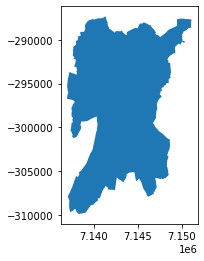

In [370]:
polygon2.plot()

In [354]:
sf2[sf2["NAME_1"] == 'Nairobi']['area'].sum()

712.7124295209521

In [356]:
sf2[sf2["NAME_1"] == 'Nairobi']['NAME_3'].values

array(['Gatina', 'Kileleshwa', 'Kilimani', 'Kabiro', 'Kawangware',
       'Mutu-Ini', 'Ngando', 'Riruta', 'Uthiru/Ruthimitu', 'Waithaka',
       'Kayole Central', 'Kayole North', 'Kayole South', 'Komarock',
       'Matopeni/Spring Valley', 'Embakasi', 'Lower Savannah', 'Mihango',
       'Upper Savannah', 'Utawala', 'Dandora Area I', 'Dandora Area Ii',
       'Dandora Area Iii', 'Dandora Area Iv', 'Kariobangi North',
       'Imara Daima', 'Kwa Njenga', 'Kwa Reuben', 'Kware', 'Pipeline',
       'Kariobangi South', 'Mowlem', 'Umoja I', 'Umoja Ii', 'Airbase',
       'California', 'Eastleigh North', 'Eastleigh South', 'Pumwani',
       'Clay City', 'Kasarani', 'Mwiki', 'Njiru', 'Ruai', 'Laini Saba',
       'Lindi', 'Makina', 'Nyayo Highrise', 'Sarangombe',
       'Woodley/Kenyatta Golf Course', 'Karen', 'Mugumu-Ini',
       'Nairobi West', 'South C', 'Harambee', 'Makongeni',
       'Maringo/Hamza', 'Viwandani', 'Hospital', 'Huruma', 'Kiamaiko',
       'Mabatini', 'Mlango Kubwa', 'Githurai',

In [391]:
ls = 'MULTIPOLYGON(((-1.751605 48.081862,-1.7513621 48.0817729,-1.7483977 48.0811307,-1.7453801 48.0810388,-1.7450416 48.0810746,-1.7440022 48.0810711,-1.7415481 48.0799292,-1.7402929 48.0806062,-1.7392815 48.0810141,-1.7380971 48.0815433,-1.7374459 48.0817599,-1.7369319 48.0819426,-1.7366002 48.0820945,-1.7363868 48.0822119,-1.736044 48.0823599,-1.7357482 48.0824729,-1.73518 48.0826842,-1.7349192 48.0827693,-1.7346149 48.0828509,-1.7343035 48.082929,-1.7340043 48.083012,-1.7335496 48.0831822,-1.7333836 48.0832346,-1.7331302 48.0833124,-1.7329302 48.0833767,-1.7325674 48.0834776,-1.731895 48.0836364,-1.731543 48.0837205,-1.7314082 48.0837505,-1.7313 48.0837764,-1.731091 48.0838319,-1.7312081 48.083889,-1.7311546 48.0839147,-1.73078 48.0840504,-1.7304404 48.0841377,-1.7302638 48.0841945,-1.7302817 48.0842406,-1.7301024 48.0842838,-1.7300935 48.0842739,-1.7299114 48.0843111,-1.7297078 48.0843964,-1.7296131 48.084317,-1.7291357 48.0845405,-1.7288054 48.0846634,-1.7286709 48.0847161,-1.7285273 48.0847722,-1.7282711 48.0848668,-1.728136 48.0849137,-1.7281575 48.0849451,-1.728193 48.0850003,-1.7282123 48.0850239,-1.7284293 48.0853104,-1.7287534 48.0856988,-1.7289886 48.0859598,-1.7289473 48.0859776,-1.7289071 48.0859945,-1.7285862 48.0861253,-1.7283937 48.0861993,-1.7281703 48.0862863,-1.7281458 48.0862973,-1.7278944 48.0864105,-1.7277804 48.0864618,-1.7277569 48.0864724,-1.7276661 48.0865133,-1.7276412 48.0865367,-1.7274965 48.0866726,-1.7274691 48.0866978,-1.727382 48.0867774,-1.727232 48.0869148,-1.7272253 48.0869209,-1.7272149 48.0869317,-1.7271133 48.0868523,-1.7269067 48.0867523,-1.7266453 48.0866839,-1.7265289 48.0866805,-1.7261759 48.08667,-1.7260422 48.0866334,-1.7258909 48.086587,-1.7257189 48.0865172,-1.7256658 48.0864744,-1.7256287 48.0864609,-1.7256149 48.0864785,-1.7256344 48.0864877,-1.7255906 48.086647,-1.7255511 48.086793,-1.7255291 48.0868694,-1.724755 48.087787,-1.7245132 48.0880254,-1.7243428 48.08816,-1.7237012 48.0885601,-1.7234368 48.0887617,-1.7234561 48.0887701,-1.7234455 48.0887748,-1.7234353 48.0887741,-1.7234118 48.0887641,-1.7234015 48.0887656,-1.7233917 48.0887767,-1.7233758 48.0887931,-1.723358 48.0888102,-1.7233244 48.0888328,-1.7232641 48.0888602,-1.7231901 48.0888932,-1.7231015 48.0889491,-1.7229725 48.0890291,-1.7228648 48.0890932,-1.7227668 48.0891581,-1.7226771 48.0892169,-1.722559 48.0893,-1.7224426 48.0893779,-1.7223044 48.0894697,-1.7221305 48.0895799,-1.721984 48.0896836,-1.7220124 48.0897326,-1.7218707 48.0898159,-1.7217774 48.0898706,-1.7215413 48.0900155,-1.7214618 48.0900653,-1.7214001 48.0901054,-1.7212743 48.0901814,-1.7212008 48.0902274,-1.7210875 48.090303,-1.7209822 48.0903738,-1.7208811 48.0904419,-1.7207913 48.0905009,-1.7207109 48.0905514,-1.7205945 48.0906233,-1.7204715 48.0907002,-1.7203742 48.0907585,-1.7202605 48.0908244,-1.7201402 48.0908952,-1.7200482 48.090948,-1.7199359 48.0910083,-1.7198285 48.0910655,-1.7197382 48.0911159,-1.7196664 48.0911528,-1.7195386 48.0912174,-1.7194204 48.0912763,-1.7193069 48.0913343,-1.7192789 48.0913475,-1.7192294 48.091369,-1.719167 48.0913945,-1.7191234 48.0914129,-1.718982 48.0914661,-1.7189095 48.0914883,-1.7188934 48.0914931,-1.7187703 48.091531,-1.7187037 48.0915515,-1.7186249 48.0915789,-1.7185737 48.0915983,-1.7185032 48.0916232,-1.7184413 48.0916482,-1.7183112 48.0916891,-1.718199 48.0917253,-1.7181061 48.0917573,-1.7178992 48.0918287,-1.7178003 48.0918624,-1.7177606 48.0918753,-1.717652 48.0919107,-1.7175055 48.091957,-1.717371 48.0919992,-1.7172465 48.092038,-1.7171253 48.0920762,-1.7170358 48.0921039,-1.716951 48.0921299,-1.7168596 48.0921596,-1.7167781 48.092185,-1.7167061 48.0922073,-1.7165913 48.0922439,-1.7164828 48.0922792,-1.7163618 48.0923188,-1.716248 48.0923547,-1.7161467 48.092388,-1.7160684 48.0924131,-1.7160018 48.0924355,-1.7158686 48.0924847,-1.7157475 48.0925281,-1.715622 48.0925724,-1.715443 48.0926375,-1.7153483 48.0926699,-1.7152717 48.0926968,-1.7152382 48.0927072,-1.7150939 48.0927652,-1.7150159 48.0927945,-1.7149758 48.0928152,-1.7149063 48.0928411,-1.7146976 48.0929179,-1.7146543 48.0929327,-1.7145565 48.0929662,-1.7143751 48.0930297,-1.7141142 48.0931207,-1.7140292 48.0931504,-1.7139775 48.0931683,-1.7139268 48.0931861,-1.7137457 48.0932493,-1.713685 48.0932704,-1.7132489 48.0934248,-1.7129748 48.0936192,-1.7126649 48.0938351,-1.7125042 48.0939505,-1.7124544 48.0939728,-1.7122689 48.0940538,-1.7119143 48.0942065,-1.7115746 48.0943549,-1.711338 48.094458,-1.7109544 48.0946247,-1.7108959 48.0946482,-1.7108787 48.0946556,-1.7105998 48.0947768,-1.7105727 48.0947886,-1.7101195 48.0948586,-1.7101093 48.0948601,-1.7098473 48.0949052,-1.7095151 48.0949617,-1.7092102 48.0950138,-1.70879 48.0950845,-1.7081664 48.0951884,-1.70795 48.0952263,-1.7076105 48.0952856,-1.7073596 48.0953275,-1.7072891 48.0953392,-1.7071284 48.0953659,-1.7069904 48.0953895,-1.7068683 48.0954104,-1.7062097 48.0955247,-1.7047637 48.0957754,-1.703317 48.0960261,-1.7023211 48.0962008,-1.7022301 48.0962167,-1.7017034 48.0962408,-1.701655 48.0962481,-1.701097 48.096331,-1.7008418 48.0963691,-1.6990198 48.096777,-1.6985239 48.0968873,-1.6984625 48.0970054,-1.6981713 48.0970432,-1.6978433 48.0970867,-1.6977413 48.0971018,-1.6977357 48.0970899,-1.6976987 48.0969787,-1.6975193 48.0969956,-1.6974051 48.0970054,-1.697381 48.0970076,-1.6972012 48.0970241,-1.6970319 48.0970398,-1.6968284 48.0970576,-1.6966414 48.0970717,-1.6964491 48.0970872,-1.6962838 48.0971003,-1.6962022 48.0971067,-1.6960549 48.0971215,-1.6958672 48.097143,-1.6956908 48.0971619,-1.6955703 48.0971741,-1.6953068 48.0972031,-1.6952006 48.0972133,-1.6950922 48.0972286,-1.6950549 48.0972338,-1.6949181 48.0972533,-1.6947682 48.0972745,-1.6946311 48.0972939,-1.6945631 48.0973039,-1.6944521 48.0973201,-1.6943163 48.0972961,-1.6942829 48.0972899,-1.69417 48.0972693,-1.6940866 48.097254,-1.6940541 48.0972482,-1.6940034 48.0972393,-1.6939721 48.097234,-1.6938852 48.0972194,-1.6938205 48.0972865,-1.6937559 48.0972757,-1.6935876 48.097247,-1.6935279 48.0972358,-1.6935006 48.0972278,-1.6934823 48.0972184,-1.6933714 48.097152,-1.6933433 48.0971337,-1.6932456 48.0970552,-1.6931438 48.0970104,-1.6931617 48.0969867,-1.6930045 48.0969368,-1.6928414 48.0968892,-1.692805 48.0968586,-1.6926997 48.096854,-1.6925361 48.0968458,-1.6923206 48.0968372,-1.6922652 48.0967565,-1.6921222 48.096804,-1.6920451 48.0967945,-1.6919743 48.0968158,-1.6919109 48.0968361,-1.6919037 48.0968267,-1.6918648 48.0968172,-1.6917939 48.09684,-1.6917869 48.0968306,-1.6917122 48.0968552,-1.6917076 48.0968506,-1.6917033 48.096845,-1.6916792 48.0968127,-1.6915888 48.0966862,-1.691435 48.0967329,-1.6914316 48.096734,-1.6912798 48.0967861,-1.6912682 48.0967898,-1.6910091 48.0967962,-1.6908654 48.096772,-1.6908307 48.0967665,-1.6908023 48.0967621,-1.6906072 48.0967316,-1.6905699 48.0967264,-1.6904765 48.0967158,-1.6903726 48.0967055,-1.6903125 48.0966997,-1.6902776 48.0966963,-1.6902558 48.0966941,-1.6902109 48.0966892,-1.6901192 48.0966832,-1.6900934 48.0966818,-1.6900193 48.0966773,-1.6899557 48.0966735,-1.6899264 48.0966717,-1.6898401 48.0966631,-1.6898214 48.0966612,-1.6897579 48.0966553,-1.6897502 48.0966513,-1.6897043 48.0966286,-1.6897252 48.096533,-1.6895887 48.0965198,-1.6894175 48.0964946,-1.6893265 48.0964781,-1.6894015 48.0963303,-1.6894524 48.0962476,-1.6895306 48.0961115,-1.6897673 48.0956334,-1.6898142 48.0955449,-1.689862 48.0954508,-1.6898764 48.0954188,-1.690041 48.0950838,-1.6901395 48.0948829,-1.6901707 48.0948207,-1.6902224 48.0947185,-1.6902799 48.094598,-1.6902895 48.0945778,-1.6903174 48.0945192,-1.6903735 48.0944017,-1.6904562 48.0942527,-1.6905346 48.0941014,-1.6907396 48.0937057,-1.6908495 48.0935134,-1.6910358 48.0931855,-1.6911959 48.0929121,-1.6913631 48.0926334,-1.691399 48.0925739,-1.6914292 48.0925229,-1.6914594 48.0924722,-1.6915103 48.0923868,-1.6916137 48.0922132,-1.6916865 48.0920901,-1.6917691 48.0919529,-1.6922159 48.0912037,-1.6922433 48.0911689,-1.6923623 48.0909601,-1.6925362 48.0906685,-1.6926327 48.0905048,-1.692648 48.0904789,-1.6926948 48.0903995,-1.6926954 48.0903651,-1.6926862 48.090324,-1.692683 48.0903096,-1.6926786 48.0902891,-1.6926655 48.0902149,-1.6926521 48.0901384,-1.6926393 48.0900709,-1.6926465 48.0900535,-1.6926357 48.0900501,-1.6926276 48.0899977,-1.6926266 48.0898548,-1.6926353 48.0897076,-1.6927039 48.0894636,-1.692695 48.0894585,-1.6928149 48.0892179,-1.6928769 48.0889637,-1.6929367 48.0887191,-1.6929307 48.0887151,-1.6929605 48.0885551,-1.6929556 48.0884424,-1.6930059 48.088189,-1.6930071 48.0881188,-1.6929448 48.0875729,-1.6929114 48.0872831,-1.6928905 48.0870757,-1.6928738 48.0868805,-1.6928825 48.0868569,-1.6929004 48.0868365,-1.6929346 48.0868123,-1.6929778 48.0867926,-1.6930199 48.0867826,-1.6932847 48.0867227,-1.6932683 48.0868154,-1.6934054 48.0867322,-1.6934855 48.0867957,-1.6935084 48.0867843,-1.6936174 48.0867763,-1.6937486 48.0867868,-1.6939559 48.0867565,-1.6939882 48.0867417,-1.6942636 48.0866787,-1.6943518 48.0864909,-1.6943636 48.0864312,-1.6949325 48.0864542,-1.6950119 48.0864588,-1.6950337 48.0864209,-1.6957956 48.0864657,-1.695818 48.0866864,-1.6960127 48.0868251,-1.6962365 48.0868675,-1.6965915 48.0869446,-1.696679 48.0868877,-1.6967847 48.0868666,-1.6971664 48.0868175,-1.6976655 48.0867513,-1.6978707 48.0867158,-1.6979908 48.086695,-1.6981145 48.0866745,-1.6981558 48.0866609,-1.6982002 48.0866346,-1.6982417 48.0865985,-1.6982971 48.0865664,-1.6990624 48.0861194,-1.6998593 48.0856518,-1.7000681 48.085597,-1.701003 48.0852065,-1.7024726 48.0845812,-1.7025415 48.0845032,-1.7028095 48.0842594,-1.7030443 48.0839954,-1.7032512 48.0837445,-1.7033115 48.08365,-1.7033675 48.083447,-1.7036841 48.0828504,-1.7037398 48.082712,-1.7037741 48.0825839,-1.7036602 48.0825031,-1.7035216 48.0824466,-1.7035702 48.082342,-1.7036238 48.0822448,-1.7037515 48.0820483,-1.7038062 48.0819661,-1.7038508 48.0819121,-1.704006 48.0817605,-1.7040095 48.0817491,-1.7039999 48.0817339,-1.7039641 48.0817155,-1.7039065 48.081707,-1.7038404 48.0817193,-1.7038183 48.0817264,-1.7037646 48.0817605,-1.703704 48.0817855,-1.7036011 48.0818186,-1.7035481 48.0818228,-1.7035085 48.0818215,-1.7034493 48.0818097,-1.7033258 48.0817382,-1.7032617 48.0816897,-1.7031463 48.081598,-1.7029802 48.0814762,-1.7029421 48.0814375,-1.7029114 48.0814027,-1.7028815 48.081378,-1.702862 48.0813677,-1.702845 48.0813609,-1.7028298 48.0813571,-1.7028119 48.0813547,-1.7027765 48.0813577,-1.7027421 48.0813657,-1.7026777 48.0813887,-1.7025963 48.0814271,-1.7025292 48.0814486,-1.7023629 48.0814889,-1.7021763 48.0815332,-1.7021025 48.0815399,-1.701921 48.0815799,-1.7018224 48.081611,-1.7017588 48.0816267,-1.7017042 48.0816346,-1.7016691 48.0816305,-1.7015454 48.0816001,-1.7014626 48.0815632,-1.7014016 48.0815157,-1.7013777 48.0814861,-1.7013675 48.0814528,-1.7013657 48.0813663,-1.7013767 48.08132,-1.7013794 48.0813015,-1.7013741 48.0812866,-1.7013539 48.0812666,-1.7013406 48.0812606,-1.7013199 48.081253,-1.7012868 48.081248,-1.7011378 48.0812502,-1.7010865 48.0812483,-1.7010354 48.0812457,-1.7009921 48.0812406,-1.7009521 48.0812263,-1.7009015 48.081199,-1.7008214 48.0811401,-1.7008002 48.0811287,-1.7007575 48.0811151,-1.7007211 48.0811107,-1.700631 48.0811068,-1.7004358 48.0810683,-1.7003644 48.0810482,-1.700211 48.0809968,-1.7001568 48.0809815,-1.700132 48.0809634,-1.7001131 48.0809396,-1.7001122 48.0809215,-1.7001159 48.0808957,-1.7001273 48.08086,-1.700138 48.080826,-1.7001406 48.0807917,-1.7001327 48.0807568,-1.7001176 48.0807384,-1.7000479 48.080721,-1.6999078 48.0807068,-1.699842 48.0806874,-1.6997173 48.0806418,-1.6996847 48.0806172,-1.6996662 48.0805945,-1.6995884 48.0805531,-1.6995698 48.080535,-1.6995301 48.0804761,-1.6995198 48.0804091,-1.6994994 48.0803508,-1.6994807 48.0803291,-1.6994365 48.0802911,-1.699327 48.0802166,-1.6992742 48.0801999,-1.6992319 48.0801909,-1.6991479 48.0801808,-1.6989911 48.0801513,-1.6988916 48.0801385,-1.6988052 48.0801338,-1.6986748 48.0801141,-1.6986276 48.080118,-1.6986088 48.0801284,-1.6985954 48.0801413,-1.6985116 48.0802605,-1.6984645 48.0803128,-1.6984213 48.0803358,-1.6983545 48.0803491,-1.6983023 48.0803573,-1.6982815 48.0803586,-1.6980199 48.0803417,-1.6978821 48.080362,-1.697739 48.0804014,-1.6976893 48.0804162,-1.6976075 48.0804301,-1.6975317 48.0804355,-1.6974499 48.0804373,-1.6972668 48.0804203,-1.6972107 48.0804236,-1.6971349 48.0804263,-1.6965641 48.0804763,-1.6946314 48.0806485,-1.6945808 48.0806591,-1.6945145 48.080664,-1.6944205 48.0806698,-1.6942356 48.0807014,-1.6942153 48.0806999,-1.6941233 48.0806835,-1.6940919 48.0806835,-1.694078 48.0806873,-1.6940675 48.0806933,-1.6940498 48.0807135,-1.694041 48.0807361,-1.6940342 48.0807594,-1.6940161 48.0808232,-1.6940041 48.0809,-1.6939937 48.080949,-1.6939704 48.081089,-1.6939635 48.0811847,-1.69396 48.0812808,-1.6939684 48.0813161,-1.6939737 48.0813538,-1.693967 48.0813632,-1.6939573 48.0813679,-1.693898 48.0813721,-1.6938721 48.0813715,-1.6938461 48.081368,-1.6938239 48.0813621,-1.693798 48.0813545,-1.6936427 48.081296,-1.6935004 48.0812952,-1.6933111 48.081297,-1.6932226 48.0813039,-1.693144 48.0813039,-1.6931023 48.0813024,-1.6929122 48.0812788,-1.6928582 48.0812768,-1.6926926 48.0812871,-1.6926191 48.0812797,-1.6925531 48.0812747,-1.692473 48.0812638,-1.6924187 48.0812515,-1.6921595 48.0811812,-1.6919909 48.0811385,-1.6917848 48.081153,-1.691629 48.0811679,-1.6915568 48.0811789,-1.6914951 48.0811978,-1.6914396 48.0812317,-1.6911997 48.081425,-1.6910631 48.0813942,-1.6909753 48.0813926,-1.6909381 48.0813783,-1.6908164 48.0813034,-1.6906888 48.0812223,-1.6903458 48.0810016,-1.6902618 48.0809437,-1.6901878 48.0808828,-1.6901499 48.080849,-1.689986 48.0806785,-1.6897643 48.0804602,-1.6896333 48.0804288,-1.6894881 48.0804056,-1.6893466 48.0804006,-1.6892711 48.0804096,-1.6890399 48.0804258,-1.6889843 48.0804279,-1.6888428 48.0804333,-1.6887049 48.0804369,-1.688625 48.0804291,-1.6883561 48.0803893,-1.6882498 48.0803821,-1.6882283 48.0803839,-1.6881972 48.080391,-1.6878953 48.0805195,-1.6878745 48.0805244,-1.6878525 48.080526,-1.6877581 48.0805235,-1.6877105 48.0805146,-1.6876789 48.0805063,-1.687643 48.0804946,-1.6876001 48.0804765,-1.6875571 48.0804552,-1.6875182 48.0804348,-1.6874801 48.0804274,-1.6872038 48.0804355,-1.6869718 48.0804548,-1.6867029 48.0804875,-1.6860624 48.0805302,-1.6860054 48.0805309,-1.6859528 48.0805247,-1.685876 48.0805014,-1.6858054 48.0804754,-1.6856415 48.0803831,-1.6855784 48.0803567,-1.6854475 48.0803086,-1.6853131 48.0802657,-1.6852387 48.0802453,-1.6851938 48.0802375,-1.6851483 48.0802325,-1.6850815 48.0802291,-1.6850247 48.0802287,-1.6849546 48.0802337,-1.684875 48.0802419,-1.6846219 48.0802719,-1.6845221 48.0802851,-1.6844857 48.0802887,-1.6844334 48.0802927,-1.6843392 48.0802932,-1.6842721 48.0802916,-1.6841909 48.0802876,-1.6841332 48.0802829,-1.6841158 48.0802834,-1.684088 48.0802945,-1.6840438 48.0803223,-1.6839963 48.0803559,-1.6839036 48.0804334,-1.6838645 48.0804777,-1.6838237 48.0805288,-1.6837564 48.0806137,-1.6837391 48.0806304,-1.6837039 48.0806557,-1.6836503 48.0806884,-1.6835947 48.0807186,-1.6835151 48.0807426,-1.6834337 48.080761,-1.6833684 48.080772,-1.6832181 48.0807945,-1.6831268 48.0808077,-1.6830755 48.0808157,-1.6830103 48.0808307,-1.6829708 48.0808375,-1.6829159 48.0808431,-1.6828563 48.0808471,-1.682808 48.0808484,-1.682734 48.0808464,-1.6826281 48.0808459,-1.6825517 48.0808456,-1.6825522 48.0808573,-1.6825273 48.0808582,-1.6825136 48.080861,-1.6824983 48.0808662,-1.6824861 48.0808718,-1.682473 48.080879,-1.6824593 48.0808882,-1.6824478 48.0808975,-1.6824035 48.0809466,-1.6823547 48.0810048,-1.6823166 48.0810464,-1.6823068 48.0810523,-1.6822969 48.0810562,-1.6822826 48.0810613,-1.6822561 48.0810694,-1.682224 48.0810766,-1.6821967 48.0810838,-1.6820539 48.0811042,-1.682013 48.0811113,-1.681989 48.0811163,-1.6819642 48.0811236,-1.6819389 48.0811326,-1.6819192 48.0811412,-1.6819024 48.0811511,-1.6818906 48.081161,-1.6818739 48.0811785,-1.6818636 48.0811929,-1.6818553 48.0812042,-1.6818178 48.0813083,-1.6817999 48.0813569,-1.6817926 48.081367,-1.6817837 48.0813772,-1.6817749 48.0813848,-1.6817629 48.081394,-1.6817478 48.0814031,-1.6817281 48.081414,-1.6816822 48.0814388,-1.6816467 48.0814582,-1.6816141 48.0814775,-1.6815949 48.0814892,-1.681578 48.0814997,-1.6815187 48.0815402,-1.6814896 48.0815662,-1.68147 48.0815841,-1.6813596 48.0817483,-1.6813249 48.0817855,-1.6811647 48.0819089,-1.6811388 48.0819258,-1.6811024 48.0819377,-1.6810761 48.0819426,-1.6810245 48.0819426,-1.6807515 48.0819359,-1.6806934 48.0819408,-1.680574 48.0819617,-1.6804394 48.0819924,-1.6801454 48.082073,-1.6801227 48.0819845,-1.6801026 48.0818965,-1.6800657 48.081823,-1.680028 48.0817632,-1.6799791 48.0816924,-1.6798788 48.0815549,-1.6798128 48.0814355,-1.6797925 48.0813992,-1.6797564 48.0813423,-1.6797222 48.0812971,-1.6796934 48.0812577,-1.6796364 48.0812021,-1.6795338 48.0811358,-1.6794795 48.0811063,-1.6793883 48.0810664,-1.6793315 48.0810444,-1.6792689 48.0810248,-1.679277 48.0809954,-1.6793519 48.0809094,-1.6793536 48.0808988,-1.6793383 48.0808563,-1.6792973 48.0807503,-1.679283 48.0806619,-1.679271 48.0805994,-1.6792448 48.0804533,-1.6791925 48.080255,-1.6791708 48.0800424,-1.6791606 48.0799811,-1.6790859 48.0795628,-1.6788693 48.0783276,-1.678678 48.0772041,-1.677812 48.0771509,-1.6769503 48.0773128,-1.6769241 48.077317,-1.6768975 48.0772994,-1.6766921 48.0773242,-1.6765327 48.0773492,-1.6764382 48.077363,-1.6754574 48.0774959,-1.6754653 48.0776152,-1.6752946 48.0776317,-1.6751778 48.077634,-1.6750949 48.0776357,-1.6750014 48.0776307,-1.6748666 48.0776147,-1.6748405 48.0776636,-1.6748025 48.077718,-1.6747568 48.0777658,-1.6746473 48.0778218,-1.6745966 48.0778422,-1.6745233 48.0778594,-1.6744801 48.0778622,-1.6744331 48.0778632,-1.6744193 48.077862,-1.6744035 48.0778574,-1.6743598 48.0778343,-1.6742258 48.0777519,-1.6741252 48.0776912,-1.6740463 48.0776455,-1.6739042 48.0775728,-1.6738642 48.0775555,-1.6738241 48.077538,-1.6737563 48.0775134,-1.6736815 48.0774883,-1.6734595 48.0774308,-1.6733279 48.0774077,-1.6732429 48.0773899,-1.6732164 48.0773858,-1.6731278 48.0773849,-1.6731051 48.0773247,-1.6715302 48.0771615,-1.6715617 48.0770638,-1.671436 48.0770478,-1.6713534 48.0770373,-1.6713474 48.0770365,-1.6713565 48.076919,-1.6712516 48.0769154,-1.6711369 48.0769195,-1.6707547 48.0769329,-1.6705845 48.0769401,-1.6702869 48.076957,-1.6699958 48.0769745,-1.669983 48.0769752,-1.6699394 48.0769776,-1.6695506 48.0769988,-1.6691169 48.0770237,-1.6687485 48.0770444,-1.6681958 48.077081,-1.6676812 48.077112,-1.6671714 48.0771383,-1.6666258 48.0771701,-1.6665392 48.0771747,-1.6664237 48.077186,-1.6661067 48.0772187,-1.6658528 48.077257,-1.6658182 48.0772621,-1.665244 48.0773712,-1.6649966 48.0774204,-1.6649 48.077444,-1.6648546 48.0774552,-1.6647139 48.0774826,-1.6647004 48.0774842,-1.6646077 48.0774951,-1.6645593 48.0775021,-1.6643688 48.0775384,-1.6640719 48.0775974,-1.6638674 48.0776395,-1.6634788 48.0777163,-1.6630893 48.0777939,-1.6628812 48.0778351,-1.6627202 48.0778668,-1.6626725 48.0778763,-1.6625944 48.0778913,-1.6622838 48.077951,-1.6618906 48.0780286,-1.6616164 48.078083,-1.6612633 48.0781531,-1.661162 48.0781718,-1.661341 48.0784552,-1.6615442 48.078734,-1.6616747 48.0789112,-1.661701 48.0789493,-1.661768 48.0790834,-1.661837 48.0792332,-1.6619045 48.0793815,-1.6619502 48.0795256,-1.6620065 48.0797208,-1.66206 48.079936,-1.6621156 48.0801347,-1.662173 48.0803485,-1.6622036 48.0804678,-1.6622509 48.080727,-1.6622809 48.0809776,-1.6623189 48.081169,-1.6623672 48.0812719,-1.6623908 48.0813443,-1.6624108 48.0813913,-1.6624342 48.0814476,-1.6624505 48.0814789,-1.6624563 48.0814926,-1.6624683 48.0815185,-1.6624931 48.0815629,-1.6625189 48.0816114,-1.6625392 48.081647,-1.6625578 48.0816833,-1.6625827 48.0817279,-1.6626013 48.0817632,-1.662619 48.0817963,-1.6626341 48.0818202,-1.6626453 48.081838,-1.6626674 48.081874,-1.662691 48.08191,-1.6627123 48.0819432,-1.6627315 48.0819724,-1.6627461 48.0820008,-1.662763 48.0820251,-1.6627786 48.0820482,-1.662803 48.0820823,-1.6628227 48.0821117,-1.6628491 48.0821509,-1.6629109 48.0822578,-1.6629402 48.0823112,-1.6629655 48.0823573,-1.6629771 48.0823845,-1.6629844 48.0824077,-1.6629874 48.0824198,-1.6629878 48.0824307,-1.6629868 48.0824464,-1.6629824 48.0824606,-1.6629765 48.0824741,-1.662962 48.0824952,-1.6629461 48.0825171,-1.6628814 48.0826077,-1.6628325 48.0826112,-1.662798 48.0826146,-1.6627758 48.0826174,-1.6627628 48.0826212,-1.6627563 48.0826242,-1.6627495 48.0826287,-1.6627407 48.0826353,-1.6627167 48.0826533,-1.662694 48.082672,-1.6626619 48.0826983,-1.6626324 48.0827228,-1.6626034 48.0827439,-1.662587 48.0827532,-1.6625641 48.082765,-1.6625426 48.0827741,-1.6625217 48.0827798,-1.6624974 48.0827846,-1.6624672 48.0827876,-1.6624255 48.0827902,-1.6623637 48.0827914,-1.6622844 48.0827947,-1.6621891 48.0827992,-1.6620069 48.0828112,-1.6619494 48.0828166,-1.6619167 48.0828197,-1.6618814 48.0828251,-1.6618498 48.0828322,-1.6618135 48.0828408,-1.6617637 48.0828515,-1.6617176 48.0828619,-1.6616698 48.0828682,-1.6616178 48.0828739,-1.6615673 48.0828791,-1.6614917 48.082886,-1.6614466 48.08289,-1.6614198 48.0828911,-1.6614006 48.0828911,-1.661385 48.0828899,-1.6613718 48.0828876,-1.6613578 48.0828843,-1.6613457 48.0828786,-1.661335 48.0828705,-1.6612977 48.0828444,-1.661249 48.0828074,-1.6611504 48.0827337,-1.6610924 48.0826949,-1.6610607 48.0826716,-1.6610287 48.0826479,-1.6609863 48.0827497,-1.6609786 48.0826034,-1.6609525 48.0825837,-1.6609122 48.0825564,-1.6608988 48.0825497,-1.6608773 48.0825406,-1.6608678 48.0825362,-1.6608522 48.082529,-1.6607799 48.0825386,-1.6607314 48.0825447,-1.6606793 48.0825507,-1.6606394 48.0825554,-1.6606232 48.0825561,-1.6606146 48.082554,-1.6605895 48.082531,-1.6605757 48.0825195,-1.6605633 48.0825162,-1.6605479 48.0825135,-1.6605248 48.082513,-1.6605107 48.0825164,-1.660495 48.082521,-1.6604798 48.0825278,-1.6604614 48.0825359,-1.6604473 48.0825437,-1.6604346 48.082556,-1.6604185 48.082569,-1.6604047 48.0825822,-1.6603937 48.082597,-1.6603823 48.0826136,-1.6603706 48.0826323,-1.6603638 48.0826468,-1.6603591 48.0826602,-1.6603581 48.0826716,-1.6603588 48.0826889,-1.6603638 48.0827173,-1.6603742 48.082767,-1.6603756 48.0827767,-1.6603725 48.0827854,-1.6603658 48.082791,-1.6603548 48.0827986,-1.6603351 48.0828036,-1.6602954 48.0828119,-1.6602274 48.0828249,-1.6601767 48.0828337,-1.6601405 48.082839,-1.6600832 48.0828468,-1.660045 48.0828536,-1.6599927 48.0828641,-1.6599011 48.0828806,-1.6597898 48.0829026,-1.6596822 48.0829232,-1.6596386 48.0829309,-1.6596168 48.0829349,-1.6596048 48.0829345,-1.6595867 48.0829313,-1.6595709 48.0829272,-1.6595588 48.0829201,-1.6595464 48.0829092,-1.6595303 48.0828901,-1.6595219 48.0828724,-1.6595139 48.08285,-1.6595112 48.0828315,-1.6595126 48.0828174,-1.6595176 48.0828004,-1.659525 48.0827778,-1.6595303 48.0827607,-1.6595313 48.0827386,-1.6595313 48.0827258,-1.6595201 48.0826726,-1.6595126 48.082662,-1.6595017 48.082649,-1.6594872 48.0826375,-1.6594713 48.0826286,-1.6594525 48.0826231,-1.6594351 48.0826191,-1.6594157 48.0826189,-1.659392 48.0826186,-1.6593525 48.0826204,-1.6592623 48.0826279,-1.6592199 48.0826311,-1.6592037 48.0826336,-1.6591563 48.0826402,-1.6591058 48.082649,-1.6590783 48.082652,-1.659021 48.0826572,-1.6589992 48.0826578,-1.6589852 48.0826571,-1.658963 48.0826545,-1.6589322 48.0826516,-1.6589066 48.0826468,-1.6588466 48.0826336,-1.6587939 48.0826198,-1.658744 48.0826065,-1.6587266 48.0826014,-1.6587002 48.0825916,-1.658672 48.0825807,-1.6586428 48.0825685,-1.6586096 48.0825544,-1.6585696 48.0825323,-1.6585325 48.0825116,-1.6585035 48.0824943,-1.6584738 48.0824757,-1.658454 48.082464,-1.6584329 48.0824558,-1.658416 48.0824501,-1.658386 48.0824447,-1.6583538 48.0824392,-1.6583214 48.0824364,-1.6582895 48.0824344,-1.6582654 48.0824341,-1.6582404 48.0824343,-1.6581924 48.0824379,-1.6581121 48.0824432,-1.6580879 48.0824445,-1.6580753 48.0824427,-1.658064 48.0824385,-1.6580567 48.0824285,-1.6580468 48.0824109,-1.6580355 48.0823868,-1.6580216 48.0823487,-1.658013 48.0823242,-1.6580105 48.0823065,-1.6580078 48.0822621,-1.6580051 48.0822399,-1.658001 48.0822275,-1.6579963 48.0822203,-1.6579789 48.0822059,-1.6579488 48.0821816,-1.6579357 48.0821704,-1.6579299 48.0821627,-1.6579276 48.0821529,-1.6579306 48.0821464,-1.6579411 48.0821426,-1.6579513 48.0821393,-1.6579911 48.0821359,-1.6580686 48.0821281,-1.6580944 48.0821232,-1.6581088 48.0821196,-1.6581238 48.0821032,-1.6581241 48.0820884,-1.6581201 48.0820583,-1.6581191 48.0820282,-1.6581197 48.0820021,-1.6581215 48.0819728,-1.6581233 48.0819473,-1.6581213 48.0819334,-1.658113 48.081925,-1.658096 48.0819101,-1.6579948 48.0818454,-1.6579767 48.0818313,-1.6579675 48.0818192,-1.6579612 48.0818037,-1.6579487 48.0817569,-1.6579248 48.0816866,-1.6579176 48.0816583,-1.6579161 48.0816409,-1.6579199 48.0816308,-1.6579255 48.0816173,-1.657935 48.0816005,-1.6579426 48.0815839,-1.6579811 48.0815358,-1.6580443 48.0814737,-1.6580927 48.08142,-1.6581378 48.0813676,-1.6581657 48.0813354,-1.6581762 48.0813171,-1.6581744 48.0813054,-1.6581567 48.0812743,-1.658134 48.0812411,-1.6581176 48.0812248,-1.6580971 48.0812117,-1.6580752 48.0811943,-1.6580617 48.0811855,-1.6580395 48.0811787,-1.6580147 48.0811722,-1.6579836 48.081165,-1.6579574 48.0811598,-1.6579246 48.081155,-1.6576922 48.0811082,-1.6558766 48.0814045,-1.6558751 48.0815335,-1.655625 48.0815746,-1.6555043 48.0816051,-1.6554358 48.0816248,-1.6553914 48.0816416,-1.6553796 48.0816495,-1.6553575 48.0816623,-1.6553304 48.0816764,-1.6553093 48.0816857,-1.6552813 48.0816969,-1.6552152 48.0817194,-1.6551909 48.0817262,-1.6551706 48.0817311,-1.6551559 48.081733,-1.6551352 48.0817345,-1.6551069 48.0817346,-1.6550503 48.0817358,-1.6549712 48.0817373,-1.6548992 48.0817359,-1.6548425 48.0817335,-1.6548177 48.0817315,-1.6547732 48.0817255,-1.654728 48.0817193,-1.6547016 48.0817197,-1.654665 48.0817209,-1.654636 48.0817239,-1.6545998 48.0817282,-1.6545384 48.0817371,-1.6544168 48.0817538,-1.6542916 48.0817708,-1.6542283 48.0817797,-1.6541899 48.0817854,-1.6541626 48.0817872,-1.6541377 48.0817886,-1.6540991 48.0817889,-1.6540538 48.0817898,-1.6540087 48.0817924,-1.6539025 48.0817984,-1.6538354 48.0818017,-1.653774 48.0818068,-1.6537451 48.0818102,-1.6537268 48.0818155,-1.6537106 48.081823,-1.6536685 48.0818432,-1.6536268 48.0818636,-1.6536093 48.0818694,-1.6535889 48.0818742,-1.6535681 48.0818751,-1.6535346 48.0818764,-1.6534939 48.0818753,-1.6534585 48.0818734,-1.653413 48.0818713,-1.65338 48.0818677,-1.6533172 48.0818068,-1.653263 48.0817487,-1.6532151 48.0817306,-1.6531908 48.0817215,-1.6531711 48.081714,-1.6531408 48.0817087,-1.6531015 48.0817055,-1.6530179 48.0816989,-1.6529421 48.081692,-1.6529072 48.0816907,-1.652885 48.0816862,-1.6528719 48.081678,-1.6528595 48.0816594,-1.6528449 48.0816424,-1.6528385 48.0816194,-1.6528352 48.0815995,-1.6528251 48.0815651,-1.6528173 48.081514,-1.6527963 48.0814222,-1.6527962 48.0814135,-1.6528007 48.0814072,-1.652826 48.0813984,-1.652844 48.0813939,-1.6528593 48.0813789,-1.6528681 48.0813603,-1.6528731 48.0813229,-1.6529032 48.0812431,-1.6529133 48.0811906,-1.6529265 48.0810861,-1.6529356 48.0810567,-1.6529483 48.0810264,-1.652994 48.0809349,-1.653 48.0809224,-1.6530001 48.0809095,-1.6529982 48.0808966,-1.6529981 48.0808763,-1.6530043 48.0808605,-1.6530137 48.0808464,-1.6530314 48.0808357,-1.6530475 48.0808262,-1.6530698 48.0808197,-1.6530848 48.0808094,-1.6531005 48.0807922,-1.6531087 48.0807798,-1.6531044 48.0807716,-1.6530856 48.0807502,-1.6530635 48.0807344,-1.6530339 48.0807203,-1.6529953 48.0807042,-1.6529297 48.0806783,-1.6529007 48.0806638,-1.6528592 48.0806413,-1.6528231 48.0806189,-1.6527654 48.0805829,-1.652744 48.0805686,-1.6527267 48.0805609,-1.6527147 48.0805567,-1.6526989 48.0805508,-1.6526849 48.0805426,-1.6526762 48.0805333,-1.6526705 48.080522,-1.6526729 48.0805045,-1.6526696 48.0804933,-1.6526618 48.0804861,-1.6525733 48.0805454,-1.6524989 48.0806025,-1.6524229 48.0806627,-1.6523575 48.0807107,-1.652281 48.0807695,-1.6522154 48.0808274,-1.6521714 48.0808738,-1.6521246 48.0809291,-1.6520704 48.0809999,-1.6520563 48.0810019,-1.6519618 48.0809783,-1.6519053 48.0809591,-1.6518768 48.0809454,-1.651878 48.0809315,-1.6518822 48.0809101,-1.6518874 48.080884,-1.6518792 48.0808331,-1.6518773 48.0807356,-1.6518546 48.0807047,-1.6518102 48.0806556,-1.6517597 48.0806144,-1.6517101 48.0805948,-1.6516665 48.0805855,-1.6516292 48.0805808,-1.6515948 48.0805824,-1.6515222 48.0805786,-1.6514052 48.0805635,-1.651305 48.0805498,-1.6512792 48.0805309,-1.6512553 48.0805096,-1.6511829 48.0803824,-1.6511029 48.0802066,-1.6510632 48.0800805,-1.6510489 48.0799597,-1.6510594 48.0799034,-1.6508686 48.0798924,-1.6507934 48.0798921,-1.6507021 48.0798859,-1.6506023 48.0798784,-1.6505297 48.0798763,-1.650438 48.0798818,-1.6503712 48.0798832,-1.6503272 48.0798784,-1.6501771 48.07986,-1.650112 48.0798577,-1.6500121 48.0798591,-1.6499149 48.0798618,-1.649831 48.0798726,-1.6497669 48.0798863,-1.6497416 48.0798953,-1.6497168 48.0799039,-1.6496901 48.0799084,-1.6496588 48.0799133,-1.6495674 48.0799187,-1.649438 48.0799308,-1.6491851 48.0799751,-1.6489823 48.0800174,-1.6489198 48.0800185,-1.6488189 48.0800195,-1.6487502 48.0800122,-1.6486954 48.0800005,-1.6486367 48.079986,-1.6484834 48.0799389,-1.6483687 48.0799201,-1.6482472 48.0799059,-1.6481646 48.0799058,-1.648074 48.0799167,-1.6478498 48.0799578,-1.6477307 48.0799757,-1.6476918 48.0799728,-1.6474464 48.0799106,-1.6473658 48.0798395,-1.6473008 48.0797909,-1.6472686 48.0797768,-1.6472428 48.0797795,-1.6471517 48.0797953,-1.6470978 48.0798033,-1.6469465 48.0798226,-1.646877 48.0798672,-1.6466032 48.079961,-1.6465446 48.0799648,-1.646429 48.079968,-1.6462995 48.0799692,-1.6462439 48.0799728,-1.6462289 48.0799823,-1.6462035 48.0800317,-1.646194 48.0800387,-1.6461816 48.0800393,-1.6461452 48.0800358,-1.646022 48.0800151,-1.6458956 48.0799878,-1.6457626 48.0799518,-1.645742 48.0799469,-1.6455711 48.0799526,-1.6454257 48.0799611,-1.6453757 48.0799723,-1.6451765 48.0800565,-1.645062 48.0801154,-1.6449962 48.0801393,-1.6448572 48.0801856,-1.6446807 48.08025,-1.6445324 48.0803234,-1.6443489 48.0804723,-1.6442871 48.0805233,-1.6442865 48.0805487,-1.644306 48.080576,-1.6443482 48.0805971,-1.6445514 48.08068,-1.6445916 48.0807055,-1.6445957 48.0807234,-1.6445799 48.0807448,-1.6445434 48.0807897,-1.6444763 48.0808422,-1.6443831 48.0809026,-1.6443201 48.0809371,-1.6441397 48.0810178,-1.6439667 48.0811123,-1.6439285 48.0811427,-1.6439117 48.0811678,-1.6438899 48.0811952,-1.6438574 48.081248,-1.6438078 48.0813058,-1.6437856 48.0813282,-1.6437058 48.0814362,-1.643622 48.0815504,-1.643612 48.0815715,-1.6435918 48.08158,-1.6435476 48.0815876,-1.6434074 48.0815966,-1.6433082 48.0816086,-1.6432654 48.0816141,-1.6430433 48.0816678,-1.6429132 48.0816942,-1.6427912 48.0817094,-1.6427208 48.0817072,-1.6426933 48.0816982,-1.6426316 48.0816741,-1.6425319 48.081626,-1.6423915 48.0815715,-1.6423445 48.0815676,-1.6420569 48.0815822,-1.6418725 48.0815968,-1.6416311 48.0816357,-1.6416003 48.0816344,-1.6414528 48.0816037,-1.6409355 48.081536,-1.640915 48.081547,-1.6408588 48.0816005,-1.6408588 48.0816185,-1.6408718 48.0817049,-1.6408734 48.0817292,-1.6408687 48.0817963,-1.6409524 48.0818832,-1.6410409 48.0819636,-1.6410568 48.0819901,-1.6410993 48.0820456,-1.6411957 48.0821008,-1.6412299 48.0821227,-1.6412493 48.0821943,-1.6412419 48.0822285,-1.6412193 48.0822527,-1.6411854 48.0822781,-1.6411276 48.0823016,-1.6410822 48.0823123,-1.6407287 48.0823615,-1.6405642 48.0823873,-1.6405317 48.0824062,-1.6405219 48.0824165,-1.6404963 48.0824435,-1.6404835 48.0824579,-1.6404567 48.0824874,-1.6404116 48.0825374,-1.6403529 48.0826068,-1.6403089 48.0826606,-1.6402759 48.0826992,-1.6402472 48.0827159,-1.6402105 48.0827279,-1.6401348 48.0827459,-1.6400571 48.0827543,-1.6399512 48.0827596,-1.6398433 48.0827649,-1.6397497 48.0827676,-1.6396178 48.0827724,-1.6395511 48.082775,-1.6394894 48.0827697,-1.639416 48.0827618,-1.6393173 48.0827455,-1.6392388 48.0827292,-1.6391906 48.0827254,-1.6391392 48.0827313,-1.6390591 48.0827531,-1.6389861 48.0827746,-1.6389195 48.0827932,-1.6388241 48.0828131,-1.6387411 48.0828299,-1.6386922 48.0828344,-1.6386163 48.0828314,-1.6385431 48.0828249,-1.6384637 48.0828197,-1.6383931 48.0828023,-1.638347 48.0827997,-1.6382689 48.0828046,-1.6382088 48.0828151,-1.6381746 48.0828301,-1.638157 48.0828515,-1.6381313 48.0828924,-1.6380553 48.0830704,-1.6380332 48.0831223,-1.6380066 48.0831855,-1.6379587 48.083317,-1.6379314 48.0834316,-1.6379242 48.0834803,-1.6379264 48.0834883,-1.6379328 48.0835121,-1.6379596 48.0835442,-1.6380459 48.0836365,-1.6381097 48.0836996,-1.6381432 48.0837494,-1.6381541 48.0837776,-1.6381473 48.0837964,-1.6381309 48.0838213,-1.6380502 48.0838842,-1.638018 48.0839133,-1.6380022 48.0839417,-1.6379798 48.0840258,-1.6379574 48.0841279,-1.6379344 48.0842115,-1.6379303 48.0842258,-1.6379205 48.0843201,-1.6379129 48.0843451,-1.6378945 48.0843615,-1.6378693 48.0843751,-1.6378248 48.0843764,-1.6373947 48.084353,-1.6373211 48.0843361,-1.6372426 48.0843145,-1.6372051 48.0843236,-1.6371569 48.0843518,-1.6371123 48.084375,-1.6370737 48.0843827,-1.6369751 48.0844033,-1.6369519 48.0844055,-1.6369329 48.0844001,-1.6368793 48.084376,-1.6368176 48.0843455,-1.6367641 48.0843162,-1.6367431 48.0842962,-1.6367368 48.0842726,-1.6367113 48.0842479,-1.6366779 48.084229,-1.636617 48.0842199,-1.636554 48.0842141,-1.6364898 48.0842178,-1.6364269 48.0842308,-1.6363608 48.0842308,-1.6363079 48.0842114,-1.6362597 48.0841789,-1.6362247 48.0841474,-1.6360528 48.0840787,-1.6359864 48.0840463,-1.6359353 48.0840207,-1.6358756 48.0840072,-1.6358715 48.0840228,-1.6358474 48.0840662,-1.6358285 48.0840951,-1.6358051 48.0841247,-1.6357642 48.0841664,-1.6357103 48.0841719,-1.6356642 48.0841767,-1.6356188 48.0841781,-1.6355849 48.0841748,-1.6355288 48.0841654,-1.6354959 48.0841602,-1.6354663 48.0841529,-1.6354424 48.0841453,-1.6354241 48.0841422,-1.6353825 48.084138,-1.6353504 48.0841377,-1.6353228 48.0841419,-1.635282 48.0841548,-1.6352598 48.0841642,-1.6352586 48.0843754,-1.6352344 48.0846846,-1.635205 48.0850569,-1.6352181 48.085066,-1.6352197 48.0852246,-1.635227 48.0853926,-1.635241 48.0854923,-1.6352688 48.0855845,-1.6350463 48.0856806,-1.6349567 48.0857438,-1.6350388 48.085814,-1.635128 48.0859605,-1.6352377 48.0861571,-1.6353081 48.0862871,-1.6353779 48.086423,-1.6353118 48.0864412,-1.6351709 48.0864836,-1.6351763 48.0864957,-1.6347975 48.0866132,-1.6347205 48.0866367,-1.6346162 48.0866685,-1.6344867 48.0867329,-1.6340675 48.0869473,-1.6339596 48.0869966,-1.6338611 48.0870381,-1.6337082 48.0870836,-1.6335843 48.0871088,-1.6332013 48.0871671,-1.6331029 48.0871724,-1.6329781 48.0871795,-1.6327799 48.0872008,-1.6325192 48.087155,-1.6319826 48.0870527,-1.6318905 48.0870103,-1.6318081 48.0869991,-1.6315967 48.0869702,-1.6312878 48.0869272,-1.6311618 48.0869347,-1.6310353 48.0869557,-1.6308397 48.0870135,-1.6307131 48.0870551,-1.6306345 48.0870811,-1.6304677 48.0871709,-1.630245 48.0873199,-1.630089 48.0873771,-1.6299379 48.0874383,-1.6297309 48.087548,-1.6295328 48.0876801,-1.6294518 48.0877488,-1.6293278 48.0878731,-1.6293091 48.0878917,-1.629295 48.087906,-1.6292195 48.0879528,-1.6290936 48.088021,-1.6290046 48.0880693,-1.6289888 48.0881172,-1.628929 48.0881301,-1.6288714 48.0881389,-1.6287652 48.0881608,-1.6287197 48.0881699,-1.6285539 48.0882282,-1.6284788 48.0882588,-1.6284247 48.0882889,-1.6284038 48.088304,-1.6283695 48.0883397,-1.6283334 48.0884026,-1.6283063 48.0884605,-1.6283213 48.0885083,-1.6283709 48.0886237,-1.6283716 48.0886396,-1.6283657 48.0886563,-1.6283388 48.0887684,-1.6283212 48.0888223,-1.6282997 48.0888602,-1.628226 48.0889235,-1.6281464 48.0889836,-1.6280932 48.0890179,-1.6279896 48.0890806,-1.6279596 48.0890925,-1.6278199 48.0891755,-1.627779 48.0892011,-1.6277147 48.0892808,-1.6274701 48.0892376,-1.6274414 48.0892322,-1.6272625 48.0891995,-1.627198 48.0892896,-1.6271707 48.0894072,-1.6271579 48.0894775,-1.6273883 48.0895191,-1.6274899 48.0895377,-1.6274766 48.089684,-1.6274164 48.0898742,-1.6272962 48.0902324,-1.6272709 48.0903113,-1.6272875 48.0903213,-1.6269725 48.0911399,-1.6267651 48.091498,-1.6267524 48.0915198,-1.6268427 48.0920264,-1.6269516 48.0926333,-1.6269221 48.0927286,-1.6268908 48.0928307,-1.6267617 48.0932552,-1.6267501 48.0932982,-1.6267148 48.0934101,-1.6265302 48.09402,-1.6265254 48.0940355,-1.6265182 48.0940582,-1.6265089 48.0940872,-1.6265032 48.0941058,-1.6264825 48.0941703,-1.6264693 48.0942121,-1.6264367 48.0943164,-1.6263241 48.0946781,-1.6263403 48.0946816,-1.6263811 48.094691,-1.6263984 48.0946986,-1.6264032 48.0947052,-1.6263908 48.0947515,-1.6263874 48.0947629,-1.6263805 48.094786,-1.6263489 48.0948045,-1.6263096 48.0948307,-1.6262946 48.0948398,-1.6262625 48.0948596,-1.6261739 48.0949118,-1.6261101 48.0949494,-1.6259845 48.0950112,-1.6259575 48.0950026,-1.6260508 48.0951414,-1.6260566 48.0951676,-1.6260619 48.0951919,-1.6260608 48.0952139,-1.6260597 48.0952196,-1.6260536 48.0952513,-1.6260562 48.0952921,-1.6260573 48.0953158,-1.626059 48.0953514,-1.6260576 48.0954304,-1.6260611 48.095466,-1.6260643 48.0954989,-1.6260707 48.0955625,-1.6260725 48.0955815,-1.6260859 48.0957079,-1.62609 48.0957423,-1.6260946 48.0957767,-1.6261006 48.0958269,-1.6261035 48.0958477,-1.6261153 48.0959385,-1.6261236 48.0960384,-1.62613 48.0961598,-1.6261284 48.0962722,-1.6261342 48.0963489,-1.6261355 48.0964536,-1.6260922 48.0964444,-1.6260087 48.0969308,-1.6259686 48.0971692,-1.6259558 48.0972544,-1.6259445 48.0973391,-1.6259633 48.0973448,-1.6259353 48.0974744,-1.6259335 48.0975048,-1.6259325 48.0975166,-1.6259297 48.0975467,-1.6259246 48.0976294,-1.6259117 48.0978134,-1.6258992 48.0978933,-1.625896 48.0979149,-1.6258848 48.097936,-1.6258812 48.0979432,-1.625847 48.0980013,-1.6258127 48.0980598,-1.6257545 48.0981547,-1.6257203 48.0982106,-1.6256719 48.0982932,-1.6256145 48.0983924,-1.6255487 48.0984942,-1.6254895 48.0985851,-1.6254299 48.0986766,-1.625409 48.0987656,-1.6253934 48.0988272,-1.6253735 48.0989041,-1.6253583 48.0989594,-1.6253471 48.0989863,-1.6253384 48.0990074,-1.6252253 48.0992785,-1.6252126 48.0993069,-1.6250553 48.0992875,-1.624994 48.0992713,-1.6248706 48.0994835,-1.6247703 48.0996404,-1.6247537 48.0996664,-1.624743 48.0996856,-1.6247202 48.0997265,-1.62471 48.0997449,-1.624636 48.0998736,-1.6246247 48.0998928,-1.6246188 48.0999002,-1.6247623 48.099955,-1.6249322 48.0999731,-1.6249445 48.0999746,-1.6249741 48.0999872,-1.6249904 48.0999991,-1.6250391 48.1000183,-1.6251889 48.1000613,-1.6252711 48.1001144,-1.6254027 48.100197,-1.6254646 48.1002261,-1.625482 48.1002352,-1.6255782 48.1002854,-1.625736 48.1003216,-1.6258977 48.1003656,-1.625977 48.1003842,-1.6261528 48.1004246,-1.626415 48.1004891,-1.6265182 48.1005085,-1.6266181 48.1005274,-1.6267224 48.1005478,-1.626926 48.1005875,-1.627107 48.1006284,-1.6271194 48.1006311,-1.6271825 48.1006456,-1.6272531 48.1006877,-1.6273483 48.1007447,-1.6274596 48.1008032,-1.6275263 48.1008486,-1.6276266 48.1009314,-1.6276619 48.1010116,-1.6276668 48.1010536,-1.6276987 48.1010692,-1.6277372 48.1010801,-1.6278016 48.1010979,-1.6279686 48.1011495,-1.6281255 48.1012005,-1.6282119 48.1012331,-1.6283048 48.1012685,-1.6283608 48.1012898,-1.628407 48.1013074,-1.6285644 48.101351,-1.6286319 48.1013708,-1.6287098 48.1013754,-1.6288305 48.1013827,-1.6289854 48.1013888,-1.6291214 48.1013772,-1.6291924 48.1013813,-1.6293315 48.1014034,-1.6293367 48.1013946,-1.6296807 48.1015689,-1.6297245 48.1015916,-1.6297594 48.1016237,-1.629844 48.1017024,-1.62987 48.1016738,-1.6299203 48.1016147,-1.6299602 48.1015663,-1.6300452 48.1014671,-1.6301148 48.1014804,-1.6301422 48.1014856,-1.6301573 48.1014885,-1.6301952 48.1015006,-1.6302821 48.1015304,-1.630411 48.1015712,-1.6306303 48.1016451,-1.6306865 48.1016826,-1.6307036 48.1016933,-1.6308181 48.101759,-1.6310378 48.1018923,-1.6310926 48.1019186,-1.6311648 48.1019527,-1.6312711 48.1019963,-1.6313115 48.1020145,-1.6313424 48.1020316,-1.6314027 48.1020693,-1.631458 48.1021083,-1.6314517 48.1021126,-1.63162 48.1022327,-1.631728 48.1023268,-1.6318337 48.1024134,-1.631896 48.1024499,-1.6319481 48.1024832,-1.6320512 48.1025575,-1.6322642 48.1024226,-1.6322903 48.1024611,-1.6323024 48.1024715,-1.6323446 48.1024971,-1.6324397 48.1025553,-1.6324994 48.1026011,-1.6326213 48.1026868,-1.6326539 48.1027083,-1.6327077 48.1027264,-1.6327631 48.1027707,-1.6327798 48.1028059,-1.6327725 48.102831,-1.6327674 48.102858,-1.6327946 48.1029022,-1.6327989 48.102915,-1.6328256 48.1030591,-1.6328516 48.1031428,-1.6328484 48.1031503,-1.6328721 48.1032301,-1.6328932 48.10327,-1.6329513 48.1033751,-1.6329735 48.1034288,-1.6329817 48.1034291,-1.6330034 48.1034998,-1.6330055 48.1035066,-1.6330299 48.1035603,-1.6330523 48.1036023,-1.6330748 48.1036364,-1.6330955 48.1036622,-1.6331476 48.1036928,-1.6332081 48.1037354,-1.633207 48.1037506,-1.6332058 48.1037682,-1.6332739 48.1038158,-1.6333273 48.1038189,-1.6333303 48.1038225,-1.6333563 48.103864,-1.6333866 48.1039121,-1.6338712 48.1046836,-1.6339866 48.1048674,-1.6340566 48.1049788,-1.6343213 48.1053944,-1.6343819 48.1054898,-1.6346549 48.105451,-1.6346612 48.1054734,-1.634666 48.1054907,-1.634681 48.1055431,-1.6347025 48.1056202,-1.6347058 48.1056315,-1.6347465 48.1057753,-1.6348018 48.1059714,-1.6348077 48.1059926,-1.6348942 48.1062989,-1.6348991 48.1063163,-1.6349244 48.1064064,-1.6344648 48.1064728,-1.6340093 48.1066171,-1.633927 48.1078522,-1.6339353 48.1079591,-1.6339038 48.10844,-1.633833 48.1084527,-1.6340051 48.1090178,-1.6339919 48.109638,-1.6339614 48.1098034,-1.6338581 48.1100432,-1.6335767 48.1104142,-1.63346 48.1104826,-1.6333382 48.1106181,-1.6337662 48.110878,-1.6350286 48.1118024,-1.6351167 48.1118957,-1.6351223 48.1119063,-1.6355279 48.1126636,-1.6358859 48.1131024,-1.6361971 48.1133267,-1.6362315 48.113609,-1.636279 48.1136931,-1.6363063 48.1139734,-1.6342353 48.1140035,-1.6341607 48.1141396,-1.6339949 48.1144382,-1.6335085 48.1152897,-1.633335 48.1156078,-1.6329018 48.116292,-1.6326185 48.1168332,-1.6320706 48.11775,-1.6320186 48.117851,-1.6319212 48.1180953,-1.6317364 48.1185165,-1.6316143 48.1188693,-1.6315522 48.1191989,-1.631471 48.1200566,-1.6314868 48.12022,-1.6315505 48.1207287,-1.6315322 48.1207739,-1.631527 48.1207863,-1.6315207 48.1207986,-1.6315108 48.1208097,-1.6314976 48.1208194,-1.631469 48.1208339,-1.6314405 48.1208473,-1.6312374 48.1209341,-1.6310687 48.1210033,-1.6310068 48.1210276,-1.630873 48.1210763,-1.630796 48.1211043,-1.630735 48.1211253,-1.6305621 48.1211839,-1.6304728 48.1212144,-1.6301615 48.1213147,-1.6301084 48.1213303,-1.6299874 48.1213684,-1.6298789 48.1214064,-1.629779 48.1214421,-1.629641 48.1214957,-1.6295606 48.1215281,-1.6294809 48.1215628,-1.6294751 48.1215684,-1.6293929 48.1216159,-1.6293188 48.1216692,-1.6292665 48.1217063,-1.6292168 48.12174,-1.6291847 48.1217605,-1.6291294 48.1217896,-1.6290452 48.1218344,-1.6289364 48.1218893,-1.6288441 48.1219342,-1.628772 48.1219692,-1.6287623 48.1219741,-1.6287274 48.1219952,-1.6287083 48.1220064,-1.6286352 48.122052,-1.6285936 48.1220771,-1.6285594 48.1221035,-1.6285219 48.1221319,-1.6285163 48.1221365,-1.6285072 48.1221432,-1.6284276 48.1222054,-1.6284065 48.1222307,-1.6283936 48.122252,-1.628386 48.1222789,-1.6283867 48.1222953,-1.6283947 48.122322,-1.6284222 48.1223817,-1.6284383 48.1224118,-1.6284464 48.1224293,-1.6284919 48.1225186,-1.628553 48.1226441,-1.6285912 48.1227263,-1.6286127 48.1227793,-1.6286177 48.1227962,-1.6286227 48.1228161,-1.6286244 48.1228455,-1.6286244 48.1228808,-1.6286177 48.1229301,-1.6285827 48.1231203,-1.628551 48.123241,-1.628511 48.1233649,-1.6284793 48.1234488,-1.6284585 48.1235391,-1.6284407 48.1235908,-1.6284223 48.1236331,-1.6284097 48.1236572,-1.6283702 48.1237185,-1.6283328 48.1237586,-1.6283023 48.1237872,-1.6282723 48.1238046,-1.6282376 48.1238248,-1.6281202 48.1238703,-1.6278732 48.1239708,-1.627852 48.1239909,-1.6278396 48.1240127,-1.6278309 48.1240372,-1.6278257 48.1240665,-1.6278302 48.1241658,-1.627847 48.1243321,-1.6279679 48.1245132,-1.627913 48.1246881,-1.6279197 48.1247291,-1.6279212 48.124779,-1.6279207 48.1248263,-1.627917 48.1248815,-1.627908 48.1249659,-1.6278938 48.1251264,-1.6278445 48.1252763,-1.6278809 48.1253731,-1.6280432 48.1256616,-1.6282029 48.125944,-1.6285334 48.1267244,-1.6286421 48.1269916,-1.6287024 48.1271225,-1.6287384 48.1271815,-1.6287479 48.1271936,-1.6287635 48.1272135,-1.6287832 48.1272514,-1.6288429 48.1273467,-1.62895 48.127518,-1.6290135 48.1276044,-1.6290486 48.127652,-1.6290628 48.127673,-1.6290741 48.1276936,-1.6290839 48.1277181,-1.6290907 48.1277384,-1.6291358 48.1278697,-1.6291733 48.1280013,-1.629183 48.1280461,-1.6291902 48.1280788,-1.6292998 48.1285879,-1.6293809 48.1287179,-1.6294406 48.1288265,-1.6295351 48.1289987,-1.6295848 48.1290668,-1.6296041 48.1290868,-1.6296917 48.1291666,-1.6297476 48.1292115,-1.6297989 48.1292497,-1.6301378 48.1294556,-1.6302223 48.1295019,-1.6303493 48.1295642,-1.6304386 48.1296027,-1.6304894 48.1296262,-1.6305115 48.1296384,-1.6305418 48.1296551,-1.6306138 48.1297017,-1.6307439 48.1297966,-1.6308059 48.1298468,-1.6308618 48.1298971,-1.6308983 48.1299316,-1.6309408 48.1299766,-1.6311372 48.1301879,-1.6313516 48.1304031,-1.6314368 48.1305295,-1.6314679 48.1305757,-1.6315738 48.130733,-1.63164 48.1308295,-1.6316476 48.1308404,-1.6317015 48.1309194,-1.6317299 48.1309549,-1.6317977 48.131022,-1.6320829 48.1312624,-1.6322939 48.1314448,-1.6323027 48.1314563,-1.6323101 48.1314686,-1.6323199 48.1314938,-1.6323224 48.1315184,-1.6323189 48.1316449,-1.6323204 48.1317008,-1.6323249 48.1317158,-1.6323423 48.1317374,-1.6323841 48.1317609,-1.6324189 48.1317568,-1.6324672 48.1317434,-1.632734 48.1316439,-1.6327869 48.1316237,-1.6328544 48.1315977,-1.6329002 48.1315799,-1.6329846 48.1315472,-1.6329979 48.131568,-1.6330314 48.13162,-1.6330851 48.1317034,-1.6331111 48.1317442,-1.6331574 48.1318159,-1.6332028 48.1318813,-1.6333753 48.1321489,-1.63358 48.1324676,-1.6336049 48.1325043,-1.6336179 48.1325285,-1.6336368 48.1325639,-1.6336427 48.1325745,-1.6338111 48.1325226,-1.6340284 48.1324564,-1.6341775 48.1324097,-1.6342769 48.1323736,-1.634792 48.1321864,-1.6347973 48.1321939,-1.6348202 48.1322234,-1.6348316 48.1322413,-1.6348395 48.132252,-1.6350505 48.1325316,-1.6356035 48.1333071,-1.6356137 48.1333306,-1.6356154 48.1333507,-1.6354312 48.1337512,-1.6354723 48.1339213,-1.6357105 48.1341301,-1.6358351 48.1342408,-1.6360065 48.1343916,-1.6360349 48.1344178,-1.6362121 48.1345812,-1.6363561 48.1347601,-1.6364021 48.1348425,-1.6365028 48.1351707,-1.6366412 48.135495,-1.6366797 48.1355855,-1.6361979 48.1360922,-1.6357058 48.1366763,-1.6348374 48.137713,-1.6342126 48.1384745,-1.6339618 48.1387669,-1.6324653 48.140057,-1.6322553 48.1402381,-1.6321017 48.1403706,-1.6318988 48.1405767,-1.6318216 48.1406774,-1.6313941 48.1415103,-1.6309564 48.1423508,-1.6306899 48.1428623,-1.6306365 48.1429703,-1.6303825 48.1434808,-1.630341 48.1435643,-1.6299474 48.1443557,-1.6294067 48.1454432,-1.6293071 48.1455755,-1.6292008 48.1456348,-1.6288283 48.1457332,-1.6283763 48.1457712,-1.6283274 48.1457754,-1.6273202 48.1458269,-1.626889 48.1457703,-1.6265894 48.1457449,-1.6258357 48.1456808,-1.6250163 48.1456716,-1.6249513 48.1458771,-1.6246963 48.1466855,-1.6244186 48.1478734,-1.6244092 48.1479141,-1.6244046 48.14928,-1.6245209 48.1515352,-1.6245628 48.1522075,-1.6245919 48.1527262,-1.6246387 48.1535325,-1.6246586 48.1538895,-1.6246998 48.154554,-1.6247249 48.1549705,-1.625769 48.1548781,-1.6265288 48.1548085,-1.6269303 48.1548134,-1.6280236 48.1548299,-1.6291185 48.1548459,-1.6298379 48.1548308,-1.6298784 48.1547811,-1.6299613 48.1546794,-1.6300038 48.1546181,-1.6300436 48.1545257,-1.6300891 48.1543854,-1.6301039 48.1541974,-1.6302071 48.153958,-1.6302667 48.1538793,-1.6303625 48.1536602,-1.6303418 48.1536182,-1.6302936 48.1535574,-1.6302391 48.1535003,-1.6302269 48.1534547,-1.63043 48.153167,-1.6306619 48.1530161,-1.6307402 48.1529594,-1.6308029 48.1528968,-1.6308459 48.1528462,-1.630875 48.1528027,-1.6310345 48.1526307,-1.6310567 48.1525966,-1.6311281 48.1525493,-1.6311139 48.1524949,-1.6311604 48.1524464,-1.6311673 48.1524007,-1.6312051 48.1523663,-1.6313695 48.1523568,-1.6313743 48.1523012,-1.6314382 48.1522547,-1.6314957 48.1520947,-1.6315687 48.1519904,-1.6316158 48.1518759,-1.6316281 48.1518153,-1.6316858 48.1517377,-1.6318223 48.1516639,-1.6319305 48.1515533,-1.6319981 48.1515242,-1.6321335 48.1513369,-1.6322029 48.151173,-1.6323015 48.1510257,-1.632278 48.1509683,-1.632307 48.1509194,-1.6324069 48.1508248,-1.6324532 48.1507862,-1.6324883 48.1507415,-1.6324968 48.1506734,-1.6325144 48.1506333,-1.6325537 48.1505712,-1.6326046 48.1504957,-1.6326875 48.1503541,-1.6327724 48.1501337,-1.6328395 48.1501038,-1.6328858 48.1500886,-1.6329825 48.1500677,-1.6330744 48.1500549,-1.63354 48.1499355,-1.6336539 48.1499149,-1.6337888 48.1498856,-1.6340329 48.1498094,-1.6341341 48.149765,-1.6341855 48.1497218,-1.6342441 48.1496996,-1.6342062 48.1496541,-1.6340778 48.1495018,-1.6340565 48.1494038,-1.6341798 48.1494009,-1.6346121 48.1492728,-1.6352822 48.1492412,-1.6353035 48.1494081,-1.6353331 48.1494463,-1.6354315 48.1495122,-1.6354843 48.1494417,-1.6355921 48.1494102,-1.6356886 48.1493932,-1.635781 48.1493651,-1.6358895 48.1493651,-1.636047 48.1494134,-1.6364294 48.149485,-1.6367072 48.1494947,-1.6370521 48.149471,-1.6374435 48.1494301,-1.6375368 48.1494438,-1.6375643 48.1494723,-1.6376299 48.1496684,-1.6376644 48.1497159,-1.6378667 48.149721,-1.6379326 48.1497039,-1.6381764 48.1497207,-1.6382292 48.1497341,-1.6382441 48.1497297,-1.6382624 48.1497141,-1.6382917 48.1497055,-1.6383867 48.149686,-1.6384196 48.1496385,-1.6384752 48.1496105,-1.6385487 48.1496244,-1.6385756 48.149601,-1.6386819 48.149696,-1.6388207 48.1499227,-1.6387949 48.1500921,-1.6387685 48.1501774,-1.6387311 48.150458,-1.6387995 48.1506988,-1.6388423 48.150753,-1.6388446 48.1508119,-1.6388186 48.1508755,-1.6388777 48.1509287,-1.6389236 48.1509815,-1.6389167 48.1510295,-1.6389436 48.1510627,-1.6389577 48.1510922,-1.639384 48.151099,-1.6394382 48.1511538,-1.6394861 48.1511987,-1.6395722 48.15131,-1.6395871 48.1513176,-1.6396278 48.151243,-1.6395651 48.1511505,-1.6395767 48.1511181,-1.6396656 48.151077,-1.6396861 48.1510884,-1.6397985 48.1510517,-1.6397459 48.1509448,-1.6400012 48.1507818,-1.6399985 48.1507099,-1.6399084 48.1505692,-1.6397972 48.1504608,-1.6396388 48.1502583,-1.6394245 48.1497357,-1.6392048 48.1493152,-1.6391838 48.1492748,-1.6396157 48.149173,-1.6397676 48.1491281,-1.6399556 48.149073,-1.6402543 48.1489645,-1.6403831 48.1488905,-1.6403845 48.1488015,-1.6403867 48.1487933,-1.6404342 48.1488019,-1.6405659 48.1487179,-1.6406914 48.1486698,-1.641254 48.1483804,-1.6405898 48.1473691,-1.6405647 48.1473142,-1.6405727 48.1472557,-1.6406636 48.1471139,-1.6409431 48.146803,-1.641375 48.1464472,-1.641671 48.1462109,-1.6417777 48.146112,-1.6418981 48.1459411,-1.6423389 48.1455458,-1.6425717 48.1452705,-1.6427076 48.1450743,-1.6433775 48.1451067,-1.6446967 48.1452147,-1.6455248 48.1453199,-1.6459137 48.1453915,-1.6463608 48.1454016,-1.6468911 48.1453843,-1.6468854 48.1450142,-1.646975 48.1444221,-1.6470483 48.1441625,-1.6471568 48.1439597,-1.6474587 48.1436301,-1.6476225 48.143482,-1.6478041 48.143255,-1.6481175 48.1427137,-1.6482129 48.1425469,-1.6483626 48.1423188,-1.6485571 48.1420518,-1.6486628 48.1419724,-1.6490514 48.1416968,-1.6494948 48.1412985,-1.6498067 48.1410496,-1.6508728 48.1406555,-1.6514647 48.1404714,-1.6514458 48.1404869,-1.6514307 48.140507,-1.6514281 48.1405218,-1.6514263 48.1405329,-1.6514246 48.1405434,-1.6514235 48.1406097,-1.6514339 48.1406798,-1.6514342 48.140736,-1.6514222 48.1409751,-1.6514068 48.1410716,-1.6516099 48.1410847,-1.6517714 48.1410979,-1.6519011 48.1411111,-1.6522232 48.1411471,-1.653002 48.1412316,-1.6531906 48.1412499,-1.6531893 48.1412952,-1.6531704 48.1413853,-1.6531629 48.1414615,-1.6531493 48.1416187,-1.6531455 48.1416536,-1.6531299 48.1417957,-1.6531708 48.1419696,-1.6532275 48.1423334,-1.6532386 48.142428,-1.6535028 48.1424426,-1.6535312 48.1423397,-1.653642 48.1423458,-1.6543086 48.1424301,-1.6548609 48.142472,-1.6553334 48.1425043,-1.6553398 48.1425409,-1.6553716 48.1425703,-1.655437 48.1425871,-1.6555667 48.142613,-1.6555984 48.1426226,-1.655705 48.1426487,-1.6557453 48.1426584,-1.6557994 48.1426683,-1.6560034 48.1426908,-1.6562583 48.1426725,-1.6564382 48.1426633,-1.6565771 48.1426423,-1.6566471 48.142646,-1.6566915 48.1426672,-1.6567411 48.1426729,-1.6568664 48.1426854,-1.6570545 48.1427123,-1.6570861 48.1427174,-1.6571049 48.142719,-1.6572037 48.1427364,-1.6571427 48.1429172,-1.6571249 48.1429729,-1.6571756 48.1429794,-1.657286 48.1429728,-1.6573803 48.1429671,-1.657445 48.142964,-1.657616 48.1429597,-1.657755 48.1429538,-1.6577933 48.1429526,-1.6578185 48.1429531,-1.6580058 48.1429641,-1.6581354 48.14297,-1.6582211 48.1429762,-1.658409 48.1429918,-1.6585148 48.1430006,-1.6585953 48.1430085,-1.6586642 48.1430152,-1.6587428 48.1430274,-1.6587661 48.1430304,-1.6588988 48.1430473,-1.6591214 48.1430745,-1.6591596 48.1430783,-1.6592882 48.1430878,-1.6594976 48.1430956,-1.6596172 48.1431001,-1.6597974 48.1431105,-1.6598449 48.1431107,-1.6598996 48.1431099,-1.659903 48.1431052,-1.6599094 48.1430792,-1.659915 48.1429518,-1.6599201 48.142878,-1.6599278 48.1428261,-1.6599387 48.1427793,-1.6599441 48.1427645,-1.6599546 48.1427438,-1.6599627 48.1427319,-1.6599768 48.1427183,-1.6599859 48.1427118,-1.659994 48.1427094,-1.6600034 48.1427078,-1.6600189 48.1427096,-1.6600548 48.1427145,-1.6601502 48.1427305,-1.6601866 48.1427369,-1.6602879 48.1427598,-1.660377 48.1427791,-1.6604419 48.1427985,-1.6605122 48.1428101,-1.6605214 48.1428113,-1.6605296 48.1428107,-1.6605394 48.1428088,-1.6606126 48.1427861,-1.6606421 48.1427816,-1.6607043 48.1427735,-1.66072 48.1427721,-1.6609473 48.142777,-1.6609784 48.1427772,-1.6610158 48.1427753,-1.6610488 48.1427729,-1.6610826 48.1427689,-1.6611338 48.1427618,-1.6611723 48.1427556,-1.6611912 48.1427557,-1.6612045 48.1427557,-1.6612159 48.14276,-1.6612274 48.1427809,-1.6612394 48.1427878,-1.6612779 48.1427684,-1.6613028 48.1427557,-1.661317 48.1427482,-1.6613312 48.1427391,-1.6613445 48.14273,-1.6613712 48.1427053,-1.6613962 48.1426815,-1.6614159 48.1426589,-1.6614595 48.1426029,-1.6614695 48.1425934,-1.6614776 48.1425882,-1.6614849 48.1425856,-1.6614924 48.1425842,-1.6615009 48.1425835,-1.661511 48.1425841,-1.6615407 48.1425892,-1.6615487 48.1425868,-1.6615764 48.1425617,-1.661637 48.1425855,-1.6616677 48.1426065,-1.6620883 48.142786,-1.6622258 48.142852,-1.6625407 48.1429802,-1.6626586 48.1430006,-1.6627075 48.1430154,-1.6627725 48.1429295,-1.6628751 48.1427937,-1.6629922 48.1426197,-1.663144 48.1424012,-1.6632397 48.1422493,-1.6633482 48.1421101,-1.6634447 48.141993,-1.6635617 48.1418443,-1.6636194 48.1417637,-1.6636661 48.1417648,-1.6639818 48.1417729,-1.6648591 48.1417985,-1.6655472 48.1418161,-1.6663545 48.1418381,-1.6663608 48.1416387,-1.6662908 48.1416365,-1.6662781 48.1415382,-1.66627 48.1414796,-1.6662451 48.1413542,-1.6662235 48.1412686,-1.6662084 48.1411986,-1.6661926 48.1411028,-1.6661722 48.1409303,-1.666335 48.1409218,-1.6663406 48.1408741,-1.6663441 48.1408431,-1.6663702 48.140616,-1.6663727 48.1405932,-1.6663735 48.140586,-1.6664145 48.1405691,-1.6664222 48.1403119,-1.6664236 48.1402533,-1.6664671 48.1402499,-1.666506 48.1402469,-1.666542 48.1402341,-1.6665853 48.1402221,-1.6667002 48.1402004,-1.666761 48.1401891,-1.666786 48.1401845,-1.6668116 48.1401793,-1.666821 48.1401776,-1.6668697 48.1401691,-1.6669051 48.1401629,-1.6669624 48.1401527,-1.667161 48.1401286,-1.6672601 48.1401168,-1.6673588 48.1400965,-1.6673724 48.1400922,-1.6673899 48.1400859,-1.6674137 48.1400754,-1.6674562 48.1400525,-1.6675943 48.1399781,-1.6676084 48.1399686,-1.6676179 48.1399653,-1.6675964 48.1398808,-1.6675887 48.1398269,-1.6675863 48.1398097,-1.6675805 48.1397713,-1.6675809 48.1397109,-1.667586 48.1396705,-1.6675914 48.1396417,-1.6675947 48.139624,-1.6675985 48.1396149,-1.6676029 48.1396038,-1.6676203 48.1395605,-1.667637 48.1395238,-1.6676583 48.1394766,-1.6676849 48.1394227,-1.6677034 48.1393854,-1.6677141 48.1393636,-1.6677188 48.1393547,-1.6677357 48.1393216,-1.6678009 48.1393207,-1.6678083 48.1393071,-1.6678168 48.1392941,-1.6678442 48.1392661,-1.667885 48.1392234,-1.6679969 48.1391096,-1.6680805 48.1390295,-1.6681351 48.1389795,-1.6681455 48.138971,-1.6682027 48.1389604,-1.6682628 48.1389555,-1.6682797 48.1389541,-1.6684025 48.1389439,-1.6685002 48.1389344,-1.6685792 48.1389283,-1.6686249 48.1389297,-1.6686725 48.1388207,-1.6686806 48.1388018,-1.6686975 48.1387622,-1.668714 48.1387182,-1.6687381 48.1386512,-1.6687799 48.1385297,-1.6688009 48.138458,-1.668819 48.1383844,-1.6688276 48.1383273,-1.6688342 48.1383172,-1.6688475 48.1383016,-1.6688963 48.1382966,-1.6690166 48.1383164,-1.6695901 48.1373095,-1.6701315 48.1374364,-1.6702497 48.1374528,-1.6702724 48.1374632,-1.670356 48.1375163,-1.670508 48.1375968,-1.6706728 48.1376758,-1.6707657 48.1377098,-1.6708235 48.1377402,-1.6708702 48.1377655,-1.6709768 48.1377758,-1.6710007 48.1377777,-1.6710229 48.1377736,-1.671044 48.1377671,-1.6710616 48.137756,-1.6710738 48.1377467,-1.6711022 48.1377246,-1.6711128 48.1377165,-1.671136 48.1376995,-1.6712198 48.1376703,-1.6712015 48.1376162,-1.6712143 48.1375525,-1.6712781 48.1374804,-1.6713189 48.137429,-1.6713468 48.1373894,-1.6714382 48.1372923,-1.6714675 48.1372536,-1.6714762 48.1372423,-1.6714839 48.137232,-1.6715028 48.1371911,-1.6715116 48.137172,-1.671539 48.1371128,-1.6715566 48.1370765,-1.671597 48.1369853,-1.671611 48.1369525,-1.6716241 48.1369139,-1.6717009 48.1368414,-1.6718567 48.1368285,-1.6719607 48.1368216,-1.6720286 48.1368188,-1.6721404 48.1368176,-1.6723321 48.1368202,-1.6724056 48.1368248,-1.6725367 48.1368328,-1.6725556 48.1368021,-1.6726185 48.1367891,-1.6726619 48.1367748,-1.6726972 48.1367594,-1.6727456 48.1367374,-1.6728479 48.1366849,-1.6729467 48.1366349,-1.6729923 48.1366075,-1.6730255 48.1365831,-1.6730688 48.1365455,-1.6730962 48.1365268,-1.6731394 48.1365106,-1.6731982 48.1364919,-1.6732543 48.1364789,-1.6732752 48.1364756,-1.6734825 48.1364965,-1.6735496 48.1365032,-1.6736223 48.1365043,-1.6737339 48.136506,-1.6739969 48.1365344,-1.6740793 48.1365534,-1.6740781 48.1365598,-1.6740738 48.1365853,-1.6740312 48.1367953,-1.6740353 48.1368034,-1.6740947 48.1368841,-1.6741752 48.1369892,-1.6742134 48.1370261,-1.6742663 48.1370811,-1.6742996 48.1371163,-1.6744137 48.1372458,-1.6744305 48.1372597,-1.6744921 48.1373066,-1.6745757 48.1373696,-1.6746288 48.1374115,-1.6746779 48.1374527,-1.6746988 48.1374737,-1.6747883 48.1375651,-1.6747997 48.1375753,-1.6748158 48.1375882,-1.674824 48.1375883,-1.6748374 48.1375885,-1.6748562 48.1375869,-1.6748831 48.1375809,-1.6749017 48.1375768,-1.6749158 48.1375716,-1.6749303 48.1375653,-1.6750101 48.1374704,-1.6751166 48.1374987,-1.6751383 48.1375043,-1.6752568 48.1375366,-1.6753998 48.1375754,-1.6756596 48.1371214,-1.6757045 48.1370468,-1.6757213 48.1370189,-1.6757581 48.1369643,-1.6758373 48.1368806,-1.6759446 48.1367692,-1.6760266 48.1366905,-1.6762319 48.1365154,-1.6764952 48.1363285,-1.676777 48.1360979,-1.6769231 48.135968,-1.6769772 48.1359288,-1.6771673 48.1358301,-1.6776171 48.1356257,-1.6779381 48.1354858,-1.6785724 48.1352325,-1.6789895 48.1350597,-1.6791564 48.1349902,-1.6792725 48.1349362,-1.679365 48.1348906,-1.6794683 48.1348261,-1.6795689 48.1347572,-1.6796549 48.1346993,-1.6798179 48.1347866,-1.6799039 48.1348332,-1.6799924 48.1348338,-1.6800525 48.1348321,-1.6801409 48.1348279,-1.6802402 48.134823,-1.6803013 48.1348192,-1.6803854 48.1348144,-1.6804203 48.1348124,-1.6804749 48.1348122,-1.6805268 48.1348129,-1.6805774 48.1348142,-1.6807072 48.1348259,-1.6807843 48.1348334,-1.6808251 48.1348378,-1.6808613 48.1348417,-1.6809448 48.1348502,-1.680965 48.1348519,-1.6810197 48.1348569,-1.6811014 48.1348694,-1.681187 48.1348817,-1.6812854 48.1348959,-1.6813926 48.1349113,-1.6815516 48.1349559,-1.6817552 48.1350133,-1.6818632 48.1350446,-1.6819554 48.1350666,-1.6820637 48.1350934,-1.6821608 48.1351154,-1.6822419 48.1351345,-1.6822948 48.1351429,-1.6823235 48.1351467,-1.6823587 48.1351498,-1.6823967 48.135152,-1.6824397 48.1351524,-1.6825705 48.1351502,-1.6826148 48.135148,-1.6826946 48.1351411,-1.6827918 48.1351314,-1.682913 48.13512,-1.6830227 48.1351092,-1.6830094 48.1349966,-1.6834342 48.1349362,-1.6835469 48.1349218,-1.6836742 48.1349064,-1.683834 48.1348851,-1.684018 48.1348616,-1.6841669 48.1348425,-1.684266 48.1348285,-1.684418 48.1348064,-1.6844909 48.1347954,-1.6845563 48.1347871,-1.6845813 48.1347456,-1.6846496 48.13467,-1.6847549 48.1346492,-1.6848095 48.134645,-1.6849337 48.1346353,-1.6849713 48.1346324,-1.6850676 48.1346255,-1.6851749 48.1346211,-1.6854114 48.1346128,-1.6855852 48.1346083,-1.6862624 48.1345948,-1.6865881 48.1345371,-1.6867065 48.1345239,-1.6869242 48.1345011,-1.687134 48.1344824,-1.6871537 48.1344806,-1.6872398 48.1344828,-1.6872759 48.1344728,-1.6872999 48.1344673,-1.6873168 48.1344644,-1.687342 48.134462,-1.6873825 48.1344614,-1.6874253 48.1344618,-1.6874672 48.1344653,-1.6875136 48.1344718,-1.6876805 48.1344981,-1.6877554 48.1345098,-1.6878451 48.1345201,-1.688026 48.1345343,-1.6882905 48.1345696,-1.6886557 48.134618,-1.6887722 48.1346336,-1.6889297 48.1346511,-1.6889855 48.1346573,-1.6890028 48.1346591,-1.6890167 48.1346585,-1.6890251 48.1346576,-1.6890334 48.1346561,-1.689043 48.1346533,-1.689054 48.1346486,-1.6890685 48.1346406,-1.6890818 48.1346303,-1.6890998 48.134613,-1.6891396 48.1345651,-1.6892013 48.1344713,-1.6892987 48.1342739,-1.6893198 48.1342446,-1.6893364 48.1342285,-1.6893608 48.1342074,-1.6893912 48.1341855,-1.6894173 48.134168,-1.6894522 48.1341485,-1.6895335 48.1341105,-1.6895513 48.1341006,-1.6896145 48.1340623,-1.6897496 48.133995,-1.6897981 48.1339768,-1.6901386 48.1338594,-1.6901981 48.1338394,-1.6903169 48.1337977,-1.690471 48.1337436,-1.6905874 48.133713,-1.6907422 48.1336336,-1.6908067 48.1335974,-1.6908517 48.1335707,-1.6909035 48.1335379,-1.6910373 48.1334537,-1.6911279 48.1333963,-1.6911979 48.1333523,-1.6912984 48.1332888,-1.6914994 48.1331611,-1.6915443 48.133119,-1.69156 48.1331059,-1.6916124 48.1330727,-1.6921794 48.1327137,-1.6922449 48.1327613,-1.6924559 48.1329387,-1.692698 48.1331228,-1.6928915 48.1332716,-1.6930326 48.1333731,-1.6931542 48.1334534,-1.6932666 48.1335221,-1.6934473 48.1336365,-1.6936513 48.1337543,-1.6937421 48.1338059,-1.6937872 48.1338294,-1.6938965 48.1338924,-1.6940519 48.1339752,-1.6940844 48.1339929,-1.6942273 48.1340943,-1.6946658 48.1343734,-1.6947835 48.1344471,-1.6948166 48.1344749,-1.6949143 48.1345578,-1.6950127 48.1346472,-1.6950811 48.134724,-1.6953141 48.1349339,-1.6958344 48.1354052,-1.6963719 48.1358964,-1.696556 48.1360625,-1.696728 48.1362197,-1.6968954 48.1363727,-1.6970627 48.1365254,-1.6970949 48.1365549,-1.6971873 48.1366411,-1.697394 48.1368518,-1.6974678 48.1369449,-1.6975592 48.1370795,-1.6976678 48.1372391,-1.6978502 48.1375505,-1.6980704 48.1379505,-1.6980756 48.1379599,-1.6982401 48.138228,-1.6983085 48.1383131,-1.6984589 48.1385729,-1.6985038 48.1386225,-1.6987054 48.1388721,-1.6988721 48.1390755,-1.6990055 48.1392365,-1.6991414 48.1394053,-1.6994223 48.1397346,-1.6997329 48.1400571,-1.6998788 48.1402137,-1.699994 48.1403292,-1.7004176 48.1407691,-1.7007773 48.1411549,-1.7008096 48.1411915,-1.7009524 48.1413536,-1.7011298 48.1415605,-1.7014908 48.1420164,-1.7015139 48.1420492,-1.701566 48.1421184,-1.701711 48.1423276,-1.701828 48.1425096,-1.7019424 48.1427087,-1.7020423 48.1428924,-1.7021437 48.1431028,-1.7024219 48.143716,-1.702453 48.1437895,-1.7024684 48.1438278,-1.7025746 48.144084,-1.7029038 48.1440371,-1.7037524 48.1439265,-1.7039961 48.1439125,-1.704106 48.1439162,-1.7042204 48.1439303,-1.7044413 48.1439716,-1.7047609 48.1440264,-1.7049295 48.1440496,-1.7051042 48.1440699,-1.7056148 48.1441158,-1.7059865 48.1441506,-1.7060857 48.1441586,-1.7061869 48.1441594,-1.7064286 48.1441454,-1.7068882 48.1441222,-1.7073739 48.1440965,-1.7075791 48.1440826,-1.7077854 48.1440652,-1.7079991 48.1440356,-1.7082086 48.1440052,-1.7086144 48.1439426,-1.7087922 48.1439157,-1.708764 48.1438615,-1.7087487 48.1438324,-1.7087998 48.1438173,-1.7096032 48.1435471,-1.7107299 48.1431683,-1.7107527 48.1431598,-1.710877 48.1430928,-1.711148 48.1430192,-1.71138 48.1429729,-1.7115813 48.1429347,-1.7118105 48.1428842,-1.7118558 48.1428726,-1.7118694 48.1427956,-1.7120359 48.1427504,-1.7120776 48.1427407,-1.7125648 48.1426722,-1.712954 48.1426359,-1.7130775 48.1433595,-1.7132739 48.1433528,-1.713583 48.1433634,-1.7137728 48.1433776,-1.7139075 48.1433846,-1.7140527 48.1433702,-1.7141843 48.1433478,-1.7142729 48.1433253,-1.714236 48.1432519,-1.7146914 48.1431419,-1.7150724 48.1430402,-1.7160017 48.1427877,-1.7162983 48.1426985,-1.7164442 48.1426453,-1.7166483 48.1428133,-1.7166887 48.1428073,-1.7167595 48.1427553,-1.7168029 48.1427979,-1.7168248 48.1428249,-1.717047 48.1427753,-1.7170517 48.1427968,-1.7172681 48.1427627,-1.7175039 48.1427013,-1.7175316 48.1426883,-1.71755 48.1426479,-1.7175613 48.1425899,-1.717614 48.1426073,-1.7185682 48.1426871,-1.7186254 48.1426862,-1.7189921 48.1426409,-1.7190814 48.1426799,-1.7195145 48.1425905,-1.7197348 48.1427114,-1.7197818 48.1427784,-1.7199144 48.1428374,-1.7200687 48.1428948,-1.7201844 48.1429297,-1.7206708 48.1430624,-1.7210862 48.1431807,-1.7215878 48.1432949,-1.7219986 48.1433998,-1.7223979 48.1435138,-1.7228968 48.1436424,-1.7231516 48.1436944,-1.7234617 48.1437769,-1.723567 48.1436982,-1.7236566 48.1435927,-1.7250833 48.1440592,-1.725121 48.1441078,-1.7257898 48.1436567,-1.7257958 48.1436409,-1.725905 48.1435891,-1.7260657 48.1433625,-1.7261006 48.1432836,-1.7261088 48.1432231,-1.7261586 48.1431991,-1.7262044 48.1431942,-1.7262425 48.1431801,-1.7262817 48.1431561,-1.7264609 48.1430001,-1.7265368 48.142937,-1.7266559 48.142804,-1.7267096 48.1427375,-1.7269632 48.1425108,-1.727164 48.1423739,-1.7272435 48.1423184,-1.7272697 48.1422798,-1.7272852 48.1422411,-1.7273058 48.142243,-1.7273269 48.1422408,-1.7273452 48.1422269,-1.7273588 48.1421934,-1.7276682 48.1411889,-1.7277689 48.1409265,-1.7279756 48.1405745,-1.7281294 48.1402523,-1.7281485 48.1401886,-1.7281891 48.140132,-1.7282902 48.1401167,-1.7283344 48.1400878,-1.7275332 48.139309,-1.7281924 48.1391988,-1.7281817 48.1391328,-1.7280452 48.138626,-1.7277982 48.1377411,-1.7278236 48.1377341,-1.7278228 48.1374809,-1.7278214 48.1374218,-1.7278093 48.1373275,-1.7277545 48.1371527,-1.7277173 48.1370101,-1.7277054 48.1369595,-1.7276493 48.1368391,-1.7276446 48.1367816,-1.7276712 48.1367014,-1.7276605 48.1365816,-1.7276488 48.1364796,-1.7276077 48.136395,-1.7276514 48.1363074,-1.7276428 48.1362665,-1.7277347 48.1361879,-1.7276745 48.1361597,-1.7276461 48.1361611,-1.7276309 48.1360696,-1.7276346 48.1360059,-1.7276231 48.1359263,-1.7276687 48.1358062,-1.727708 48.1357109,-1.7277266 48.1356679,-1.7278451 48.1354372,-1.7278802 48.1354566,-1.7279076 48.1354561,-1.7279488 48.1354719,-1.7279923 48.1355034,-1.7280368 48.1355034,-1.7280626 48.1354915,-1.7281075 48.1354936,-1.7281404 48.1354832,-1.7281809 48.1354649,-1.7282256 48.1354643,-1.7283531 48.1355037,-1.7284001 48.1355211,-1.7284231 48.1355353,-1.7284221 48.1355476,-1.7284113 48.1355628,-1.728389 48.1355733,-1.7283836 48.1355827,-1.7284033 48.1356422,-1.7284483 48.1356852,-1.7285074 48.1357147,-1.7285735 48.135727,-1.7287446 48.1357583,-1.7288167 48.135766,-1.7289016 48.1357593,-1.7289264 48.1357726,-1.7289385 48.1357951,-1.7290569 48.135876,-1.7291099 48.1359091,-1.7292035 48.1359596,-1.7292761 48.1359953,-1.7293133 48.1359997,-1.7293505 48.1360127,-1.729432 48.136062,-1.7295922 48.1361207,-1.7297513 48.1361825,-1.7298136 48.1362294,-1.7298703 48.1362425,-1.7299037 48.1362463,-1.7299203 48.1362406,-1.7299614 48.1361811,-1.7300055 48.1361603,-1.7301859 48.1361179,-1.7302598 48.1361143,-1.730316 48.1361016,-1.7303703 48.1360741,-1.7303821 48.1360331,-1.730394 48.1360091,-1.7304119 48.1360013,-1.7304352 48.1360024,-1.7304757 48.1360081,-1.7305364 48.1360275,-1.7306805 48.1361001,-1.7307243 48.1361145,-1.7307588 48.1361182,-1.7308915 48.1361483,-1.7309853 48.1361587,-1.7310091 48.1361682,-1.7310268 48.1361973,-1.7310506 48.1362108,-1.7311672 48.1362371,-1.7313214 48.1362606,-1.7314317 48.1362887,-1.7315358 48.136335,-1.7315812 48.1363422,-1.7316238 48.1363441,-1.7316602 48.1363365,-1.7317404 48.1363062,-1.7318072 48.1362928,-1.7320497 48.1363099,-1.7323013 48.1363463,-1.732372 48.1363706,-1.7324642 48.1364382,-1.7327917 48.13656,-1.7329338 48.1366369,-1.7330252 48.1366726,-1.7332721 48.1366957,-1.7335712 48.1367072,-1.7336603 48.1366047,-1.7337818 48.1363789,-1.7338023 48.136347,-1.7338735 48.1362839,-1.7340038 48.1363307,-1.7340704 48.1363522,-1.7341449 48.1363743,-1.7343339 48.1364082,-1.7344572 48.1364175,-1.734608 48.136403,-1.7346769 48.1363889,-1.7347134 48.1363344,-1.7348315 48.1360674,-1.7348921 48.1358766,-1.7349727 48.1355606,-1.7351799 48.1356144,-1.7354617 48.135669,-1.7356733 48.1357017,-1.7358813 48.1357243,-1.7359985 48.1357461,-1.7361458 48.1357485,-1.7361705 48.1357427,-1.7361939 48.1357321,-1.7364651 48.1350432,-1.7365515 48.1348333,-1.7377491 48.1350036,-1.7378866 48.1350291,-1.7381446 48.1344566,-1.7382317 48.134156,-1.7382942 48.1337762,-1.7384512 48.1337871,-1.7385207 48.133802,-1.7386171 48.1338122,-1.7386426 48.1338081,-1.7386553 48.133802,-1.7386599 48.1337951,-1.7386738 48.1337113,-1.7387414 48.133466,-1.7388182 48.1333012,-1.7388365 48.1332427,-1.7388928 48.133135,-1.7390329 48.1329113,-1.7391137 48.1327455,-1.7391518 48.1327342,-1.7392041 48.1326818,-1.7392808 48.1325657,-1.7392987 48.1325106,-1.7393875 48.1323115,-1.7395586 48.1319648,-1.7397351 48.1316342,-1.7397884 48.1314985,-1.7398914 48.131316,-1.739867 48.1313108,-1.7398407 48.1312989,-1.7397708 48.1312792,-1.7395995 48.1312138,-1.7391897 48.1310041,-1.7390195 48.1309538,-1.739157 48.1307156,-1.738868 48.1306171,-1.7382278 48.1303548,-1.7375607 48.1300943,-1.7374086 48.1299854,-1.7373432 48.1298955,-1.7372176 48.1298057,-1.7371123 48.1297882,-1.7368646 48.1296699,-1.7367658 48.129587,-1.7364068 48.1293476,-1.7358978 48.1290729,-1.735569 48.1288958,-1.7356856 48.1286087,-1.7353614 48.1285569,-1.7353338 48.1285182,-1.7353041 48.1285034,-1.7349789 48.1283462,-1.7346385 48.1281811,-1.7342931 48.1280122,-1.7340207 48.1278875,-1.7336494 48.127716,-1.7334324 48.127623,-1.7333196 48.1275749,-1.7332836 48.1275626,-1.7330365 48.127507,-1.7329512 48.1274846,-1.7328388 48.1274722,-1.7327986 48.1274563,-1.7327391 48.1274398,-1.7325624 48.1273974,-1.7324432 48.1273629,-1.7323493 48.1273087,-1.7322821 48.1272817,-1.7322363 48.1272748,-1.7321958 48.127264,-1.7321567 48.1272382,-1.7320744 48.1272179,-1.7318918 48.1271407,-1.731607 48.127051,-1.7310036 48.1268378,-1.730806 48.1267752,-1.7306987 48.1267425,-1.7306438 48.1267185,-1.7306235 48.1266692,-1.7305979 48.126628,-1.7305946 48.1265905,-1.73061 48.1265286,-1.7306076 48.126507,-1.7305936 48.126483,-1.730562 48.1264603,-1.7305076 48.1264492,-1.7302209 48.1264319,-1.7301113 48.1263819,-1.7299648 48.1262691,-1.7299108 48.1262522,-1.72982 48.1261845,-1.729781 48.1261423,-1.7295838 48.1260381,-1.7293996 48.1259445,-1.7293181 48.1258921,-1.7292569 48.1258589,-1.72921 48.1258443,-1.7291607 48.1258172,-1.729154 48.125748,-1.7292053 48.1256481,-1.7291785 48.1256055,-1.7290164 48.1255671,-1.7289407 48.1255818,-1.7287917 48.1255673,-1.728747 48.1255562,-1.7286998 48.1255359,-1.7286842 48.1255249,-1.7286495 48.1254776,-1.7285699 48.1254464,-1.7285207 48.1254044,-1.7284603 48.1253622,-1.7284439 48.1253504,-1.728463 48.1253193,-1.7284696 48.1252837,-1.7285052 48.1252352,-1.7285441 48.1251865,-1.7286938 48.1249651,-1.7288433 48.1247932,-1.7288869 48.124725,-1.7289085 48.1247087,-1.7289718 48.1246088,-1.729017 48.1245591,-1.729067 48.1245093,-1.7291511 48.1244412,-1.7291787 48.1244004,-1.7292087 48.1243447,-1.7292691 48.1242545,-1.7294691 48.1240595,-1.7294888 48.1240281,-1.7297634 48.1237185,-1.7298186 48.1236631,-1.7299788 48.1234775,-1.7300017 48.1234604,-1.730078 48.1234331,-1.7301107 48.1233776,-1.7295277 48.1232012,-1.7290354 48.1230631,-1.7285137 48.1229465,-1.725228 48.1222355,-1.7251377 48.1222091,-1.7249618 48.1221575,-1.7247384 48.1220733,-1.7246563 48.1220423,-1.7244699 48.1219577,-1.7242624 48.1218425,-1.7242655 48.1210398,-1.7243622 48.1208185,-1.7244482 48.1205694,-1.724456 48.1204794,-1.7244818 48.1203777,-1.7245381 48.1200399,-1.7245669 48.1198051,-1.7245797 48.1193657,-1.7245881 48.1193075,-1.7246183 48.1191503,-1.724661 48.1189982,-1.7247115 48.1188635,-1.724776 48.1187351,-1.7250316 48.118317,-1.7253306 48.1178962,-1.7259087 48.1170186,-1.7267307 48.1171994,-1.7269817 48.1171109,-1.7275279 48.1169944,-1.7277898 48.1169397,-1.7279984 48.1168844,-1.7281872 48.1168126,-1.7283293 48.116754,-1.7284862 48.1166698,-1.7286927 48.1165489,-1.7292666 48.1162133,-1.7299972 48.115786,-1.7307661 48.1153873,-1.730889 48.115316,-1.7310155 48.115226,-1.7310872 48.1151729,-1.7311395 48.1151201,-1.7311808 48.1150698,-1.7312015 48.1150316,-1.7312085 48.1149988,-1.7312052 48.1149742,-1.7308253 48.114648,-1.7306302 48.1144674,-1.7303826 48.1141863,-1.7302162 48.1140131,-1.7300966 48.1138341,-1.7299574 48.1136012,-1.7298973 48.1135018,-1.7298456 48.1134033,-1.7297845 48.1132534,-1.7297004 48.1130231,-1.7296343 48.1128556,-1.7295405 48.1126553,-1.7294896 48.1125706,-1.7294278 48.1124947,-1.7292773 48.1122874,-1.7291355 48.1120564,-1.7290322 48.1118895,-1.7289459 48.1117697,-1.7288339 48.1116649,-1.7286359 48.1115713,-1.7284717 48.1115007,-1.7283803 48.1114535,-1.7283001 48.1113861,-1.728286 48.1113575,-1.7282839 48.1113371,-1.7282735 48.1112965,-1.7282685 48.1112642,-1.7282779 48.1112156,-1.7282879 48.1111576,-1.7282996 48.1111161,-1.7283368 48.1110076,-1.7283431 48.1109937,-1.728359 48.1109677,-1.7283642 48.1109621,-1.7283992 48.1109358,-1.7284131 48.1108546,-1.7363219 48.1100719,-1.7364009 48.1099031,-1.7363929 48.1098512,-1.7363942 48.1096927,-1.7363574 48.1095704,-1.7363466 48.1094254,-1.7363279 48.1093179,-1.7363198 48.1091406,-1.7362531 48.1088655,-1.7362957 48.1088043,-1.736245 48.1085565,-1.7362182 48.1082986,-1.7363042 48.1082181,-1.7360791 48.1080477,-1.7360719 48.1080361,-1.7360432 48.1079257,-1.7359522 48.1078447,-1.7359465 48.1078264,-1.735955 48.1078146,-1.7359584 48.1078108,-1.7360784 48.107736,-1.7361765 48.1076587,-1.7361919 48.1076513,-1.7362147 48.1076484,-1.7362261 48.1076506,-1.7362687 48.1076732,-1.7363103 48.1076835,-1.7363196 48.1076741,-1.7363223 48.1076634,-1.7362979 48.1076229,-1.7362973 48.1076116,-1.7363032 48.1075736,-1.7363153 48.1075669,-1.7363195 48.1075457,-1.7364196 48.1073768,-1.7364387 48.1072689,-1.7364615 48.107225,-1.7364745 48.1071806,-1.7365046 48.1071535,-1.7365109 48.1071374,-1.7365064 48.1071268,-1.7363391 48.1069168,-1.736043 48.1064047,-1.736005 48.1062845,-1.7362248 48.1062086,-1.7362588 48.1061698,-1.7361079 48.1058499,-1.736115 48.1058192,-1.7362108 48.1057722,-1.7362206 48.105748,-1.7362182 48.1057162,-1.7361282 48.1055759,-1.7360404 48.1054632,-1.7354367 48.1054195,-1.7352935 48.105285,-1.7352251 48.1052317,-1.7351638 48.1051657,-1.7348268 48.1052836,-1.734733 48.1051708,-1.7345455 48.1051388,-1.7344634 48.1051111,-1.7341065 48.1039926,-1.7340948 48.1039601,-1.7340634 48.1038984,-1.7350497 48.103345,-1.7351647 48.1033018,-1.7352928 48.1032253,-1.7353856 48.1031801,-1.7359898 48.1027674,-1.7364404 48.1024736,-1.7366466 48.1023212,-1.7368582 48.1021906,-1.736964 48.1021448,-1.7371713 48.1020881,-1.737408 48.1020178,-1.7376427 48.101939,-1.7378606 48.1018593,-1.7380735 48.1017946,-1.7384676 48.1016906,-1.7385125 48.1016795,-1.7390509 48.1015315,-1.7391523 48.1013655,-1.7393437 48.1013872,-1.7394116 48.1013541,-1.7396969 48.1012574,-1.7402822 48.101142,-1.7403895 48.1011142,-1.7405823 48.1010564,-1.7407978 48.1009741,-1.7410124 48.1008845,-1.7414382 48.1007005,-1.7415888 48.1006166,-1.7421054 48.1003245,-1.7420227 48.1001016,-1.7420138 48.1000317,-1.7420777 48.0998445,-1.742072 48.0997725,-1.7420414 48.0996511,-1.7419783 48.0995659,-1.7419737 48.0995243,-1.7419737 48.099476,-1.7419999 48.0993998,-1.7420566 48.0993391,-1.74214 48.0992959,-1.7422612 48.0992577,-1.742372 48.0992516,-1.7425014 48.0992525,-1.7425817 48.0992653,-1.7427351 48.099323,-1.7430221 48.0994601,-1.7432246 48.0995641,-1.7438401 48.0989832,-1.7440819 48.0987368,-1.7448517 48.0977255,-1.7454787 48.097274,-1.7459736 48.0968691,-1.746143 48.0967056,-1.7462713 48.09657,-1.7463897 48.096387,-1.7464119 48.0963038,-1.7464119 48.0962205,-1.7463865 48.0958721,-1.7464651 48.0956049,-1.7465407 48.0954278,-1.7466372 48.0952505,-1.7467478 48.0950959,-1.7468491 48.0949777,-1.7469889 48.0948226,-1.7471388 48.0946674,-1.7473953 48.0944935,-1.7474353 48.0944667,-1.7485426 48.0937992,-1.7489673 48.0935083,-1.7493232 48.0932297,-1.75077 48.0924008,-1.7511417 48.092142,-1.7514019 48.0919038,-1.7516598 48.0914757,-1.7517827 48.0912015,-1.7518619 48.0909248,-1.7519339 48.0905173,-1.7519655 48.0902902,-1.7520159 48.0900778,-1.7522384 48.0894679,-1.7522883 48.0892383,-1.7523192 48.0889579,-1.7523886 48.0885935,-1.7524845 48.0882764,-1.7525659 48.0879763,-1.7525877 48.0876457,-1.7525392 48.0874001,-1.7524295 48.0871678,-1.7522779 48.0869385,-1.7521448 48.0867833,-1.7517546 48.0863447,-1.7513815 48.0859072,-1.7509546 48.0858,-1.7508038 48.0857591,-1.750504 48.0856706,-1.7499944 48.0854681,-1.7498586 48.0854088,-1.7497846 48.0853694,-1.749721 48.08533,-1.7496373 48.0852511,-1.749587 48.0851812,-1.7495543 48.0849829,-1.7495585 48.0849252,-1.7496448 48.0846818,-1.7497632 48.0844963,-1.7498534 48.0843822,-1.7499888 48.0842388,-1.7501379 48.0841014,-1.7502829 48.0839801,-1.750455 48.0839473,-1.7507389 48.0839253,-1.7507568 48.0836866,-1.7508026 48.0834584,-1.7509097 48.0832261,-1.7510465 48.0829555,-1.7513335 48.0824807,-1.7514451 48.0822256,-1.751605 48.081862)))'

In [393]:
from geomet import wkt
import json

#your WKT input:
#ls = 'LINESTRING(2.379444 48.723333, 2.365278 48.720278, 2.2525 48.696111, 2.224167 48.69, 2.129167 48.652222, 2.093611 48.638056)'

#convert it to GeoJSON:
ls_json = wkt.loads(ls)

#from this point on, ls_json is storing your data in JSON format, 
#which you can access like a python dict:
#point = ls_json['coordinates'][5][1]
# --> gives you 48.638056


In [395]:
ls_json

{'type': 'MultiPolygon',
 'coordinates': [[[[-1.751605, 48.081862],
    [-1.7513621, 48.0817729],
    [-1.7483977, 48.0811307],
    [-1.7453801, 48.0810388],
    [-1.7450416, 48.0810746],
    [-1.7440022, 48.0810711],
    [-1.7415481, 48.0799292],
    [-1.7402929, 48.0806062],
    [-1.7392815, 48.0810141],
    [-1.7380971, 48.0815433],
    [-1.7374459, 48.0817599],
    [-1.7369319, 48.0819426],
    [-1.7366002, 48.0820945],
    [-1.7363868, 48.0822119],
    [-1.736044, 48.0823599],
    [-1.7357482, 48.0824729],
    [-1.73518, 48.0826842],
    [-1.7349192, 48.0827693],
    [-1.7346149, 48.0828509],
    [-1.7343035, 48.082929],
    [-1.7340043, 48.083012],
    [-1.7335496, 48.0831822],
    [-1.7333836, 48.0832346],
    [-1.7331302, 48.0833124],
    [-1.7329302, 48.0833767],
    [-1.7325674, 48.0834776],
    [-1.731895, 48.0836364],
    [-1.731543, 48.0837205],
    [-1.7314082, 48.0837505],
    [-1.7313, 48.0837764],
    [-1.731091, 48.0838319],
    [-1.7312081, 48.083889],
    [-1.731154

In [404]:
os.chdir(os.path.join(et.io.HOME, 'Documents', 'UEA', 'Urban_Heat', 'CUSSH', 'City_Area', 'Administrative' ,'France'))
sf = gpd.read_file("gadm36_FRA_5.shp")
print(sf)

      GID_0  NAME_0     GID_1                      NAME_1       GID_2  \
0       FRA  France   FRA.1_1        Auvergne-Rhône-Alpes   FRA.1.1_1   
1       FRA  France   FRA.1_1        Auvergne-Rhône-Alpes   FRA.1.1_1   
2       FRA  France   FRA.1_1        Auvergne-Rhône-Alpes   FRA.1.1_1   
3       FRA  France   FRA.1_1        Auvergne-Rhône-Alpes   FRA.1.1_1   
4       FRA  France   FRA.1_1        Auvergne-Rhône-Alpes   FRA.1.1_1   
...     ...     ...       ...                         ...         ...   
36607   FRA  France  FRA.13_1  Provence-Alpes-Côte d'Azur  FRA.13.6_1   
36608   FRA  France  FRA.13_1  Provence-Alpes-Côte d'Azur  FRA.13.6_1   
36609   FRA  France  FRA.13_1  Provence-Alpes-Côte d'Azur  FRA.13.6_1   
36610   FRA  France  FRA.13_1  Provence-Alpes-Côte d'Azur  FRA.13.6_1   
36611   FRA  France  FRA.13_1  Provence-Alpes-Côte d'Azur  FRA.13.6_1   

         NAME_2         GID_3      NAME_3           GID_4             NAME_4  \
0           Ain   FRA.1.1.1_1      Belley  

In [406]:
sf[sf['NAME_4'] == 'Rennes']

,GID_0,NAME_0,GID_1,NAME_1,GID_2,NAME_2,GID_3,NAME_3,GID_4,NAME_4,GID_5,NAME_5,TYPE_5,ENGTYPE_5,CC_5,geometry
8943,FRA,France,FRA.3_1,Bretagne,FRA.3.3_1,Ille-et-Vilaine,FRA.3.3.3_1,Rennes,FRA.3.3.3.16_1,Rennes,FRA.3.3.3.16.1_1,Rennes,Préfecture de région,Commune,None,"POLYGON ((-1.74299 48.09978, -1.72867 48.11394..."


In [407]:
City_Lat = 48.11198  
City_Lon = -1.67429
#function for finding the UTM projection
def utm_zoner(lon, lat):
    utm_lon = lon+180
    utm_zone = int(np.ceil(utm_lon/6))
    south_hem =''
    if lat<0:
        south_hem = ' +south'
    proj_str = f'+proj=utm +zone={utm_zone}{south_hem}'
    return proj_str

#Get the UTM of the city
local_utm = CRS.from_proj4(utm_zoner(City_Lon, City_Lat))
local_epsg = local_utm.to_epsg()

#set the CRS 
sf.set_crs(epsg=4326, inplace=True)

#change crs to local
sf2 = sf.to_crs(epsg=local_epsg).copy()

#calculate area
sf2["area"] = sf2['geometry'].area/(10**6)

<AxesSubplot:>

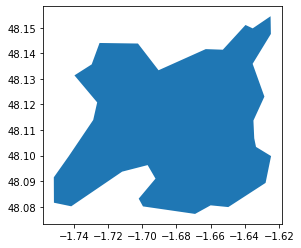

In [408]:
sf[sf['NAME_4'] == 'Rennes'].plot()

In [411]:
sf2[sf2['NAME_4'] == 'Rennes']['area'].sum()

51.52303346176089